# Compare with Aethalometer:

We produce the following figures: 

- ***Figure S2***: a comparsion between with Aethalometer ($\lambda$ adjusted to 637$\,$nm) between all the different instruments
- ***Figure S3***: comparsions with 3 month intervals of the PSAPs and MAAP

In [1]:
import sys
sys.path.append(r'C:\Users\DominicHeslinRees\Documents\ACP_2023\scripts\Correction_Factors_Absorption')
import Corrections_factors_absorption_functions as fu_cf_abs

%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.dates as mdates
from matplotlib import cm
from matplotlib.colors import ListedColormap
import matplotlib.gridspec as gridspec

In [2]:
def sizeof_fmt(num, suffix='B'):
    ''' by Fred Cirera,  https://stackoverflow.com/a/1094933/1870254, modified'''
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)

for name, size in sorted(((name, sys.getsizeof(value)) for name, value in locals().items()),
                         key= lambda x: -x[1])[:10]:
    print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))

                ListedColormap:  1.4 KiB
                       LogNorm:  1.0 KiB
                           _i2:  576.0 B
                            _i:  514.0 B
                           _i1:  514.0 B
                           _oh:  232.0 B
                           Out:  232.0 B
                    sizeof_fmt:  136.0 B
                       __doc__:  113.0 B
                           _ih:   96.0 B


In [3]:
loadpath = r'C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis'
savepath = r'C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\absorption'

savepathplots = r'C:\Users\DominicHeslinRees\Documents\ACP_2023\plots'

Mie = False
mean_or_median = 'mean'
use_corrected_values = False

In [4]:
df_aeth = fu_cf_abs.load_df(r"C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\aethalometer", 
                           filename='df_aethalometer_660')
df_aeth = df_aeth.rename(columns={'660_mean':'Conc660'})

loading: C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\aethalometer\df_aethalometer_660.dat


In [5]:
print("Old PSAP EBAS:")
df_oldPSAPEBAS = fu_cf_abs.load_df(loadpath, extrapath=r'absorption\Old_PSAP_EBAS', filename='PSAP_EBAS', formatdata=".dat" )
df_oldPSAPEBAS = df_oldPSAPEBAS.rename(columns={'aerosol_absorption_coefficient':'abs525'})
print(fu_cf_abs.find_number_of_duplicate_indexs(df_oldPSAPEBAS))

old_PSAPEBAS_min = fu_cf_abs.significant_figures(df_oldPSAPEBAS.min().values[0])
print("Minimum value for EBAS: "+str(old_PSAPEBAS_min))  

print("\nNew PSAP:")
df_newpsap =  fu_cf_abs.load_df(loadpath, extrapath=r'absorption\New_PSAP', filename='New_PSAP', formatdata=".dat")
print(fu_cf_abs.find_number_of_duplicate_indexs(df_newpsap))
df_newpsapraw =  fu_cf_abs.load_df(loadpath, extrapath=r'absorption\New_PSAP', filename='RAW_NEW_PSAP_cleaned', formatdata=".dat")

print("\nOld PSAP:")
df_oldpsap =  fu_cf_abs.load_df(r'C:\Users\DominicHeslinRees\Documents\Analysis\absorption', 
                                filename='dataset_bond_neph', formatdata=".dat")
df_oldpsap['abs525'] = df_oldpsap['abs_neph']

df_oldpsap =  fu_cf_abs.load_df(loadpath, extrapath=r'absorption\Old_PSAP', filename='Old_PSAP', formatdata=".dat")
print(fu_cf_abs.find_number_of_duplicate_indexs(df_oldpsap))
df_oldpsapraw =  fu_cf_abs.load_df(loadpath, extrapath=r'absorption\Old_PSAP', filename='RAW_Old_PSAP_cleaned', formatdata=".dat")

#off day required 
df_oldpsap = fu_cf_abs.day_offset(df_oldpsap, number_of_days=1, split_time='2012-06-15 16:05:00', add=True, substract=False)
df_oldpsapraw = fu_cf_abs.day_offset(df_oldpsapraw, number_of_days=1, split_time='2012-06-15 16:05:00', add=True, substract=False)

print("\nMAAP:") #df_MAAP_2014_2020_hourly_mean_abs #'hourly_MAAP_mean_extremes'
df_MAAP = fu_cf_abs.load_df(loadpath, extrapath=r'absorption\MAAP', filename='hourly_MAAP_mean_extremes', formatdata=".dat")
print(fu_cf_abs.find_number_of_duplicate_indexs(df_MAAP))

Old PSAP EBAS:
loading: C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\absorption\Old_PSAP_EBAS\PSAP_EBAS.dat
Duplicate Rows except first occurrence based on all columns are: 0
DatetimeIndex([], dtype='datetime64[ns]', name='starttime', freq=None)
Minimum value for EBAS: -0.002

New PSAP:
loading: C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\absorption\New_PSAP\New_PSAP.dat
Duplicate Rows except first occurrence based on all columns are: 0
DatetimeIndex([], dtype='datetime64[ns]', name='Datetime', freq=None)
loading: C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\absorption\New_PSAP\RAW_NEW_PSAP_cleaned.dat

Old PSAP:
loading: C:\Users\DominicHeslinRees\Documents\Analysis\absorption\dataset_bond_neph.dat
loading: C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\absorption\Old_PSAP\Old_PSAP.dat
Duplicate Rows except first occurrence based on all columns are: 21026
DatetimeIndex(['2008-09-11 12:29:17', '2008-09-11 12:29:17',
               '2008-09-11 12:2

In [6]:
df_oldpsap.head(2)

filter_num    volume     ln_tr    abs_ln        Tr  \
2006-04-20 17:33:01         1.0  0.000581  0.000304  4.202198  0.999983   
2006-04-20 17:34:01         1.0  0.000581  0.000281  3.892935  0.999975   

                            R      Qstd   scat450   scat550   scat700   Mie  \
2006-04-20 17:33:01  1.789582  0.123385  3.686995  2.914497  2.092346  True   
2006-04-20 17:34:01  1.789573  0.123385  3.686995  2.914497  2.092346  True   

                     abs_neph   abs525  
2006-04-20 17:33:01   1.87693  1.87693  
2006-04-20 17:34:01   1.73529  1.73529

In [7]:
df_oldpsapEBAS637 = fu_cf_abs.convert_wavelength(df_oldPSAPEBAS,lambda1=525,lambda2=637,abs_col='abs525',use_constant=True)
df_oldpsap637 = fu_cf_abs.convert_wavelength(df_oldpsap,lambda1=525,lambda2=637,abs_col='abs525',use_constant=True)
df_newpsap637 = fu_cf_abs.convert_wavelength(df_newpsap,lambda1=525,lambda2=637,abs_col='abs525',use_constant=True)

AAE = 1.0 is used to convert between wavelengths for abs525
AAE = 1.0 is used to convert between wavelengths for abs525
AAE = 1.0 is used to convert between wavelengths for abs525


In [8]:
df_oldpsapEBAS637 = df_oldpsapEBAS637[df_oldpsapEBAS637['abs637'] > 0].copy()
df_oldpsap637 = df_oldpsap637[df_oldpsap637['abs637'] > 0].copy()
df_newpsap637 = df_newpsap637[df_newpsap637['abs637'] > 0].copy()
df_MAAP = df_MAAP[df_MAAP['absorption'] > 0].copy()

In [9]:
df_abs = fu_cf_abs.load_df(loadpath=loadpath+'\\absorption\\appended',                   
                       filename='oldpsap_newpsap_maap',)

loading: C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\absorption\appended\oldpsap_newpsap_maap.dat


In [10]:
if use_corrected_values == True:
    df_oldpsapEBAS637 = df_abs[df_oldpsapEBAS637.index[0]:df_oldpsapEBAS637.index[-1]].copy()
    df_oldpsap637 = df_abs[df_oldpsap637.index[0]:df_oldpsap637.index[-1]].copy()
    df_newpsap637 = df_abs[df_newpsap637.index[0]:df_newpsap637.index[-1]].copy()
    df_MAAP = df_abs[df_MAAP.index[0]:df_MAAP.index[-1]].copy()
    df_MAAP = df_MAAP.rename(columns={'abs637':'absorption'})

In [11]:
df_aeth = df_aeth[['Conc660']].copy()
df_aeth_hourly = fu_cf_abs.hourly_resample(df_aeth, cols=['Conc660']) 
df_aeth_hourly = fu_cf_abs.convert_wavelength(df_aeth_hourly, lambda1=660,lambda2=637,abs_col='Conc660 mean', use_constant=True)
df_aeth_hourly = df_aeth_hourly.rename(columns={'abs637':'aeth637'})

Index(['Conc660 mean', 'Conc660 median', 'Conc660 std', 'Conc660 var'], dtype='object')
AAE = 1.0 is used to convert between wavelengths for Conc660 mean


In [12]:
df_aeth_hourly.head(2)

abs660  Conc660 median  Conc660 std  Conc660 var  \
2005-01-01 00:00:00  0.039960        0.039960          NaN          NaN   
2005-01-01 01:00:00  0.043131        0.043131          NaN          NaN   

                      aeth637  
2005-01-01 00:00:00  0.041403  
2005-01-01 01:00:00  0.044688

In [13]:
def produce_density_array(df_merged, x_var='absorption', y_var='abs637 mean', value_limit=3.5, 
                         step = 0.1):    
    size=int(value_limit/step)
    df_merged = df_merged[[x_var, y_var]].copy()    
    df_merged = df_merged[~df_merged.isin([np.nan, np.inf, -np.inf]).any(1)] #remove any infs or np.nan 
    
    x = np.array(df_merged[x_var])
    y = np.array(df_merged[y_var])    
    max_value = max(x.max(),y.max())    
    df_merged = df_merged[df_merged < value_limit]
    bins = np.array(np.arange(0, value_limit, step))

    inds_x = np.digitize(x, bins, right=True)
    inds_y = np.digitize(y, bins, right=True)
        
    df_merged['bin_x'] = inds_x
    df_merged['bin_y'] = inds_y
    df_groupby = df_merged.groupby(['bin_x', 'bin_y']).count().reset_index()
    df_empty = fu_cf_abs.create_empty_arrays_hits(m=size,n=size)
    df_empty = df_empty.merge(df_groupby, on=['bin_x', 'bin_y'], how='outer')
    df_empty = df_empty.sort_values(['bin_x', 'bin_y'])
    
    rowIDs = df_empty['bin_x'].astype(int)
    colIDs = df_empty['bin_y'].astype(int)

    array = np.zeros((int(rowIDs.max()),int(colIDs.max())))
    array[colIDs-1, rowIDs-1] = df_empty[x_var].values
    array[array == 0] = np.nan
    return array

In [14]:
def make_plot(df_merged, x_var, y_var, array=None,
              value_limit=3.5, cmap='viridis', xlabel="$\sigma_{\mathrm{Aeth \,ap, 637\, nm}}$ [Mm$^{-1}$]",
              ylabel= "$\sigma_{\mathrm{Old\,PSAP\,ap}}$ [Mm$^{-1}$", loc_legend='upper left', 
              ax=None):    
    if ax is not None:
        ax.imshow(array, extent=[0,value_limit,0,value_limit], interpolation='none', origin='lower',
                   norm=LogNorm(vmin=1, vmax=1000), cmap=cmap)
        fu_cf_abs.create_simple_regession_plot(df_merged, x_var=x_var, y_var=y_var, 
                                    set_max_value=3.5, dict_abs_labels={}, 
                                    title='', vmin=0, vmax=1, 
                                    xlabel=xlabel, 
                                    ylabel=ylabel, 
                                    show_points=False, 
                                    loc_legend=loc_legend, 
                                    legend_out_of_box=False, 
                                    ax=ax)
    if ax is None:
        fig, dict_stats = fu_cf_abs.create_simple_regession_plot(df_merged, x_var=x_var, y_var=y_var, 
                                    set_max_value=3.5, dict_abs_labels={}, 
                                    title='', vmin=0, vmax=1, 
                                    xlabel=xlabel, 
                                    ylabel=ylabel, 
                                    show_points=False, 
                                    loc_legend=loc_legend, 
                                    legend_out_of_box=False, 
                                    ax=None,
                                    )
        return dict_stats

In [15]:
def do_subset_analysis(dict_time_df, x_var, y_var):    
    parameters = ['cf_LMS', 'cf_TS', 'coef', 'coef_ts', 'R2', 'length']
    df_stats_table = pd.DataFrame(columns=parameters)
    for time, df in dict_time_df.items():
        name = str(time.date())
        
        try:
            array = produce_density_array(df, x_var, y_var, value_limit=3.5, step = 0.05,)    
            dict_stats = make_plot(df, x_var, y_var, array, ax=None)
            
            for parameter in parameters:
                df_stats_table.loc[name, parameter] = dict_stats[parameter]
                print(df_stats_table)
        except:
            print(time)
            pass
    print(df_stats_table)
    return df_stats_table

In [16]:
def produce_table(df, x_var, y_var):
    print(x_var)
    print(y_var)
    datetime_interval = get_timeinterval(df, freq="3M")
    dict_time_df = divide_by_interval(df, datetime_interval)
    df_stats_table = do_subset_analysis(dict_time_df, x_var=x_var, y_var=y_var)
    print(df_stats_table)
    return df_stats_table

In [17]:
def fancy(ax, fontsize=20, spines=['top','bottom','left','right'], alpha=0.5):    
    # thickning the axes spines
    for axis in spines:
        ax.spines[axis].set_linewidth(2)
        ax.spines[axis].set_color('k')        
    # set the fontsize for all your ticks    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)        
    # properties of the ticks
    ax.tick_params(direction='out', length=8, width=2, pad=10, bottom=True, top=False, left=True, right=False, color='k')    
    # add a grid to the plot
    ax.grid(True, alpha=alpha)  
    
def quick_plot(df_stats_table, title):
    fig, ax = plt.subplots(figsize=(15, 4))
    df_stats_table.index = pd.to_datetime(df_stats_table.index)
    ax.plot(df_stats_table.index, df_stats_table['cf_TS'], 'o', mec='k', mfc='none')
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())  
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
    ax.axhline(y=1, ls=':', c='k', alpha=.8, lw=1)
    ax.set_ylabel('CF [-]', fontsize=20)   
    ax.set_title(title,loc='left')
    fancy(ax, fontsize=15)
    ax.set_ylim(-1,5)
    plt.show()
    return fig

# old PSAP EBAS: 

In [18]:
df_oldpsapEBAS637_hourly = fu_cf_abs.hourly_resample(df_oldpsapEBAS637, cols=['abs637']) 
df_merged_oldpsapEBASaeth = fu_cf_abs.mergedfs(df_aeth_hourly, df_oldpsapEBAS637_hourly) #merge 

x_var='aeth637'
y_var='abs637 mean'

df_merged_oldpsapEBASaeth = df_merged_oldpsapEBASaeth[[x_var, y_var]].astype({x_var: 'float16', y_var: 'float16'})

Index(['abs637 mean', 'abs637 median', 'abs637 std', 'abs637 var'], dtype='object')


In [19]:
df_merged_oldpsapEBASaeth.head(2)

aeth637  abs637 mean
2005-01-01 00:00:00  0.041412     0.123596
2005-01-01 01:00:00  0.044678     0.138428

In [20]:
def mid_datetime_function(a, b):
    return a + (b - a)/2

def get_timeinterval(df, freq="3M"):
    datetime_interval = pd.date_range(df.index[0].date(), end=df.index[-1].date(), freq=freq)
    return datetime_interval

def divide_by_interval(df, datetime_interval):
    dict_time_df = {}  
    for i in range(len(datetime_interval[:-1])):  
        print(datetime_interval[i])
        df_subset = df[datetime_interval[i]:datetime_interval[i+1]]
        if len(df_subset) > 0:
            print(len(df_subset)) 
            dict_time_df[datetime_interval[i]] = df_subset
    return dict_time_df

aeth637
abs637 mean
2005-01-31 00:00:00
2137
2005-04-30 00:00:00
2209
2005-07-31 00:00:00
2209
2005-10-31 00:00:00
2209
2006-01-31 00:00:00
2137
2006-04-30 00:00:00
2209
2006-07-31 00:00:00
2209
2006-10-31 00:00:00
2209
2007-01-31 00:00:00
2137
2007-04-30 00:00:00
2209
2007-07-31 00:00:00
2209
2007-10-31 00:00:00
2209
2008-01-31 00:00:00
2161
2008-04-30 00:00:00
2209
2008-07-31 00:00:00
2209
2008-10-31 00:00:00
2209
2009-01-31 00:00:00
2137
2009-04-30 00:00:00
2209
2009-07-31 00:00:00
2209
2009-10-31 00:00:00
2209
2010-01-31 00:00:00
2137
2010-04-30 00:00:00
2209
2010-07-31 00:00:00
2209


C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


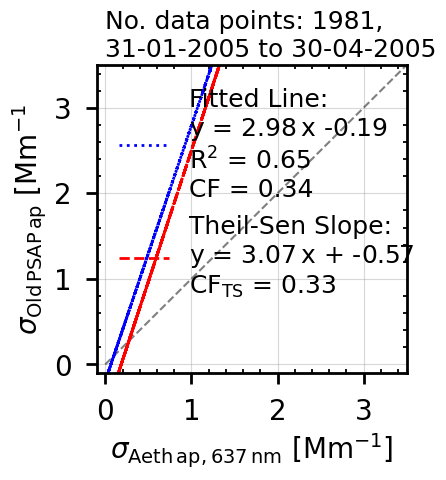

              cf_LMS cf_TS coef coef_ts   R2 length
2005-01-31  0.335102   NaN  NaN     NaN  NaN    NaN
              cf_LMS    cf_TS coef coef_ts   R2 length
2005-01-31  0.335102  0.32616  NaN     NaN  NaN    NaN
              cf_LMS    cf_TS  coef coef_ts   R2 length
2005-01-31  0.335102  0.32616  2.98     NaN  NaN    NaN
              cf_LMS    cf_TS  coef coef_ts   R2 length
2005-01-31  0.335102  0.32616  2.98    3.07  NaN    NaN
              cf_LMS    cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102  0.32616  2.98    3.07  0.65    NaN
              cf_LMS    cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102  0.32616  2.98    3.07  0.65   1981


C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


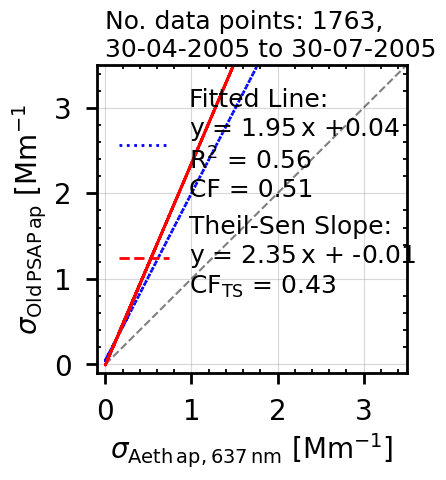

              cf_LMS    cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102  0.32616  2.98    3.07  0.65   1981
2005-04-30  0.511911      NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.511911  0.425052   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.511911  0.425052  1.95     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.511911  0.425052  1.95    2.35   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.511911  0.425052  1.95    2.35  0.56    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.511

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


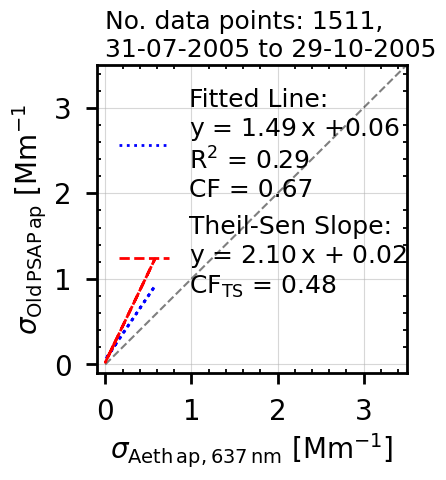

              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.511911  0.425052  1.95    2.35  0.56   1763
2005-07-31  0.670158       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.511911  0.425052  1.95    2.35  0.56   1763
2005-07-31  0.670158  0.476852   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.511911  0.425052  1.95    2.35  0.56   1763
2005-07-31  0.670158  0.476852  1.49     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.511911  0.425052  1.95    2.35  0.56   1763
2005-07-31  0.670158  0.476852  1.49    2.10   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


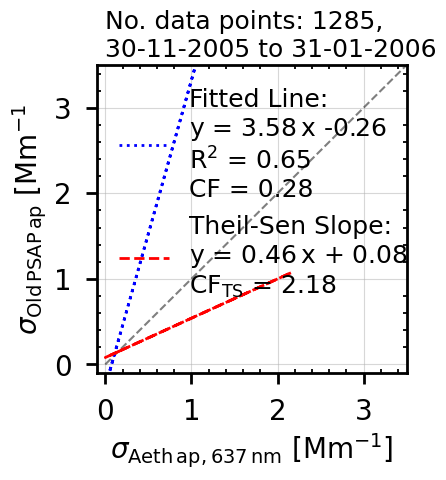

              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.511911  0.425052  1.95    2.35  0.56   1763
2005-07-31  0.670158  0.476852  1.49    2.10  0.29   1511
2005-10-31  0.278942       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.511911  0.425052  1.95    2.35  0.56   1763
2005-07-31  0.670158  0.476852  1.49    2.10  0.29   1511
2005-10-31  0.278942  2.177898   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.511911  0.425052  1.95    2.35  0.56   1763
2005-07-31  0.670158  0.476852  1.49    2.10  0.29   1511
2005-10-31  0.278942  2.177898  3.58     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


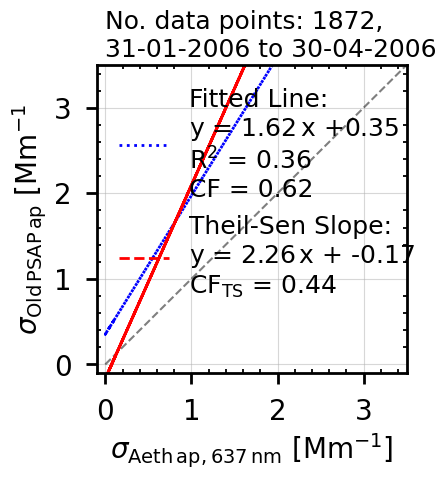

              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.511911  0.425052  1.95    2.35  0.56   1763
2005-07-31  0.670158  0.476852  1.49    2.10  0.29   1511
2005-10-31  0.278942  2.177898  3.58    0.46  0.65   1285
2006-01-31  0.616664       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.511911  0.425052  1.95    2.35  0.56   1763
2005-07-31  0.670158  0.476852  1.49    2.10  0.29   1511
2005-10-31  0.278942  2.177898  3.58    0.46  0.65   1285
2006-01-31  0.616664  0.442507   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.511911  0.425052  1.95    2.35  0.56   1763
2005-07-31  0.670158  0.476852  1.49    2.10  0.29   1511
2005-10-31  0.278942  2.177898  3.58    0.46  0.65   1285
2006-01-31  0.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


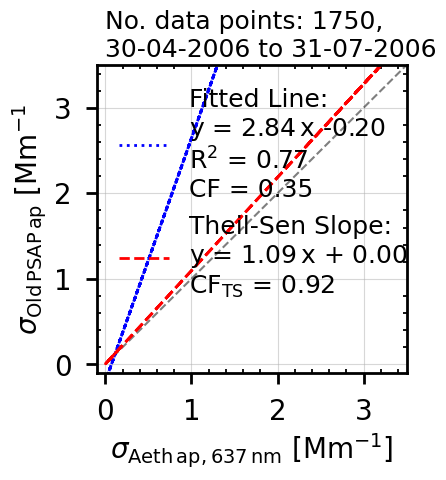

              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.511911  0.425052  1.95    2.35  0.56   1763
2005-07-31  0.670158  0.476852  1.49    2.10  0.29   1511
2005-10-31  0.278942  2.177898  3.58    0.46  0.65   1285
2006-01-31  0.616664  0.442507  1.62    2.26  0.36   1872
2006-04-30  0.351909       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.511911  0.425052  1.95    2.35  0.56   1763
2005-07-31  0.670158  0.476852  1.49    2.10  0.29   1511
2005-10-31  0.278942  2.177898  3.58    0.46  0.65   1285
2006-01-31  0.616664  0.442507  1.62    2.26  0.36   1872
2006-04-30  0.351909  0.916828   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.511911  0.425052  1.95    2.35  0.56   1763
2005-07-31  0.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


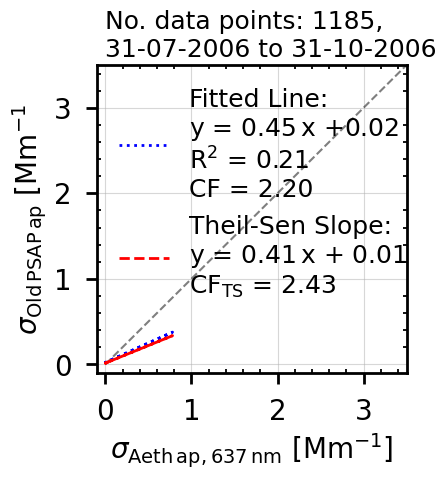

              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.511911  0.425052  1.95    2.35  0.56   1763
2005-07-31  0.670158  0.476852  1.49    2.10  0.29   1511
2005-10-31  0.278942  2.177898  3.58    0.46  0.65   1285
2006-01-31  0.616664  0.442507  1.62    2.26  0.36   1872
2006-04-30  0.351909  0.916828  2.84    1.09  0.77   1750
2006-07-31  2.200621       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.511911  0.425052  1.95    2.35  0.56   1763
2005-07-31  0.670158  0.476852  1.49    2.10  0.29   1511
2005-10-31  0.278942  2.177898  3.58    0.46  0.65   1285
2006-01-31  0.616664  0.442507  1.62    2.26  0.36   1872
2006-04-30  0.351909  0.916828  2.84    1.09  0.77   1750
2006-07-31  2.200621   2.43359   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


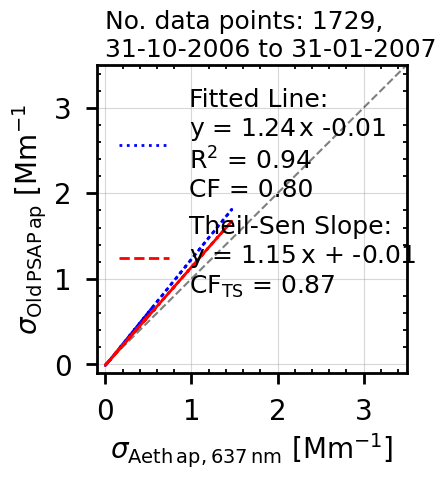

              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.511911  0.425052  1.95    2.35  0.56   1763
2005-07-31  0.670158  0.476852  1.49    2.10  0.29   1511
2005-10-31  0.278942  2.177898  3.58    0.46  0.65   1285
2006-01-31  0.616664  0.442507  1.62    2.26  0.36   1872
2006-04-30  0.351909  0.916828  2.84    1.09  0.77   1750
2006-07-31  2.200621   2.43359  0.45    0.41  0.21   1185
2006-10-31  0.804274       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.511911  0.425052  1.95    2.35  0.56   1763
2005-07-31  0.670158  0.476852  1.49    2.10  0.29   1511
2005-10-31  0.278942  2.177898  3.58    0.46  0.65   1285
2006-01-31  0.616664  0.442507  1.62    2.26  0.36   1872
2006-04-30  0.351909  0.916828  2.84    1.09  0.77   1750
2006-07-31  2.200621   2.43359  0.45    0.41  0.21   1185
2006-10-31  0.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


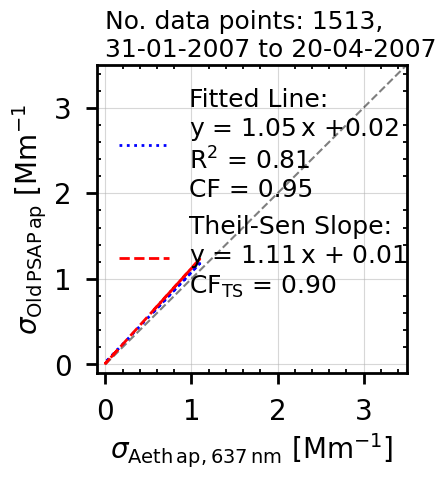

              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.511911  0.425052  1.95    2.35  0.56   1763
2005-07-31  0.670158  0.476852  1.49    2.10  0.29   1511
2005-10-31  0.278942  2.177898  3.58    0.46  0.65   1285
2006-01-31  0.616664  0.442507  1.62    2.26  0.36   1872
2006-04-30  0.351909  0.916828  2.84    1.09  0.77   1750
2006-07-31  2.200621   2.43359  0.45    0.41  0.21   1185
2006-10-31  0.804274  0.872063  1.24    1.15  0.94   1729
2007-01-31  0.947966       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.511911  0.425052  1.95    2.35  0.56   1763
2005-07-31  0.670158  0.476852  1.49    2.10  0.29   1511
2005-10-31  0.278942  2.177898  3.58    0.46  0.65   1285
2006-01-31  0.616664  0.442507  1.62    2.26  0.36   1872
2006-04-30  0.351909  0.916828  2.84    1.09  0.77   1750
2006-07-31  2.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


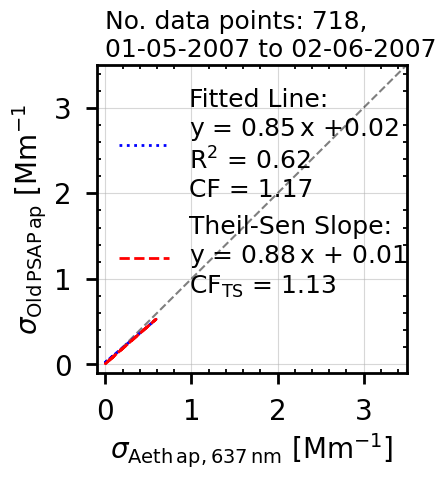

              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.511911  0.425052  1.95    2.35  0.56   1763
2005-07-31  0.670158  0.476852  1.49    2.10  0.29   1511
2005-10-31  0.278942  2.177898  3.58    0.46  0.65   1285
2006-01-31  0.616664  0.442507  1.62    2.26  0.36   1872
2006-04-30  0.351909  0.916828  2.84    1.09  0.77   1750
2006-07-31  2.200621   2.43359  0.45    0.41  0.21   1185
2006-10-31  0.804274  0.872063  1.24    1.15  0.94   1729
2007-01-31  0.947966  0.898148  1.05    1.11  0.81   1513
2007-04-30  1.171271       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.511911  0.425052  1.95    2.35  0.56   1763
2005-07-31  0.670158  0.476852  1.49    2.10  0.29   1511
2005-10-31  0.278942  2.177898  3.58    0.46  0.65   1285
2006-01-31  0.616664  0.442507  1.62    2.26  0.36   1872
2006-04-30  0.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


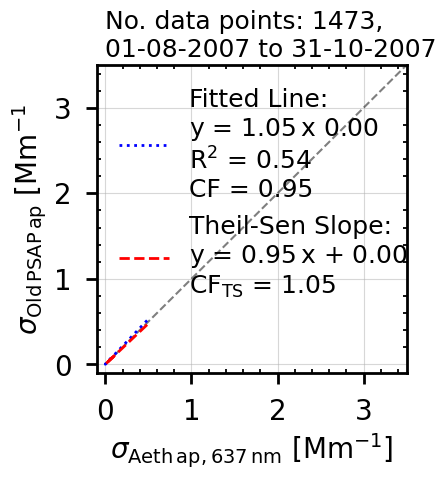

              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.511911  0.425052  1.95    2.35  0.56   1763
2005-07-31  0.670158  0.476852  1.49    2.10  0.29   1511
2005-10-31  0.278942  2.177898  3.58    0.46  0.65   1285
2006-01-31  0.616664  0.442507  1.62    2.26  0.36   1872
2006-04-30  0.351909  0.916828  2.84    1.09  0.77   1750
2006-07-31  2.200621   2.43359  0.45    0.41  0.21   1185
2006-10-31  0.804274  0.872063  1.24    1.15  0.94   1729
2007-01-31  0.947966  0.898148  1.05    1.11  0.81   1513
2007-04-30  1.171271  1.133528  0.85    0.88  0.62    718
2007-07-31  0.947997       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.511911  0.425052  1.95    2.35  0.56   1763
2005-07-31  0.670158  0.476852  1.49    2.10  0.29   1511
2005-10-31  0.278942  2.177898  3.58    0.46  0.65   1285
2006-01-31  0.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


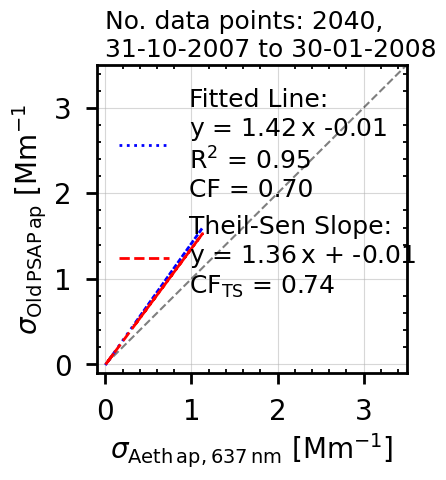

              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.511911  0.425052  1.95    2.35  0.56   1763
2005-07-31  0.670158  0.476852  1.49    2.10  0.29   1511
2005-10-31  0.278942  2.177898  3.58    0.46  0.65   1285
2006-01-31  0.616664  0.442507  1.62    2.26  0.36   1872
2006-04-30  0.351909  0.916828  2.84    1.09  0.77   1750
2006-07-31  2.200621   2.43359  0.45    0.41  0.21   1185
2006-10-31  0.804274  0.872063  1.24    1.15  0.94   1729
2007-01-31  0.947966  0.898148  1.05    1.11  0.81   1513
2007-04-30  1.171271  1.133528  0.85    0.88  0.62    718
2007-07-31  0.947997  1.048724  1.05    0.95  0.54   1473
2007-10-31  0.703087       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.511911  0.425052  1.95    2.35  0.56   1763
2005-07-31  0.670158  0.476852  1.49    2.10  0.29   1511
2005-10-31  0.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


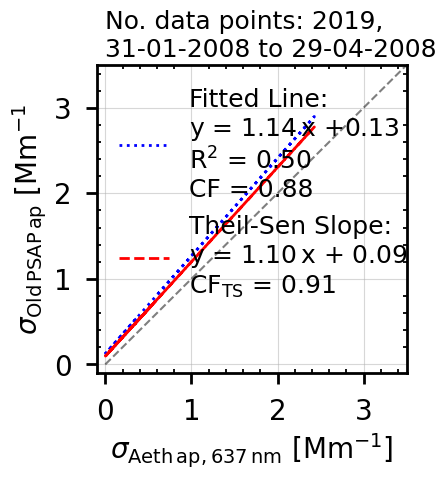

              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.511911  0.425052  1.95    2.35  0.56   1763
2005-07-31  0.670158  0.476852  1.49    2.10  0.29   1511
2005-10-31  0.278942  2.177898  3.58    0.46  0.65   1285
2006-01-31  0.616664  0.442507  1.62    2.26  0.36   1872
2006-04-30  0.351909  0.916828  2.84    1.09  0.77   1750
2006-07-31  2.200621   2.43359  0.45    0.41  0.21   1185
2006-10-31  0.804274  0.872063  1.24    1.15  0.94   1729
2007-01-31  0.947966  0.898148  1.05    1.11  0.81   1513
2007-04-30  1.171271  1.133528  0.85    0.88  0.62    718
2007-07-31  0.947997  1.048724  1.05    0.95  0.54   1473
2007-10-31  0.703087  0.736844  1.42    1.36  0.95   2040
2008-01-31  0.876098       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.511911  0.425052  1.95    2.35  0.56   1763
2005-07-31  0.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


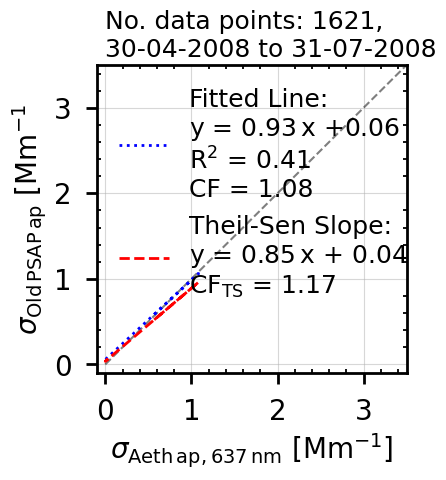

              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.511911  0.425052  1.95    2.35  0.56   1763
2005-07-31  0.670158  0.476852  1.49    2.10  0.29   1511
2005-10-31  0.278942  2.177898  3.58    0.46  0.65   1285
2006-01-31  0.616664  0.442507  1.62    2.26  0.36   1872
2006-04-30  0.351909  0.916828  2.84    1.09  0.77   1750
2006-07-31  2.200621   2.43359  0.45    0.41  0.21   1185
2006-10-31  0.804274  0.872063  1.24    1.15  0.94   1729
2007-01-31  0.947966  0.898148  1.05    1.11  0.81   1513
2007-04-30  1.171271  1.133528  0.85    0.88  0.62    718
2007-07-31  0.947997  1.048724  1.05    0.95  0.54   1473
2007-10-31  0.703087  0.736844  1.42    1.36  0.95   2040
2008-01-31  0.876098  0.906423  1.14    1.10  0.50   2019
2008-04-30  1.076534       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


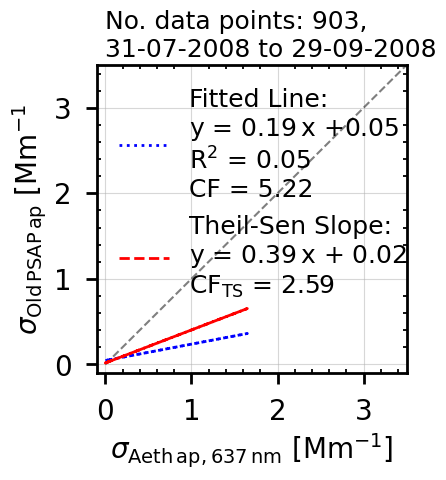

              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.511911  0.425052  1.95    2.35  0.56   1763
2005-07-31  0.670158  0.476852  1.49    2.10  0.29   1511
2005-10-31  0.278942  2.177898  3.58    0.46  0.65   1285
2006-01-31  0.616664  0.442507  1.62    2.26  0.36   1872
2006-04-30  0.351909  0.916828  2.84    1.09  0.77   1750
2006-07-31  2.200621   2.43359  0.45    0.41  0.21   1185
2006-10-31  0.804274  0.872063  1.24    1.15  0.94   1729
2007-01-31  0.947966  0.898148  1.05    1.11  0.81   1513
2007-04-30  1.171271  1.133528  0.85    0.88  0.62    718
2007-07-31  0.947997  1.048724  1.05    0.95  0.54   1473
2007-10-31  0.703087  0.736844  1.42    1.36  0.95   2040
2008-01-31  0.876098  0.906423  1.14    1.10  0.50   2019
2008-04-30  1.076534  1.170025  0.93    0.85  0.41   1621
2008-07-31  5.220862       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


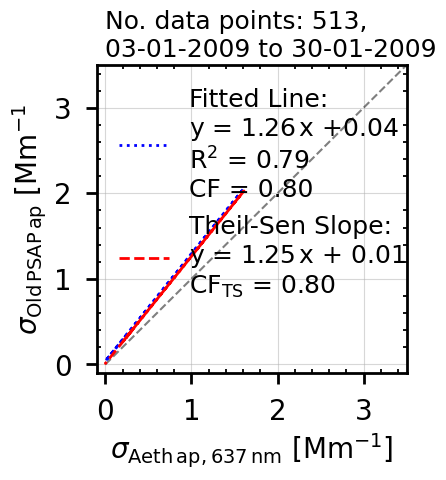

              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.511911  0.425052  1.95    2.35  0.56   1763
2005-07-31  0.670158  0.476852  1.49    2.10  0.29   1511
2005-10-31  0.278942  2.177898  3.58    0.46  0.65   1285
2006-01-31  0.616664  0.442507  1.62    2.26  0.36   1872
2006-04-30  0.351909  0.916828  2.84    1.09  0.77   1750
2006-07-31  2.200621   2.43359  0.45    0.41  0.21   1185
2006-10-31  0.804274  0.872063  1.24    1.15  0.94   1729
2007-01-31  0.947966  0.898148  1.05    1.11  0.81   1513
2007-04-30  1.171271  1.133528  0.85    0.88  0.62    718
2007-07-31  0.947997  1.048724  1.05    0.95  0.54   1473
2007-10-31  0.703087  0.736844  1.42    1.36  0.95   2040
2008-01-31  0.876098  0.906423  1.14    1.10  0.50   2019
2008-04-30  1.076534  1.170025  0.93    0.85  0.41   1621
2008-07-31  5.220862  2.592593  0.19    0.39  0.05    903
2008-10-31  0.796693       NaN   NaN     NaN   NaN    NaN
              

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


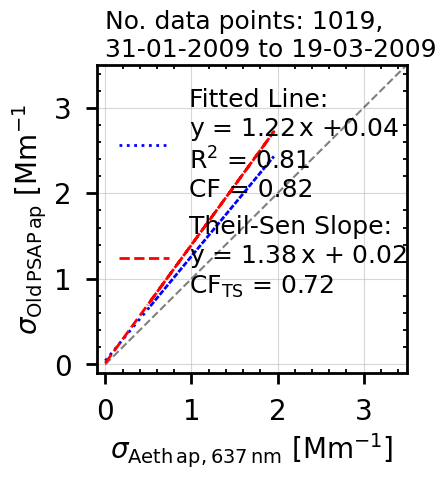

              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.511911  0.425052  1.95    2.35  0.56   1763
2005-07-31  0.670158  0.476852  1.49    2.10  0.29   1511
2005-10-31  0.278942  2.177898  3.58    0.46  0.65   1285
2006-01-31  0.616664  0.442507  1.62    2.26  0.36   1872
2006-04-30  0.351909  0.916828  2.84    1.09  0.77   1750
2006-07-31  2.200621   2.43359  0.45    0.41  0.21   1185
2006-10-31  0.804274  0.872063  1.24    1.15  0.94   1729
2007-01-31  0.947966  0.898148  1.05    1.11  0.81   1513
2007-04-30  1.171271  1.133528  0.85    0.88  0.62    718
2007-07-31  0.947997  1.048724  1.05    0.95  0.54   1473
2007-10-31  0.703087  0.736844  1.42    1.36  0.95   2040
2008-01-31  0.876098  0.906423  1.14    1.10  0.50   2019
2008-04-30  1.076534  1.170025  0.93    0.85  0.41   1621
2008-07-31  5.220862  2.592593  0.19    0.39  0.05    903
2008-10-31  0.796693  0.798246  1.26    1.25  0.79    513
2009-01-31  0.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


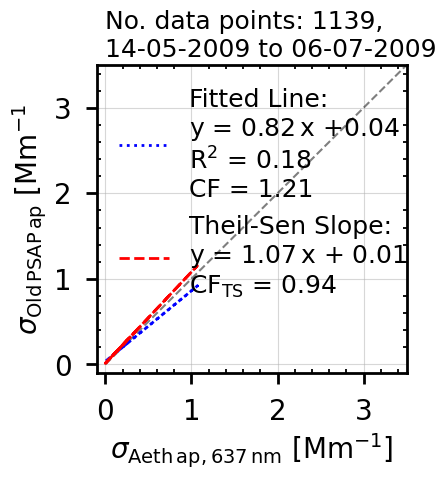

              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.511911  0.425052  1.95    2.35  0.56   1763
2005-07-31  0.670158  0.476852  1.49    2.10  0.29   1511
2005-10-31  0.278942  2.177898  3.58    0.46  0.65   1285
2006-01-31  0.616664  0.442507  1.62    2.26  0.36   1872
2006-04-30  0.351909  0.916828  2.84    1.09  0.77   1750
2006-07-31  2.200621   2.43359  0.45    0.41  0.21   1185
2006-10-31  0.804274  0.872063  1.24    1.15  0.94   1729
2007-01-31  0.947966  0.898148  1.05    1.11  0.81   1513
2007-04-30  1.171271  1.133528  0.85    0.88  0.62    718
2007-07-31  0.947997  1.048724  1.05    0.95  0.54   1473
2007-10-31  0.703087  0.736844  1.42    1.36  0.95   2040
2008-01-31  0.876098  0.906423  1.14    1.10  0.50   2019
2008-04-30  1.076534  1.170025  0.93    0.85  0.41   1621
2008-07-31  5.220862  2.592593  0.19    0.39  0.05    903
2008-10-31  0.796693  0.798246  1.26    1.25  0.79    513
2009-01-31  0.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


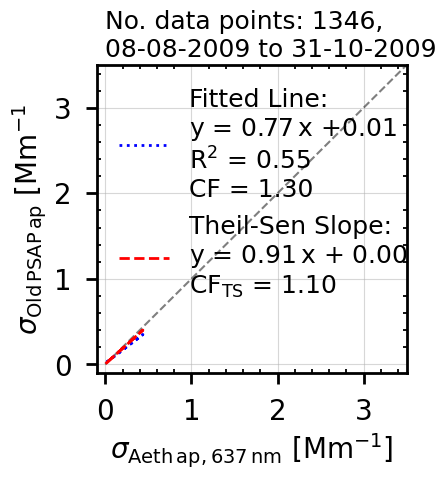

              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.511911  0.425052  1.95    2.35  0.56   1763
2005-07-31  0.670158  0.476852  1.49    2.10  0.29   1511
2005-10-31  0.278942  2.177898  3.58    0.46  0.65   1285
2006-01-31  0.616664  0.442507  1.62    2.26  0.36   1872
2006-04-30  0.351909  0.916828  2.84    1.09  0.77   1750
2006-07-31  2.200621   2.43359  0.45    0.41  0.21   1185
2006-10-31  0.804274  0.872063  1.24    1.15  0.94   1729
2007-01-31  0.947966  0.898148  1.05    1.11  0.81   1513
2007-04-30  1.171271  1.133528  0.85    0.88  0.62    718
2007-07-31  0.947997  1.048724  1.05    0.95  0.54   1473
2007-10-31  0.703087  0.736844  1.42    1.36  0.95   2040
2008-01-31  0.876098  0.906423  1.14    1.10  0.50   2019
2008-04-30  1.076534  1.170025  0.93    0.85  0.41   1621
2008-07-31  5.220862  2.592593  0.19    0.39  0.05    903
2008-10-31  0.796693  0.798246  1.26    1.25  0.79    513
2009-01-31  0.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


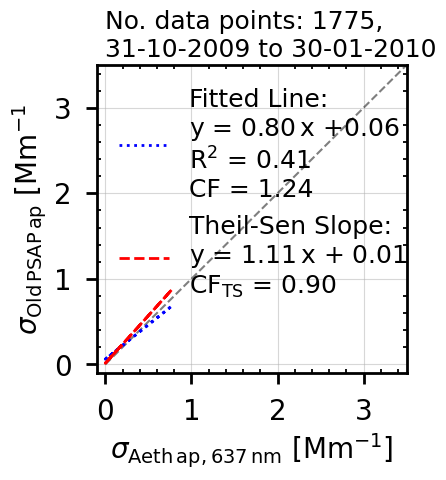

              cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31  0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30  0.511911  0.425052  1.95    2.35  0.56   1763
2005-07-31  0.670158  0.476852  1.49    2.10  0.29   1511
2005-10-31  0.278942  2.177898  3.58    0.46  0.65   1285
2006-01-31  0.616664  0.442507  1.62    2.26  0.36   1872
2006-04-30  0.351909  0.916828  2.84    1.09  0.77   1750
2006-07-31  2.200621   2.43359  0.45    0.41  0.21   1185
2006-10-31  0.804274  0.872063  1.24    1.15  0.94   1729
2007-01-31  0.947966  0.898148  1.05    1.11  0.81   1513
2007-04-30  1.171271  1.133528  0.85    0.88  0.62    718
2007-07-31  0.947997  1.048724  1.05    0.95  0.54   1473
2007-10-31  0.703087  0.736844  1.42    1.36  0.95   2040
2008-01-31  0.876098  0.906423  1.14    1.10  0.50   2019
2008-04-30  1.076534  1.170025  0.93    0.85  0.41   1621
2008-07-31  5.220862  2.592593  0.19    0.39  0.05    903
2008-10-31  0.796693  0.798246  1.26    1.25  0.79    513
2009-01-31  0.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


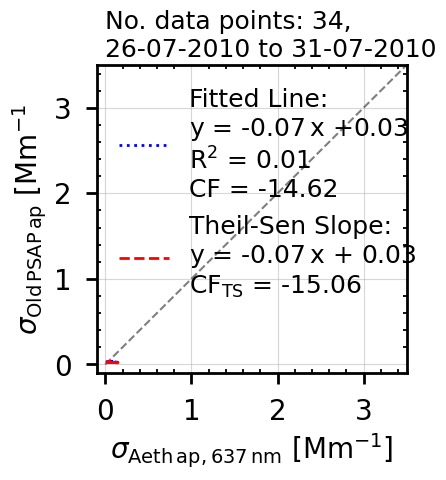

               cf_LMS     cf_TS  coef coef_ts    R2 length
2005-01-31   0.335102   0.32616  2.98    3.07  0.65   1981
2005-04-30   0.511911  0.425052  1.95    2.35  0.56   1763
2005-07-31   0.670158  0.476852  1.49    2.10  0.29   1511
2005-10-31   0.278942  2.177898  3.58    0.46  0.65   1285
2006-01-31   0.616664  0.442507  1.62    2.26  0.36   1872
2006-04-30   0.351909  0.916828  2.84    1.09  0.77   1750
2006-07-31   2.200621   2.43359  0.45    0.41  0.21   1185
2006-10-31   0.804274  0.872063  1.24    1.15  0.94   1729
2007-01-31   0.947966  0.898148  1.05    1.11  0.81   1513
2007-04-30   1.171271  1.133528  0.85    0.88  0.62    718
2007-07-31   0.947997  1.048724  1.05    0.95  0.54   1473
2007-10-31   0.703087  0.736844  1.42    1.36  0.95   2040
2008-01-31   0.876098  0.906423  1.14    1.10  0.50   2019
2008-04-30   1.076534  1.170025  0.93    0.85  0.41   1621
2008-07-31   5.220862  2.592593  0.19    0.39  0.05    903
2008-10-31   0.796693  0.798246  1.26    1.25  0.79    5

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


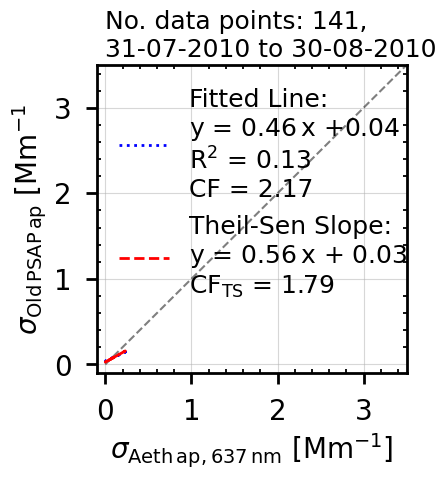

               cf_LMS      cf_TS   coef coef_ts    R2 length
2005-01-31   0.335102    0.32616   2.98    3.07  0.65   1981
2005-04-30   0.511911   0.425052   1.95    2.35  0.56   1763
2005-07-31   0.670158   0.476852   1.49    2.10  0.29   1511
2005-10-31   0.278942   2.177898   3.58    0.46  0.65   1285
2006-01-31   0.616664   0.442507   1.62    2.26  0.36   1872
2006-04-30   0.351909   0.916828   2.84    1.09  0.77   1750
2006-07-31   2.200621    2.43359   0.45    0.41  0.21   1185
2006-10-31   0.804274   0.872063   1.24    1.15  0.94   1729
2007-01-31   0.947966   0.898148   1.05    1.11  0.81   1513
2007-04-30   1.171271   1.133528   0.85    0.88  0.62    718
2007-07-31   0.947997   1.048724   1.05    0.95  0.54   1473
2007-10-31   0.703087   0.736844   1.42    1.36  0.95   2040
2008-01-31   0.876098   0.906423   1.14    1.10  0.50   2019
2008-04-30   1.076534   1.170025   0.93    0.85  0.41   1621
2008-07-31   5.220862   2.592593   0.19    0.39  0.05    903
2008-10-31   0.796693   

In [21]:
df_stats_table_aeth_EBAS = produce_table(df_merged_oldpsapEBASaeth, x_var='aeth637', y_var='abs637 mean')

threshold for length of dataframe: 

In [22]:
df_stats_table_aeth_EBAS = df_stats_table_aeth_EBAS[df_stats_table_aeth_EBAS['length'] > 50]

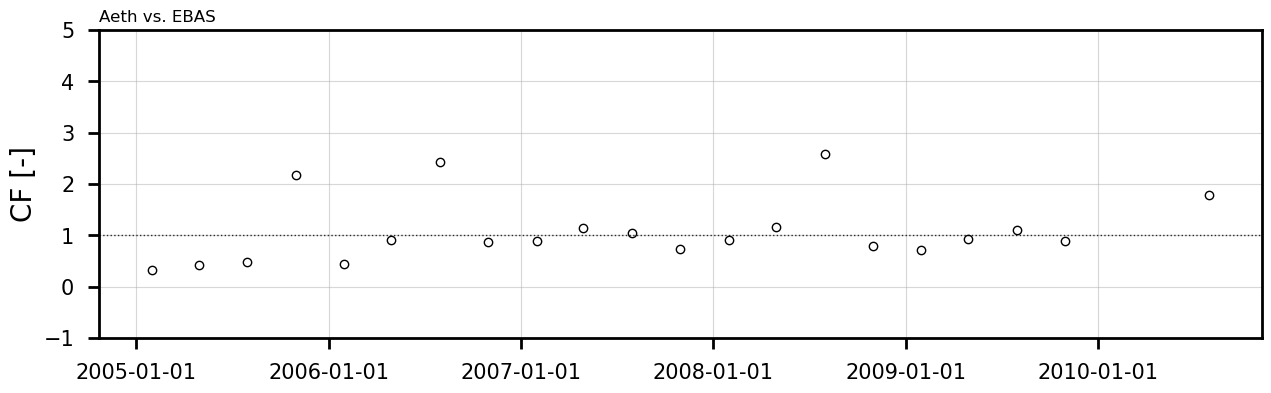

In [23]:
fig = quick_plot(df_stats_table_aeth_EBAS, 'Aeth vs. EBAS')

# old vs. aeth: 

In [24]:
df_oldpsap637_hourly = fu_cf_abs.hourly_resample(df_oldpsap637, cols=['abs637']) 
df_merged_oldpsapaeth = fu_cf_abs.mergedfs(df_aeth_hourly, df_oldpsap637_hourly) #merge 

x_var='aeth637'
y_var='abs637 mean'

df_merged_oldpsapaeth = df_merged_oldpsapaeth[[x_var, y_var]].astype({x_var: 'float16', y_var: 'float16'})

array_oldpsapaeth = produce_density_array(df_merged_oldpsapaeth, x_var=x_var, y_var=y_var, value_limit=3.5, 
                                          step = 0.05,)

Index(['abs637 mean', 'abs637 median', 'abs637 std', 'abs637 var'], dtype='object')


aeth637
abs637 mean
2006-04-30 00:00:00
2209
2006-07-31 00:00:00
2209
2006-10-31 00:00:00
2209
2007-01-31 00:00:00
2137
2007-04-30 00:00:00
2209
2007-07-31 00:00:00
2209
2007-10-31 00:00:00
2209
2008-01-31 00:00:00
2161
2008-04-30 00:00:00
2209
2008-07-31 00:00:00
2209
2008-10-31 00:00:00
2209
2009-01-31 00:00:00
2137
2009-04-30 00:00:00
2209
2009-07-31 00:00:00
2209
2009-10-31 00:00:00
2209
2010-01-31 00:00:00
2137
2010-04-30 00:00:00
2209
2010-07-31 00:00:00
2209
2010-10-31 00:00:00
2209
2011-01-31 00:00:00
2137
2011-04-30 00:00:00
2209
2011-07-31 00:00:00
2209
2011-10-31 00:00:00
2209
2012-01-31 00:00:00
2161
2012-04-30 00:00:00
2209
2012-07-31 00:00:00
2209
2012-10-31 00:00:00
2209
2013-01-31 00:00:00
2137
2013-04-30 00:00:00
2209


C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


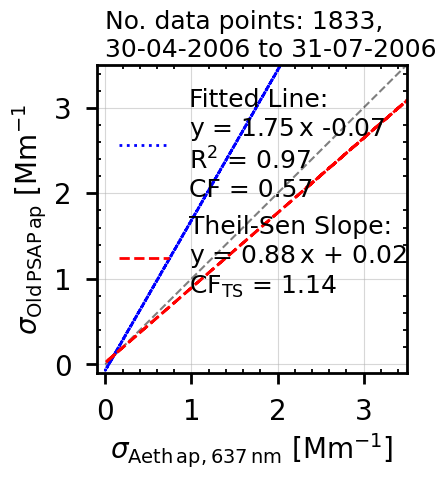

              cf_LMS cf_TS coef coef_ts   R2 length
2006-04-30  0.570256   NaN  NaN     NaN  NaN    NaN
              cf_LMS     cf_TS coef coef_ts   R2 length
2006-04-30  0.570256  1.142857  NaN     NaN  NaN    NaN
              cf_LMS     cf_TS  coef coef_ts   R2 length
2006-04-30  0.570256  1.142857  1.75     NaN  NaN    NaN
              cf_LMS     cf_TS  coef coef_ts   R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97   1833


C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


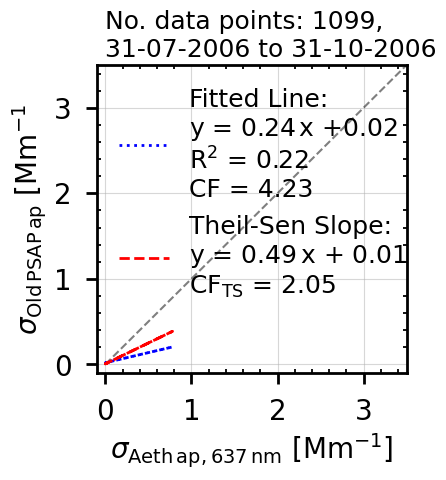

              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97   1833
2006-07-31  4.226074       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97   1833
2006-07-31  4.226074  2.052713   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97   1833
2006-07-31  4.226074  2.052713  0.24     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97   1833
2006-07-31  4.226074  2.052713  0.24    0.49   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97   1833
2006-07-31  4.226074  2.052713  0.24    0.49  0.22    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97   1833
2006-07-31  4.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


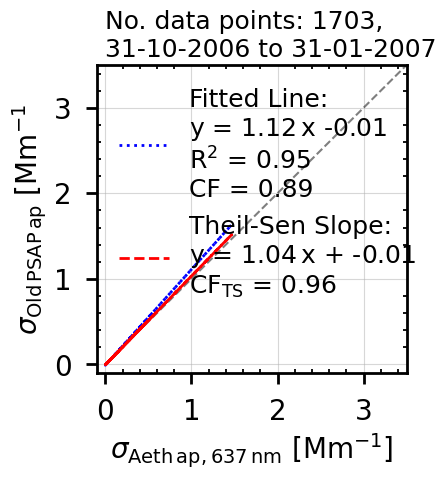

              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97   1833
2006-07-31  4.226074  2.052713  0.24    0.49  0.22   1099
2006-10-31  0.892897       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97   1833
2006-07-31  4.226074  2.052713  0.24    0.49  0.22   1099
2006-10-31  0.892897  0.964325   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97   1833
2006-07-31  4.226074  2.052713  0.24    0.49  0.22   1099
2006-10-31  0.892897  0.964325  1.12     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97   1833
2006-07-31  4.226074  2.052713  0.24    0.49  0.22   1099
2006-10-31  0.892897  0.964325  1.12    1.04   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


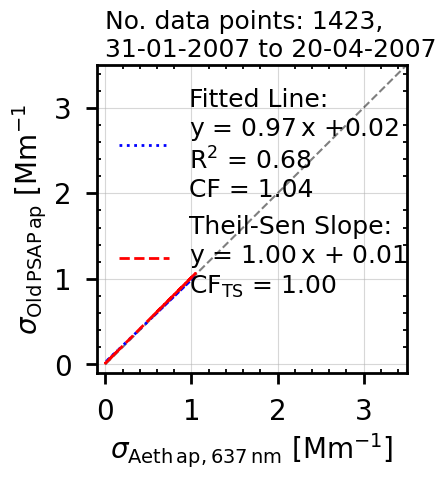

              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97   1833
2006-07-31  4.226074  2.052713  0.24    0.49  0.22   1099
2006-10-31  0.892897  0.964325  1.12    1.04  0.95   1703
2007-01-31  1.036037       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97   1833
2006-07-31  4.226074  2.052713  0.24    0.49  0.22   1099
2006-10-31  0.892897  0.964325  1.12    1.04  0.95   1703
2007-01-31  1.036037  0.996063   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97   1833
2006-07-31  4.226074  2.052713  0.24    0.49  0.22   1099
2006-10-31  0.892897  0.964325  1.12    1.04  0.95   1703
2007-01-31  1.036037  0.996063  0.97     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97   1833
2006-07-31  4.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


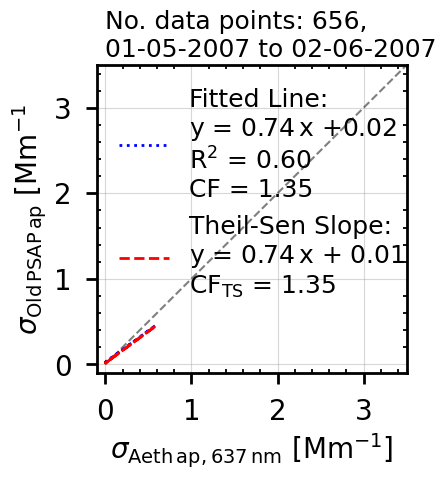

              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97   1833
2006-07-31  4.226074  2.052713  0.24    0.49  0.22   1099
2006-10-31  0.892897  0.964325  1.12    1.04  0.95   1703
2007-01-31  1.036037  0.996063  0.97    1.00  0.68   1423
2007-04-30  1.348303       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97   1833
2006-07-31  4.226074  2.052713  0.24    0.49  0.22   1099
2006-10-31  0.892897  0.964325  1.12    1.04  0.95   1703
2007-01-31  1.036037  0.996063  0.97    1.00  0.68   1423
2007-04-30  1.348303  1.345991   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97   1833
2006-07-31  4.226074  2.052713  0.24    0.49  0.22   1099
2006-10-31  0.892897  0.964325  1.12    1.04  0.95   1703
2007-01-31  1.036037  0.996063  0.97    1.00  0.68   1423
2007-04-30  1.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


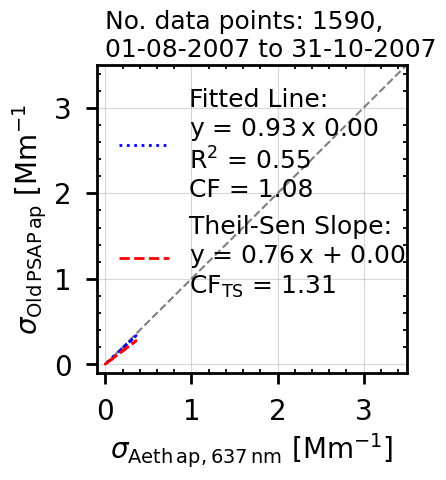

              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97   1833
2006-07-31  4.226074  2.052713  0.24    0.49  0.22   1099
2006-10-31  0.892897  0.964325  1.12    1.04  0.95   1703
2007-01-31  1.036037  0.996063  0.97    1.00  0.68   1423
2007-04-30  1.348303  1.345991  0.74    0.74  0.60    656
2007-07-31  1.075772       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97   1833
2006-07-31  4.226074  2.052713  0.24    0.49  0.22   1099
2006-10-31  0.892897  0.964325  1.12    1.04  0.95   1703
2007-01-31  1.036037  0.996063  0.97    1.00  0.68   1423
2007-04-30  1.348303  1.345991  0.74    0.74  0.60    656
2007-07-31  1.075772  1.311398   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97   1833
2006-07-31  4.226074  2.052713  0.24    0.49  0.22   1099
2006-10-31  0.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


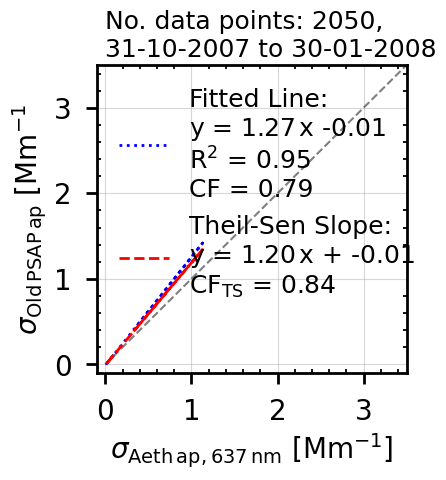

              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97   1833
2006-07-31  4.226074  2.052713  0.24    0.49  0.22   1099
2006-10-31  0.892897  0.964325  1.12    1.04  0.95   1703
2007-01-31  1.036037  0.996063  0.97    1.00  0.68   1423
2007-04-30  1.348303  1.345991  0.74    0.74  0.60    656
2007-07-31  1.075772  1.311398  0.93    0.76  0.55   1590
2007-10-31  0.789845       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97   1833
2006-07-31  4.226074  2.052713  0.24    0.49  0.22   1099
2006-10-31  0.892897  0.964325  1.12    1.04  0.95   1703
2007-01-31  1.036037  0.996063  0.97    1.00  0.68   1423
2007-04-30  1.348303  1.345991  0.74    0.74  0.60    656
2007-07-31  1.075772  1.311398  0.93    0.76  0.55   1590
2007-10-31  0.789845  0.836473   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


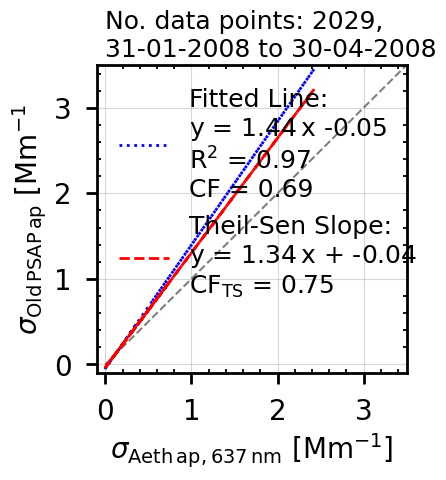

              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97   1833
2006-07-31  4.226074  2.052713  0.24    0.49  0.22   1099
2006-10-31  0.892897  0.964325  1.12    1.04  0.95   1703
2007-01-31  1.036037  0.996063  0.97    1.00  0.68   1423
2007-04-30  1.348303  1.345991  0.74    0.74  0.60    656
2007-07-31  1.075772  1.311398  0.93    0.76  0.55   1590
2007-10-31  0.789845  0.836473  1.27    1.20  0.95   2050
2008-01-31  0.692528       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97   1833
2006-07-31  4.226074  2.052713  0.24    0.49  0.22   1099
2006-10-31  0.892897  0.964325  1.12    1.04  0.95   1703
2007-01-31  1.036037  0.996063  0.97    1.00  0.68   1423
2007-04-30  1.348303  1.345991  0.74    0.74  0.60    656
2007-07-31  1.075772  1.311398  0.93    0.76  0.55   1590
2007-10-31  0.789845  0.836473  1.27    1.20  0.95   2050
2008-01-31  0.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


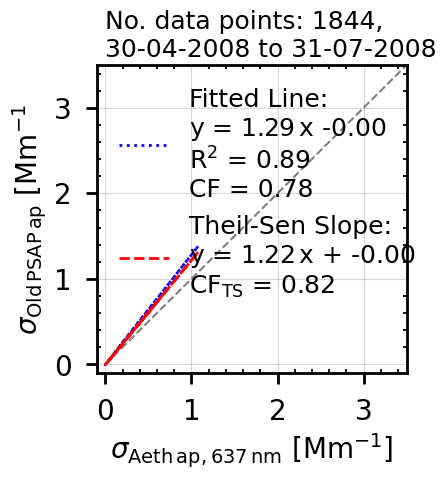

              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97   1833
2006-07-31  4.226074  2.052713  0.24    0.49  0.22   1099
2006-10-31  0.892897  0.964325  1.12    1.04  0.95   1703
2007-01-31  1.036037  0.996063  0.97    1.00  0.68   1423
2007-04-30  1.348303  1.345991  0.74    0.74  0.60    656
2007-07-31  1.075772  1.311398  0.93    0.76  0.55   1590
2007-10-31  0.789845  0.836473  1.27    1.20  0.95   2050
2008-01-31  0.692528  0.745654  1.44    1.34  0.97   2029
2008-04-30  0.778155       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97   1833
2006-07-31  4.226074  2.052713  0.24    0.49  0.22   1099
2006-10-31  0.892897  0.964325  1.12    1.04  0.95   1703
2007-01-31  1.036037  0.996063  0.97    1.00  0.68   1423
2007-04-30  1.348303  1.345991  0.74    0.74  0.60    656
2007-07-31  1.075772  1.311398  0.93    0.76  0.55   1590
2007-10-31  0.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


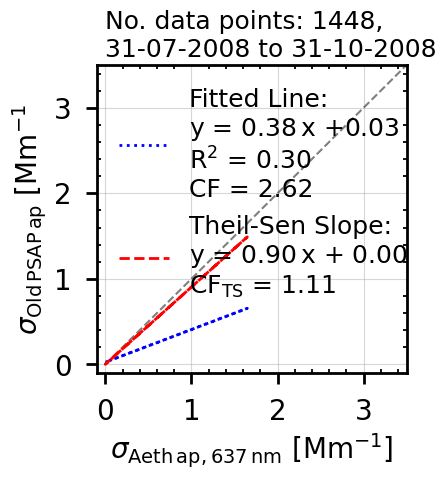

              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97   1833
2006-07-31  4.226074  2.052713  0.24    0.49  0.22   1099
2006-10-31  0.892897  0.964325  1.12    1.04  0.95   1703
2007-01-31  1.036037  0.996063  0.97    1.00  0.68   1423
2007-04-30  1.348303  1.345991  0.74    0.74  0.60    656
2007-07-31  1.075772  1.311398  0.93    0.76  0.55   1590
2007-10-31  0.789845  0.836473  1.27    1.20  0.95   2050
2008-01-31  0.692528  0.745654  1.44    1.34  0.97   2029
2008-04-30  0.778155  0.820022  1.29    1.22  0.89   1844
2008-07-31  2.616754       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97   1833
2006-07-31  4.226074  2.052713  0.24    0.49  0.22   1099
2006-10-31  0.892897  0.964325  1.12    1.04  0.95   1703
2007-01-31  1.036037  0.996063  0.97    1.00  0.68   1423
2007-04-30  1.348303  1.345991  0.74    0.74  0.60    656
2007-07-31  1.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


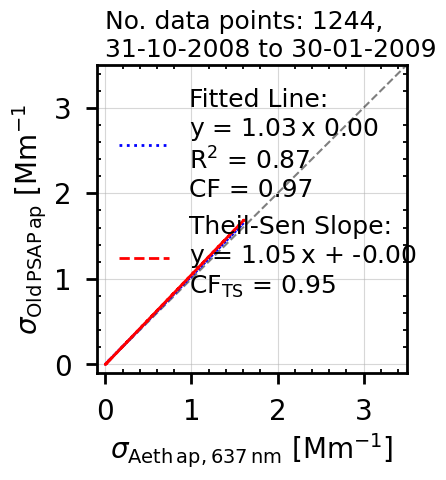

              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97   1833
2006-07-31  4.226074  2.052713  0.24    0.49  0.22   1099
2006-10-31  0.892897  0.964325  1.12    1.04  0.95   1703
2007-01-31  1.036037  0.996063  0.97    1.00  0.68   1423
2007-04-30  1.348303  1.345991  0.74    0.74  0.60    656
2007-07-31  1.075772  1.311398  0.93    0.76  0.55   1590
2007-10-31  0.789845  0.836473  1.27    1.20  0.95   2050
2008-01-31  0.692528  0.745654  1.44    1.34  0.97   2029
2008-04-30  0.778155  0.820022  1.29    1.22  0.89   1844
2008-07-31  2.616754  1.107579  0.38    0.90  0.30   1448
2008-10-31  0.972715       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97   1833
2006-07-31  4.226074  2.052713  0.24    0.49  0.22   1099
2006-10-31  0.892897  0.964325  1.12    1.04  0.95   1703
2007-01-31  1.036037  0.996063  0.97    1.00  0.68   1423
2007-04-30  1.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


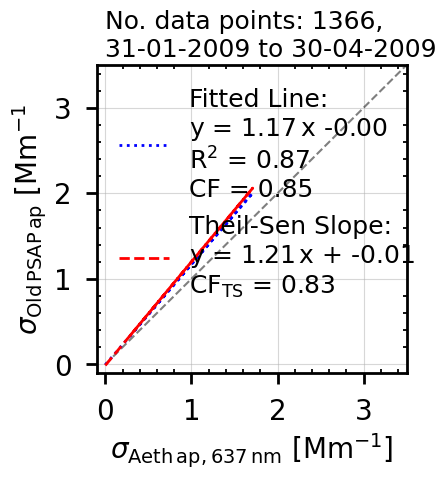

              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97   1833
2006-07-31  4.226074  2.052713  0.24    0.49  0.22   1099
2006-10-31  0.892897  0.964325  1.12    1.04  0.95   1703
2007-01-31  1.036037  0.996063  0.97    1.00  0.68   1423
2007-04-30  1.348303  1.345991  0.74    0.74  0.60    656
2007-07-31  1.075772  1.311398  0.93    0.76  0.55   1590
2007-10-31  0.789845  0.836473  1.27    1.20  0.95   2050
2008-01-31  0.692528  0.745654  1.44    1.34  0.97   2029
2008-04-30  0.778155  0.820022  1.29    1.22  0.89   1844
2008-07-31  2.616754  1.107579  0.38    0.90  0.30   1448
2008-10-31  0.972715  0.953794  1.03    1.05  0.87   1244
2009-01-31   0.85209       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97   1833
2006-07-31  4.226074  2.052713  0.24    0.49  0.22   1099
2006-10-31  0.892897  0.964325  1.12    1.04  0.95   1703
2007-01-31  1.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


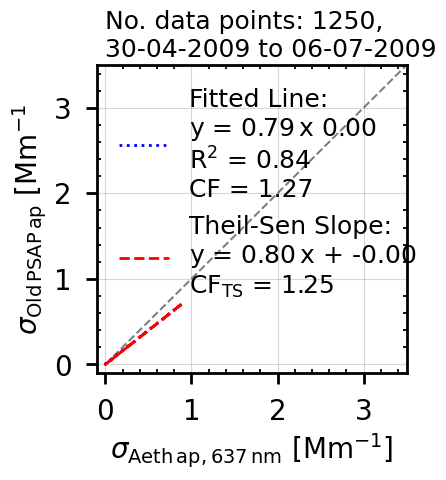

              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97   1833
2006-07-31  4.226074  2.052713  0.24    0.49  0.22   1099
2006-10-31  0.892897  0.964325  1.12    1.04  0.95   1703
2007-01-31  1.036037  0.996063  0.97    1.00  0.68   1423
2007-04-30  1.348303  1.345991  0.74    0.74  0.60    656
2007-07-31  1.075772  1.311398  0.93    0.76  0.55   1590
2007-10-31  0.789845  0.836473  1.27    1.20  0.95   2050
2008-01-31  0.692528  0.745654  1.44    1.34  0.97   2029
2008-04-30  0.778155  0.820022  1.29    1.22  0.89   1844
2008-07-31  2.616754  1.107579  0.38    0.90  0.30   1448
2008-10-31  0.972715  0.953794  1.03    1.05  0.87   1244
2009-01-31   0.85209  0.826531  1.17    1.21  0.87   1366
2009-04-30  1.269793       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97   1833
2006-07-31  4.226074  2.052713  0.24    0.49  0.22   1099
2006-10-31  0.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


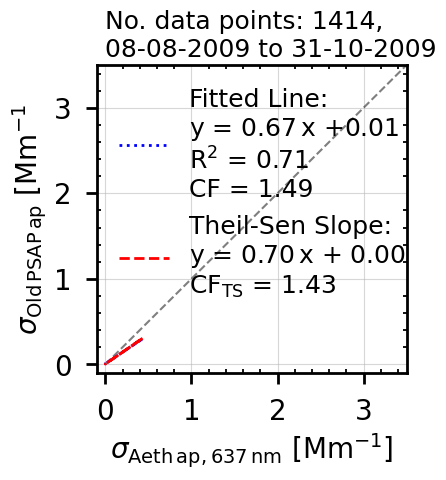

              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97   1833
2006-07-31  4.226074  2.052713  0.24    0.49  0.22   1099
2006-10-31  0.892897  0.964325  1.12    1.04  0.95   1703
2007-01-31  1.036037  0.996063  0.97    1.00  0.68   1423
2007-04-30  1.348303  1.345991  0.74    0.74  0.60    656
2007-07-31  1.075772  1.311398  0.93    0.76  0.55   1590
2007-10-31  0.789845  0.836473  1.27    1.20  0.95   2050
2008-01-31  0.692528  0.745654  1.44    1.34  0.97   2029
2008-04-30  0.778155  0.820022  1.29    1.22  0.89   1844
2008-07-31  2.616754  1.107579  0.38    0.90  0.30   1448
2008-10-31  0.972715  0.953794  1.03    1.05  0.87   1244
2009-01-31   0.85209  0.826531  1.17    1.21  0.87   1366
2009-04-30  1.269793  1.254342  0.79    0.80  0.84   1250
2009-07-31  1.489292       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97   1833
2006-07-31  4.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


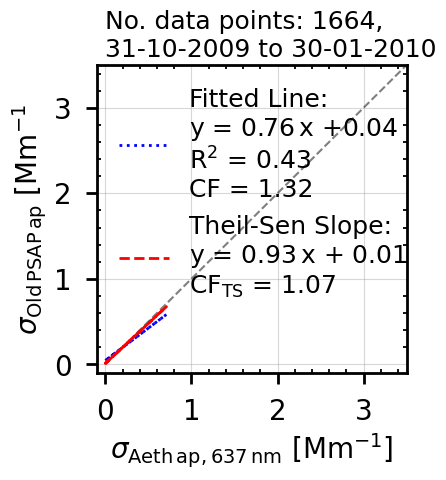

              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97   1833
2006-07-31  4.226074  2.052713  0.24    0.49  0.22   1099
2006-10-31  0.892897  0.964325  1.12    1.04  0.95   1703
2007-01-31  1.036037  0.996063  0.97    1.00  0.68   1423
2007-04-30  1.348303  1.345991  0.74    0.74  0.60    656
2007-07-31  1.075772  1.311398  0.93    0.76  0.55   1590
2007-10-31  0.789845  0.836473  1.27    1.20  0.95   2050
2008-01-31  0.692528  0.745654  1.44    1.34  0.97   2029
2008-04-30  0.778155  0.820022  1.29    1.22  0.89   1844
2008-07-31  2.616754  1.107579  0.38    0.90  0.30   1448
2008-10-31  0.972715  0.953794  1.03    1.05  0.87   1244
2009-01-31   0.85209  0.826531  1.17    1.21  0.87   1366
2009-04-30  1.269793  1.254342  0.79    0.80  0.84   1250
2009-07-31  1.489292  1.433811  0.67    0.70  0.71   1414
2009-10-31  1.317156       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


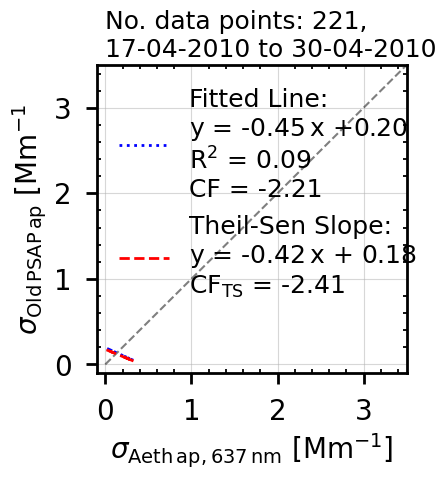

              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97   1833
2006-07-31  4.226074  2.052713  0.24    0.49  0.22   1099
2006-10-31  0.892897  0.964325  1.12    1.04  0.95   1703
2007-01-31  1.036037  0.996063  0.97    1.00  0.68   1423
2007-04-30  1.348303  1.345991  0.74    0.74  0.60    656
2007-07-31  1.075772  1.311398  0.93    0.76  0.55   1590
2007-10-31  0.789845  0.836473  1.27    1.20  0.95   2050
2008-01-31  0.692528  0.745654  1.44    1.34  0.97   2029
2008-04-30  0.778155  0.820022  1.29    1.22  0.89   1844
2008-07-31  2.616754  1.107579  0.38    0.90  0.30   1448
2008-10-31  0.972715  0.953794  1.03    1.05  0.87   1244
2009-01-31   0.85209  0.826531  1.17    1.21  0.87   1366
2009-04-30  1.269793  1.254342  0.79    0.80  0.84   1250
2009-07-31  1.489292  1.433811  0.67    0.70  0.71   1414
2009-10-31  1.317156  1.069788  0.76    0.93  0.43   1664
2010-01-31 -2.211274       NaN   NaN     NaN   NaN    NaN
              

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


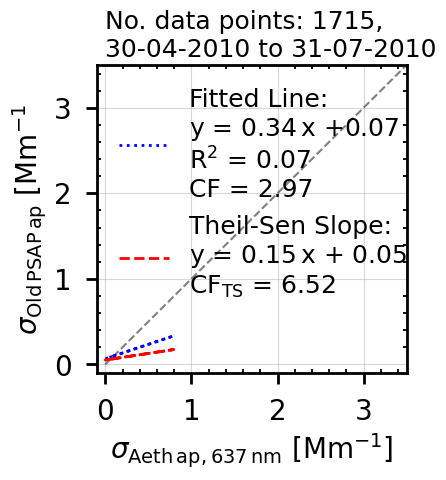

              cf_LMS     cf_TS   coef coef_ts    R2 length
2006-04-30  0.570256  1.142857   1.75    0.88  0.97   1833
2006-07-31  4.226074  2.052713   0.24    0.49  0.22   1099
2006-10-31  0.892897  0.964325   1.12    1.04  0.95   1703
2007-01-31  1.036037  0.996063   0.97    1.00  0.68   1423
2007-04-30  1.348303  1.345991   0.74    0.74  0.60    656
2007-07-31  1.075772  1.311398   0.93    0.76  0.55   1590
2007-10-31  0.789845  0.836473   1.27    1.20  0.95   2050
2008-01-31  0.692528  0.745654   1.44    1.34  0.97   2029
2008-04-30  0.778155  0.820022   1.29    1.22  0.89   1844
2008-07-31  2.616754  1.107579   0.38    0.90  0.30   1448
2008-10-31  0.972715  0.953794   1.03    1.05  0.87   1244
2009-01-31   0.85209  0.826531   1.17    1.21  0.87   1366
2009-04-30  1.269793  1.254342   0.79    0.80  0.84   1250
2009-07-31  1.489292  1.433811   0.67    0.70  0.71   1414
2009-10-31  1.317156  1.069788   0.76    0.93  0.43   1664
2010-01-31 -2.211274 -2.406957  -0.45   -0.42  0.09    2

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


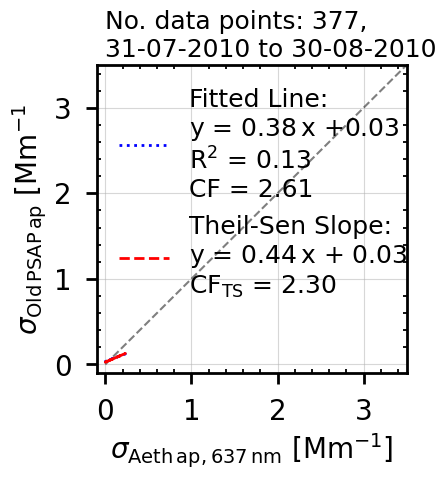

              cf_LMS     cf_TS   coef coef_ts    R2 length
2006-04-30  0.570256  1.142857   1.75    0.88  0.97   1833
2006-07-31  4.226074  2.052713   0.24    0.49  0.22   1099
2006-10-31  0.892897  0.964325   1.12    1.04  0.95   1703
2007-01-31  1.036037  0.996063   0.97    1.00  0.68   1423
2007-04-30  1.348303  1.345991   0.74    0.74  0.60    656
2007-07-31  1.075772  1.311398   0.93    0.76  0.55   1590
2007-10-31  0.789845  0.836473   1.27    1.20  0.95   2050
2008-01-31  0.692528  0.745654   1.44    1.34  0.97   2029
2008-04-30  0.778155  0.820022   1.29    1.22  0.89   1844
2008-07-31  2.616754  1.107579   0.38    0.90  0.30   1448
2008-10-31  0.972715  0.953794   1.03    1.05  0.87   1244
2009-01-31   0.85209  0.826531   1.17    1.21  0.87   1366
2009-04-30  1.269793  1.254342   0.79    0.80  0.84   1250
2009-07-31  1.489292  1.433811   0.67    0.70  0.71   1414
2009-10-31  1.317156  1.069788   0.76    0.93  0.43   1664
2010-01-31 -2.211274 -2.406957  -0.45   -0.42  0.09    2

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


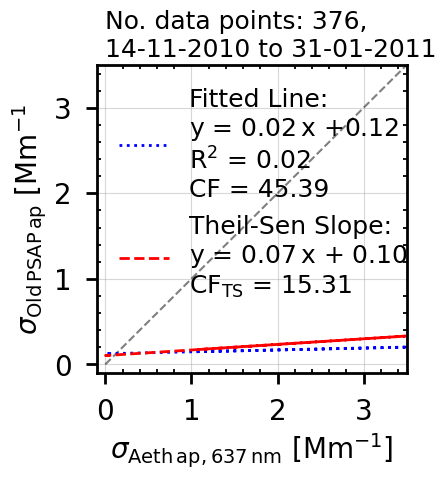

               cf_LMS     cf_TS   coef coef_ts    R2 length
2006-04-30   0.570256  1.142857   1.75    0.88  0.97   1833
2006-07-31   4.226074  2.052713   0.24    0.49  0.22   1099
2006-10-31   0.892897  0.964325   1.12    1.04  0.95   1703
2007-01-31   1.036037  0.996063   0.97    1.00  0.68   1423
2007-04-30   1.348303  1.345991   0.74    0.74  0.60    656
2007-07-31   1.075772  1.311398   0.93    0.76  0.55   1590
2007-10-31   0.789845  0.836473   1.27    1.20  0.95   2050
2008-01-31   0.692528  0.745654   1.44    1.34  0.97   2029
2008-04-30   0.778155  0.820022   1.29    1.22  0.89   1844
2008-07-31   2.616754  1.107579   0.38    0.90  0.30   1448
2008-10-31   0.972715  0.953794   1.03    1.05  0.87   1244
2009-01-31    0.85209  0.826531   1.17    1.21  0.87   1366
2009-04-30   1.269793  1.254342   0.79    0.80  0.84   1250
2009-07-31   1.489292  1.433811   0.67    0.70  0.71   1414
2009-10-31   1.317156  1.069788   0.76    0.93  0.43   1664
2010-01-31  -2.211274 -2.406957  -0.45  

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


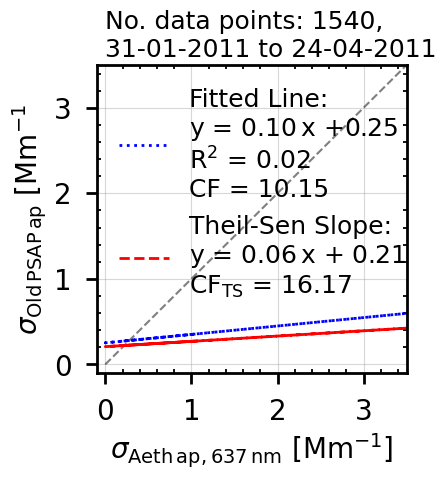

               cf_LMS      cf_TS   coef coef_ts    R2 length
2006-04-30   0.570256   1.142857   1.75    0.88  0.97   1833
2006-07-31   4.226074   2.052713   0.24    0.49  0.22   1099
2006-10-31   0.892897   0.964325   1.12    1.04  0.95   1703
2007-01-31   1.036037   0.996063   0.97    1.00  0.68   1423
2007-04-30   1.348303   1.345991   0.74    0.74  0.60    656
2007-07-31   1.075772   1.311398   0.93    0.76  0.55   1590
2007-10-31   0.789845   0.836473   1.27    1.20  0.95   2050
2008-01-31   0.692528   0.745654   1.44    1.34  0.97   2029
2008-04-30   0.778155   0.820022   1.29    1.22  0.89   1844
2008-07-31   2.616754   1.107579   0.38    0.90  0.30   1448
2008-10-31   0.972715   0.953794   1.03    1.05  0.87   1244
2009-01-31    0.85209   0.826531   1.17    1.21  0.87   1366
2009-04-30   1.269793   1.254342   0.79    0.80  0.84   1250
2009-07-31   1.489292   1.433811   0.67    0.70  0.71   1414
2009-10-31   1.317156   1.069788   0.76    0.93  0.43   1664
2010-01-31  -2.211274  -

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


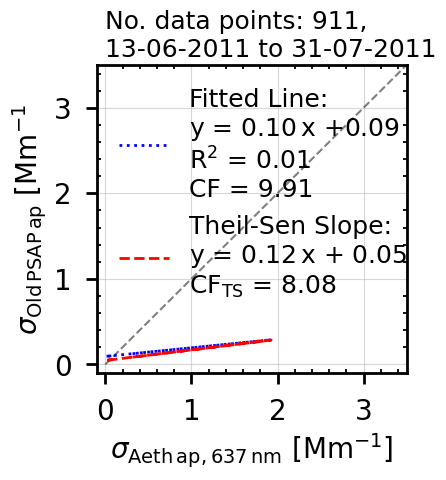

               cf_LMS      cf_TS   coef coef_ts    R2 length
2006-04-30   0.570256   1.142857   1.75    0.88  0.97   1833
2006-07-31   4.226074   2.052713   0.24    0.49  0.22   1099
2006-10-31   0.892897   0.964325   1.12    1.04  0.95   1703
2007-01-31   1.036037   0.996063   0.97    1.00  0.68   1423
2007-04-30   1.348303   1.345991   0.74    0.74  0.60    656
2007-07-31   1.075772   1.311398   0.93    0.76  0.55   1590
2007-10-31   0.789845   0.836473   1.27    1.20  0.95   2050
2008-01-31   0.692528   0.745654   1.44    1.34  0.97   2029
2008-04-30   0.778155   0.820022   1.29    1.22  0.89   1844
2008-07-31   2.616754   1.107579   0.38    0.90  0.30   1448
2008-10-31   0.972715   0.953794   1.03    1.05  0.87   1244
2009-01-31    0.85209   0.826531   1.17    1.21  0.87   1366
2009-04-30   1.269793   1.254342   0.79    0.80  0.84   1250
2009-07-31   1.489292   1.433811   0.67    0.70  0.71   1414
2009-10-31   1.317156   1.069788   0.76    0.93  0.43   1664
2010-01-31  -2.211274  -

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


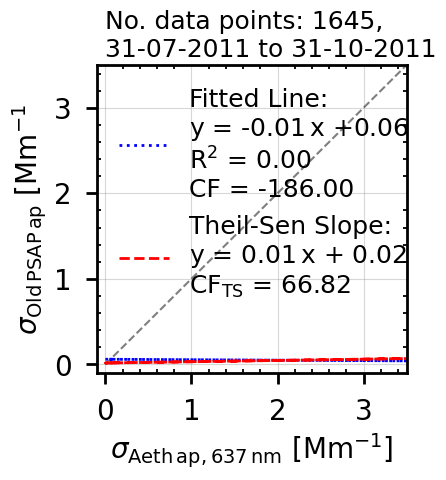

                cf_LMS      cf_TS   coef coef_ts    R2 length
2006-04-30    0.570256   1.142857   1.75    0.88  0.97   1833
2006-07-31    4.226074   2.052713   0.24    0.49  0.22   1099
2006-10-31    0.892897   0.964325   1.12    1.04  0.95   1703
2007-01-31    1.036037   0.996063   0.97    1.00  0.68   1423
2007-04-30    1.348303   1.345991   0.74    0.74  0.60    656
2007-07-31    1.075772   1.311398   0.93    0.76  0.55   1590
2007-10-31    0.789845   0.836473   1.27    1.20  0.95   2050
2008-01-31    0.692528   0.745654   1.44    1.34  0.97   2029
2008-04-30    0.778155   0.820022   1.29    1.22  0.89   1844
2008-07-31    2.616754   1.107579   0.38    0.90  0.30   1448
2008-10-31    0.972715   0.953794   1.03    1.05  0.87   1244
2009-01-31     0.85209   0.826531   1.17    1.21  0.87   1366
2009-04-30    1.269793   1.254342   0.79    0.80  0.84   1250
2009-07-31    1.489292   1.433811   0.67    0.70  0.71   1414
2009-10-31    1.317156   1.069788   0.76    0.93  0.43   1664
2010-01-

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


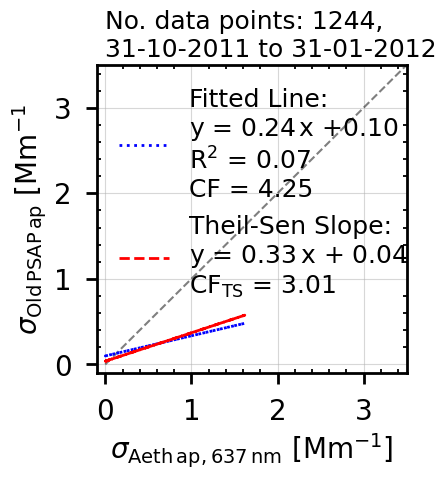

                cf_LMS      cf_TS   coef coef_ts    R2 length
2006-04-30    0.570256   1.142857   1.75    0.88  0.97   1833
2006-07-31    4.226074   2.052713   0.24    0.49  0.22   1099
2006-10-31    0.892897   0.964325   1.12    1.04  0.95   1703
2007-01-31    1.036037   0.996063   0.97    1.00  0.68   1423
2007-04-30    1.348303   1.345991   0.74    0.74  0.60    656
2007-07-31    1.075772   1.311398   0.93    0.76  0.55   1590
2007-10-31    0.789845   0.836473   1.27    1.20  0.95   2050
2008-01-31    0.692528   0.745654   1.44    1.34  0.97   2029
2008-04-30    0.778155   0.820022   1.29    1.22  0.89   1844
2008-07-31    2.616754   1.107579   0.38    0.90  0.30   1448
2008-10-31    0.972715   0.953794   1.03    1.05  0.87   1244
2009-01-31     0.85209   0.826531   1.17    1.21  0.87   1366
2009-04-30    1.269793   1.254342   0.79    0.80  0.84   1250
2009-07-31    1.489292   1.433811   0.67    0.70  0.71   1414
2009-10-31    1.317156   1.069788   0.76    0.93  0.43   1664
2010-01-

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


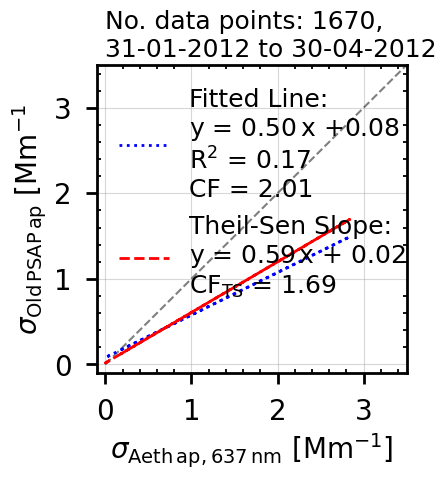

                cf_LMS      cf_TS   coef coef_ts    R2 length
2006-04-30    0.570256   1.142857   1.75    0.88  0.97   1833
2006-07-31    4.226074   2.052713   0.24    0.49  0.22   1099
2006-10-31    0.892897   0.964325   1.12    1.04  0.95   1703
2007-01-31    1.036037   0.996063   0.97    1.00  0.68   1423
2007-04-30    1.348303   1.345991   0.74    0.74  0.60    656
2007-07-31    1.075772   1.311398   0.93    0.76  0.55   1590
2007-10-31    0.789845   0.836473   1.27    1.20  0.95   2050
2008-01-31    0.692528   0.745654   1.44    1.34  0.97   2029
2008-04-30    0.778155   0.820022   1.29    1.22  0.89   1844
2008-07-31    2.616754   1.107579   0.38    0.90  0.30   1448
2008-10-31    0.972715   0.953794   1.03    1.05  0.87   1244
2009-01-31     0.85209   0.826531   1.17    1.21  0.87   1366
2009-04-30    1.269793   1.254342   0.79    0.80  0.84   1250
2009-07-31    1.489292   1.433811   0.67    0.70  0.71   1414
2009-10-31    1.317156   1.069788   0.76    0.93  0.43   1664
2010-01-

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


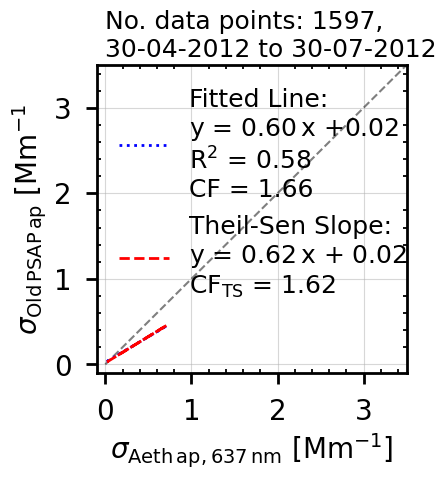

                cf_LMS      cf_TS   coef coef_ts    R2 length
2006-04-30    0.570256   1.142857   1.75    0.88  0.97   1833
2006-07-31    4.226074   2.052713   0.24    0.49  0.22   1099
2006-10-31    0.892897   0.964325   1.12    1.04  0.95   1703
2007-01-31    1.036037   0.996063   0.97    1.00  0.68   1423
2007-04-30    1.348303   1.345991   0.74    0.74  0.60    656
2007-07-31    1.075772   1.311398   0.93    0.76  0.55   1590
2007-10-31    0.789845   0.836473   1.27    1.20  0.95   2050
2008-01-31    0.692528   0.745654   1.44    1.34  0.97   2029
2008-04-30    0.778155   0.820022   1.29    1.22  0.89   1844
2008-07-31    2.616754   1.107579   0.38    0.90  0.30   1448
2008-10-31    0.972715   0.953794   1.03    1.05  0.87   1244
2009-01-31     0.85209   0.826531   1.17    1.21  0.87   1366
2009-04-30    1.269793   1.254342   0.79    0.80  0.84   1250
2009-07-31    1.489292   1.433811   0.67    0.70  0.71   1414
2009-10-31    1.317156   1.069788   0.76    0.93  0.43   1664
2010-01-

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


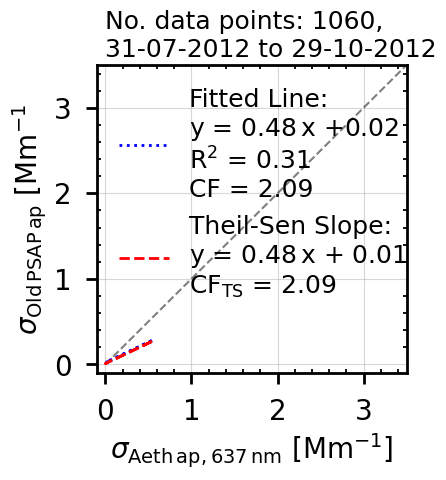

                cf_LMS      cf_TS   coef coef_ts    R2 length
2006-04-30    0.570256   1.142857   1.75    0.88  0.97   1833
2006-07-31    4.226074   2.052713   0.24    0.49  0.22   1099
2006-10-31    0.892897   0.964325   1.12    1.04  0.95   1703
2007-01-31    1.036037   0.996063   0.97    1.00  0.68   1423
2007-04-30    1.348303   1.345991   0.74    0.74  0.60    656
2007-07-31    1.075772   1.311398   0.93    0.76  0.55   1590
2007-10-31    0.789845   0.836473   1.27    1.20  0.95   2050
2008-01-31    0.692528   0.745654   1.44    1.34  0.97   2029
2008-04-30    0.778155   0.820022   1.29    1.22  0.89   1844
2008-07-31    2.616754   1.107579   0.38    0.90  0.30   1448
2008-10-31    0.972715   0.953794   1.03    1.05  0.87   1244
2009-01-31     0.85209   0.826531   1.17    1.21  0.87   1366
2009-04-30    1.269793   1.254342   0.79    0.80  0.84   1250
2009-07-31    1.489292   1.433811   0.67    0.70  0.71   1414
2009-10-31    1.317156   1.069788   0.76    0.93  0.43   1664
2010-01-

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


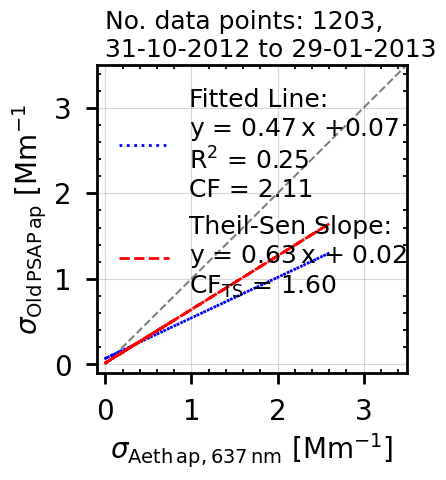

                cf_LMS      cf_TS   coef coef_ts    R2 length
2006-04-30    0.570256   1.142857   1.75    0.88  0.97   1833
2006-07-31    4.226074   2.052713   0.24    0.49  0.22   1099
2006-10-31    0.892897   0.964325   1.12    1.04  0.95   1703
2007-01-31    1.036037   0.996063   0.97    1.00  0.68   1423
2007-04-30    1.348303   1.345991   0.74    0.74  0.60    656
2007-07-31    1.075772   1.311398   0.93    0.76  0.55   1590
2007-10-31    0.789845   0.836473   1.27    1.20  0.95   2050
2008-01-31    0.692528   0.745654   1.44    1.34  0.97   2029
2008-04-30    0.778155   0.820022   1.29    1.22  0.89   1844
2008-07-31    2.616754   1.107579   0.38    0.90  0.30   1448
2008-10-31    0.972715   0.953794   1.03    1.05  0.87   1244
2009-01-31     0.85209   0.826531   1.17    1.21  0.87   1366
2009-04-30    1.269793   1.254342   0.79    0.80  0.84   1250
2009-07-31    1.489292   1.433811   0.67    0.70  0.71   1414
2009-10-31    1.317156   1.069788   0.76    0.93  0.43   1664
2010-01-

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


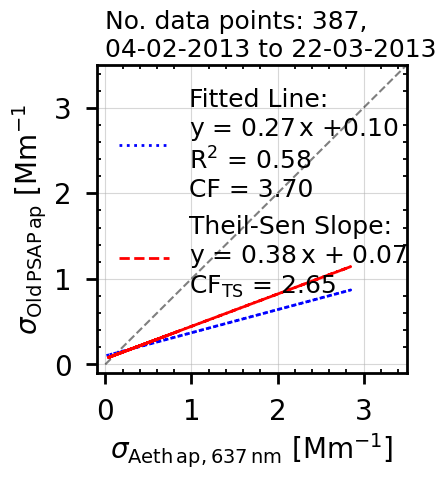

                cf_LMS      cf_TS   coef coef_ts    R2 length
2006-04-30    0.570256   1.142857   1.75    0.88  0.97   1833
2006-07-31    4.226074   2.052713   0.24    0.49  0.22   1099
2006-10-31    0.892897   0.964325   1.12    1.04  0.95   1703
2007-01-31    1.036037   0.996063   0.97    1.00  0.68   1423
2007-04-30    1.348303   1.345991   0.74    0.74  0.60    656
2007-07-31    1.075772   1.311398   0.93    0.76  0.55   1590
2007-10-31    0.789845   0.836473   1.27    1.20  0.95   2050
2008-01-31    0.692528   0.745654   1.44    1.34  0.97   2029
2008-04-30    0.778155   0.820022   1.29    1.22  0.89   1844
2008-07-31    2.616754   1.107579   0.38    0.90  0.30   1448
2008-10-31    0.972715   0.953794   1.03    1.05  0.87   1244
2009-01-31     0.85209   0.826531   1.17    1.21  0.87   1366
2009-04-30    1.269793   1.254342   0.79    0.80  0.84   1250
2009-07-31    1.489292   1.433811   0.67    0.70  0.71   1414
2009-10-31    1.317156   1.069788   0.76    0.93  0.43   1664
2010-01-

In [25]:
df_stats_table_aeth_oldpsap = produce_table(df_merged_oldpsapaeth, x_var='aeth637', y_var='abs637 mean')

## examine bad data: 

In [26]:
df_oldpsap637_hourly.min()

abs637 mean      9.311284e-06
abs637 median    9.311284e-06
abs637 std       6.155530e-08
abs637 var       3.789055e-15
dtype: float64

Index(['abs637 mean', 'abs637 median', 'abs637 std', 'abs637 var'], dtype='object')


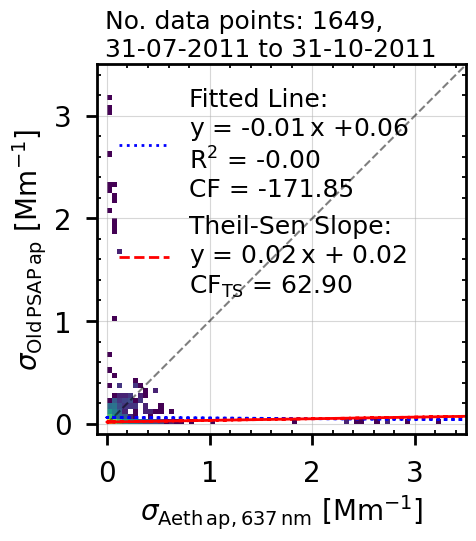

In [27]:
df_oldpsap637_hourly = fu_cf_abs.hourly_resample(df_oldpsap637, cols=['abs637']) 
df_merged_oldpsapaeth = fu_cf_abs.mergedfs(df_aeth_hourly, df_oldpsap637_hourly) #merge 

df_merged_oldpsapaeth_ = df_merged_oldpsapaeth['2011-07-31 17:00:00':'2011-10-31 17:00:00'].copy()

x_var='aeth637'
y_var='abs637 mean'

df_merged_oldpsapaeth_ = df_merged_oldpsapaeth_[[x_var, y_var]].astype({x_var: 'float16', y_var: 'float16'})

array_oldpsapaeth_ = produce_density_array(df_merged_oldpsapaeth_, x_var=x_var, y_var=y_var, value_limit=3.5, 
                                          step = 0.05,)

fig = plt.figure()
ax = fig.add_subplot(111)
make_plot(df_merged_oldpsapaeth_, x_var, y_var, array=array_oldpsapaeth_,
              value_limit=3.5, cmap='viridis', xlabel="$\sigma_{\mathrm{Aeth \,ap, 637\, nm}}$ [Mm$^{-1}$]",
              ylabel= "$\sigma_{\mathrm{Old\,PSAP\,ap}}$ [Mm$^{-1}]$", loc_legend='upper left', 
              ax=ax)
plt.show()

In [28]:
df_stats_table_aeth_oldpsap.head(2)

cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.570256  1.142857  1.75    0.88  0.97   1833
2006-07-31  4.226074  2.052713  0.24    0.49  0.22   1099

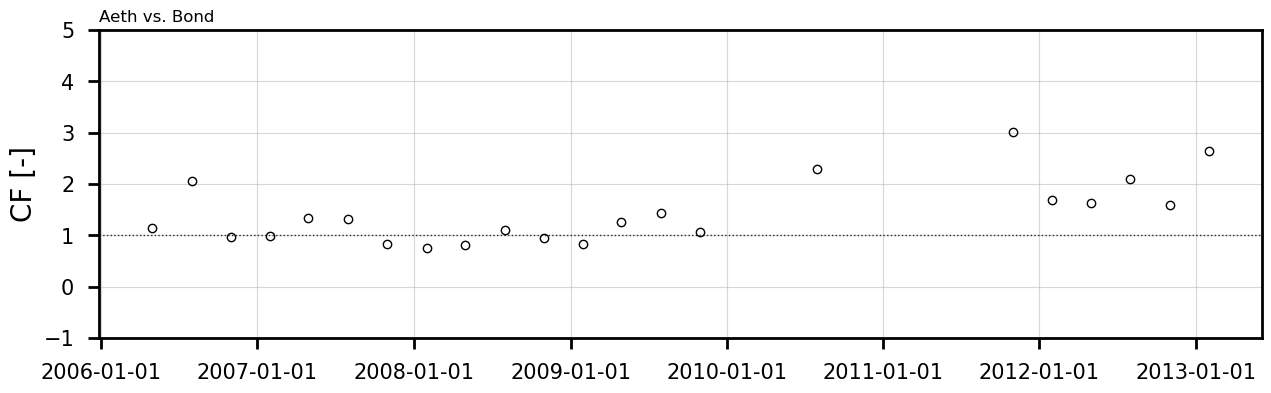

In [29]:
fig = quick_plot(df_stats_table_aeth_oldpsap, 'Aeth vs. Bond')

In [30]:
def save_array(array, savepath, filename):
    np.savetxt(savepath + "\\" + str(filename) + ".sum", array, fmt="%.8f")

In [31]:
save_array(array_oldpsapaeth, 
           savepath=loadpath+"\\aethalometer",
           filename='array_oldpsapaeth')

# new vs. aeth:

In [32]:
df_newpsap637_hourly = fu_cf_abs.hourly_resample(df_newpsap637, cols=['abs637']) 
df_merged_newpsapaeth = fu_cf_abs.mergedfs(df_aeth_hourly, df_newpsap637_hourly) #merge 

x_var='aeth637'
y_var='abs637 mean'

df_merged_newpsapaeth = df_merged_newpsapaeth[[x_var, y_var]].astype({x_var: 'float16', y_var: 'float16'})
array_newpsapaeth = produce_density_array(df_merged_newpsapaeth, x_var=x_var, y_var=y_var, value_limit=3.5, 
                                          step = 0.05)

Index(['abs637 mean', 'abs637 median', 'abs637 std', 'abs637 var'], dtype='object')


aeth637
abs637 mean
2012-11-30 00:00:00
2161
2013-02-28 00:00:00
2209
2013-05-31 00:00:00
2209
2013-08-31 00:00:00
2185
2013-11-30 00:00:00
2161
2014-02-28 00:00:00
2209
2014-05-31 00:00:00
2209
2014-08-31 00:00:00
2185
2014-11-30 00:00:00
2161
2015-02-28 00:00:00
2209
2015-05-31 00:00:00
2209
2015-08-31 00:00:00
2185
2015-11-30 00:00:00
2185
2016-02-29 00:00:00
2209
2016-05-31 00:00:00
2209


C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


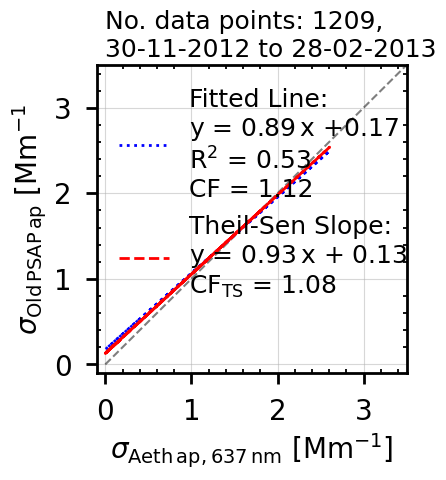

              cf_LMS cf_TS coef coef_ts   R2 length
2012-11-30  1.122066   NaN  NaN     NaN  NaN    NaN
              cf_LMS     cf_TS coef coef_ts   R2 length
2012-11-30  1.122066  1.080818  NaN     NaN  NaN    NaN
              cf_LMS     cf_TS  coef coef_ts   R2 length
2012-11-30  1.122066  1.080818  0.89     NaN  NaN    NaN
              cf_LMS     cf_TS  coef coef_ts   R2 length
2012-11-30  1.122066  1.080818  0.89    0.93  NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  1.122066  1.080818  0.89    0.93  0.53    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  1.122066  1.080818  0.89    0.93  0.53   1209


C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


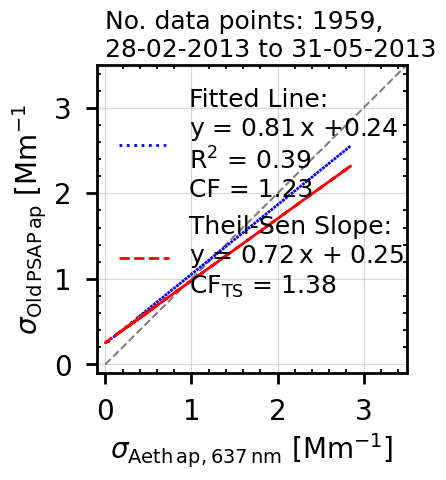

              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  1.122066  1.080818  0.89    0.93  0.53   1209
2013-02-28  1.232087       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  1.122066  1.080818  0.89    0.93  0.53   1209
2013-02-28  1.232087  1.380259   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  1.122066  1.080818  0.89    0.93  0.53   1209
2013-02-28  1.232087  1.380259  0.81     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  1.122066  1.080818  0.89    0.93  0.53   1209
2013-02-28  1.232087  1.380259  0.81    0.72   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  1.122066  1.080818  0.89    0.93  0.53   1209
2013-02-28  1.232087  1.380259  0.81    0.72  0.39    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  1.122066  1.080818  0.89    0.93  0.53   1209
2013-02-28  1.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


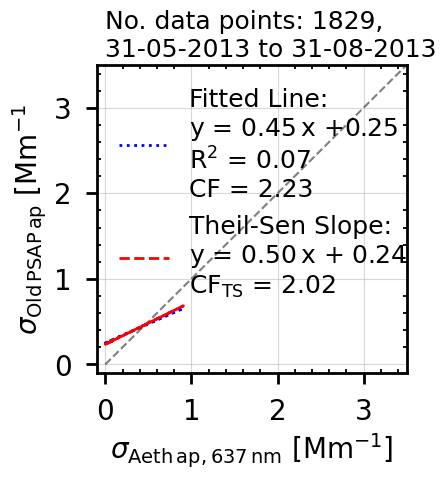

              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  1.122066  1.080818  0.89    0.93  0.53   1209
2013-02-28  1.232087  1.380259  0.81    0.72  0.39   1959
2013-05-31   2.23487       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  1.122066  1.080818  0.89    0.93  0.53   1209
2013-02-28  1.232087  1.380259  0.81    0.72  0.39   1959
2013-05-31   2.23487    2.0189   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  1.122066  1.080818  0.89    0.93  0.53   1209
2013-02-28  1.232087  1.380259  0.81    0.72  0.39   1959
2013-05-31   2.23487    2.0189  0.45     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  1.122066  1.080818  0.89    0.93  0.53   1209
2013-02-28  1.232087  1.380259  0.81    0.72  0.39   1959
2013-05-31   2.23487    2.0189  0.45    0.50   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  1.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


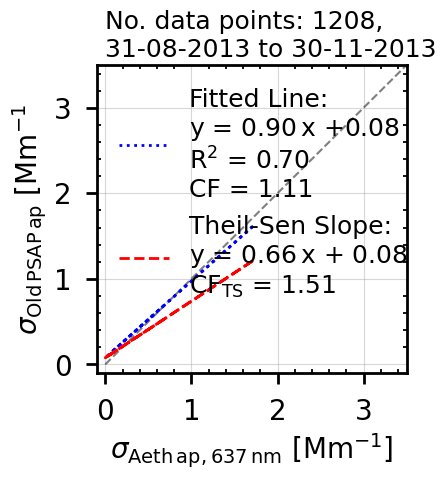

              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  1.122066  1.080818  0.89    0.93  0.53   1209
2013-02-28  1.232087  1.380259  0.81    0.72  0.39   1959
2013-05-31   2.23487    2.0189  0.45    0.50  0.07   1829
2013-08-31  1.114921       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  1.122066  1.080818  0.89    0.93  0.53   1209
2013-02-28  1.232087  1.380259  0.81    0.72  0.39   1959
2013-05-31   2.23487    2.0189  0.45    0.50  0.07   1829
2013-08-31  1.114921  1.511541   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  1.122066  1.080818  0.89    0.93  0.53   1209
2013-02-28  1.232087  1.380259  0.81    0.72  0.39   1959
2013-05-31   2.23487    2.0189  0.45    0.50  0.07   1829
2013-08-31  1.114921  1.511541  0.90     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  1.122066  1.080818  0.89    0.93  0.53   1209
2013-02-28  1.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


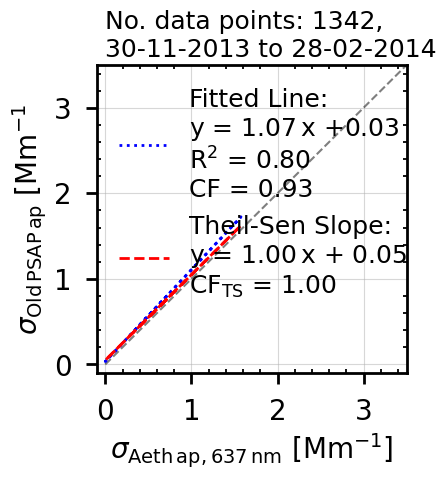

              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  1.122066  1.080818  0.89    0.93  0.53   1209
2013-02-28  1.232087  1.380259  0.81    0.72  0.39   1959
2013-05-31   2.23487    2.0189  0.45    0.50  0.07   1829
2013-08-31  1.114921  1.511541  0.90    0.66  0.70   1208
2013-11-30  0.931945       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  1.122066  1.080818  0.89    0.93  0.53   1209
2013-02-28  1.232087  1.380259  0.81    0.72  0.39   1959
2013-05-31   2.23487    2.0189  0.45    0.50  0.07   1829
2013-08-31  1.114921  1.511541  0.90    0.66  0.70   1208
2013-11-30  0.931945  1.000682   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  1.122066  1.080818  0.89    0.93  0.53   1209
2013-02-28  1.232087  1.380259  0.81    0.72  0.39   1959
2013-05-31   2.23487    2.0189  0.45    0.50  0.07   1829
2013-08-31  1.114921  1.511541  0.90    0.66  0.70   1208
2013-11-30  0.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


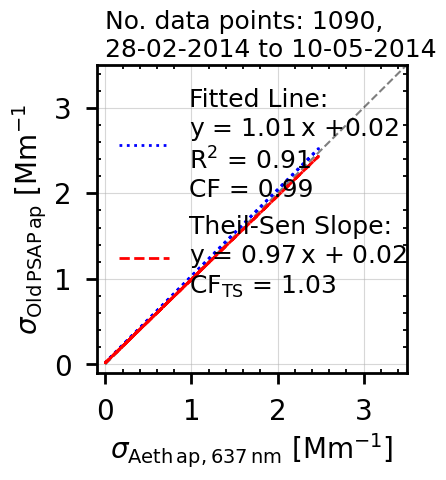

              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  1.122066  1.080818  0.89    0.93  0.53   1209
2013-02-28  1.232087  1.380259  0.81    0.72  0.39   1959
2013-05-31   2.23487    2.0189  0.45    0.50  0.07   1829
2013-08-31  1.114921  1.511541  0.90    0.66  0.70   1208
2013-11-30  0.931945  1.000682  1.07    1.00  0.80   1342
2014-02-28  0.990788       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  1.122066  1.080818  0.89    0.93  0.53   1209
2013-02-28  1.232087  1.380259  0.81    0.72  0.39   1959
2013-05-31   2.23487    2.0189  0.45    0.50  0.07   1829
2013-08-31  1.114921  1.511541  0.90    0.66  0.70   1208
2013-11-30  0.931945  1.000682  1.07    1.00  0.80   1342
2014-02-28  0.990788  1.025641   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  1.122066  1.080818  0.89    0.93  0.53   1209
2013-02-28  1.232087  1.380259  0.81    0.72  0.39   1959
2013-05-31   2

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


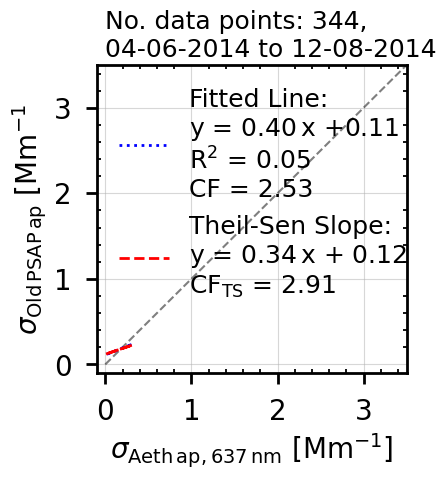

              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  1.122066  1.080818  0.89    0.93  0.53   1209
2013-02-28  1.232087  1.380259  0.81    0.72  0.39   1959
2013-05-31   2.23487    2.0189  0.45    0.50  0.07   1829
2013-08-31  1.114921  1.511541  0.90    0.66  0.70   1208
2013-11-30  0.931945  1.000682  1.07    1.00  0.80   1342
2014-02-28  0.990788  1.025641  1.01    0.97  0.91   1090
2014-05-31  2.528571       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  1.122066  1.080818  0.89    0.93  0.53   1209
2013-02-28  1.232087  1.380259  0.81    0.72  0.39   1959
2013-05-31   2.23487    2.0189  0.45    0.50  0.07   1829
2013-08-31  1.114921  1.511541  0.90    0.66  0.70   1208
2013-11-30  0.931945  1.000682  1.07    1.00  0.80   1342
2014-02-28  0.990788  1.025641  1.01    0.97  0.91   1090
2014-05-31  2.528571  2.914358   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  1.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


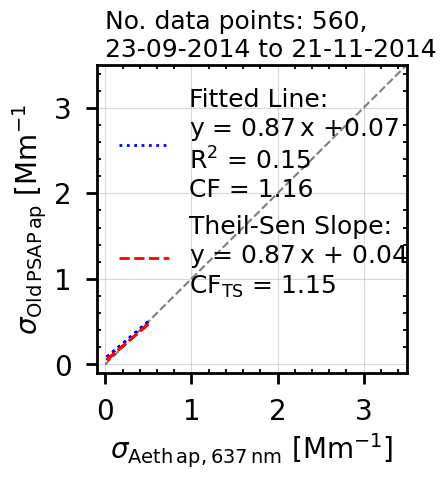

              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  1.122066  1.080818  0.89    0.93  0.53   1209
2013-02-28  1.232087  1.380259  0.81    0.72  0.39   1959
2013-05-31   2.23487    2.0189  0.45    0.50  0.07   1829
2013-08-31  1.114921  1.511541  0.90    0.66  0.70   1208
2013-11-30  0.931945  1.000682  1.07    1.00  0.80   1342
2014-02-28  0.990788  1.025641  1.01    0.97  0.91   1090
2014-05-31  2.528571  2.914358  0.40    0.34  0.05    344
2014-08-31  1.155085       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  1.122066  1.080818  0.89    0.93  0.53   1209
2013-02-28  1.232087  1.380259  0.81    0.72  0.39   1959
2013-05-31   2.23487    2.0189  0.45    0.50  0.07   1829
2013-08-31  1.114921  1.511541  0.90    0.66  0.70   1208
2013-11-30  0.931945  1.000682  1.07    1.00  0.80   1342
2014-02-28  0.990788  1.025641  1.01    0.97  0.91   1090
2014-05-31  2.528571  2.914358  0.40    0.34  0.05    344
2014-08-31  1.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


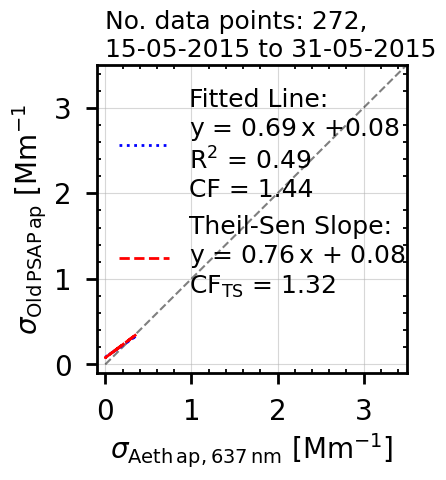

              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  1.122066  1.080818  0.89    0.93  0.53   1209
2013-02-28  1.232087  1.380259  0.81    0.72  0.39   1959
2013-05-31   2.23487    2.0189  0.45    0.50  0.07   1829
2013-08-31  1.114921  1.511541  0.90    0.66  0.70   1208
2013-11-30  0.931945  1.000682  1.07    1.00  0.80   1342
2014-02-28  0.990788  1.025641  1.01    0.97  0.91   1090
2014-05-31  2.528571  2.914358  0.40    0.34  0.05    344
2014-08-31  1.155085  1.154063  0.87    0.87  0.15    560
2015-02-28  1.444875       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  1.122066  1.080818  0.89    0.93  0.53   1209
2013-02-28  1.232087  1.380259  0.81    0.72  0.39   1959
2013-05-31   2.23487    2.0189  0.45    0.50  0.07   1829
2013-08-31  1.114921  1.511541  0.90    0.66  0.70   1208
2013-11-30  0.931945  1.000682  1.07    1.00  0.80   1342
2014-02-28  0.990788  1.025641  1.01    0.97  0.91   1090
2014-05-31  2.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


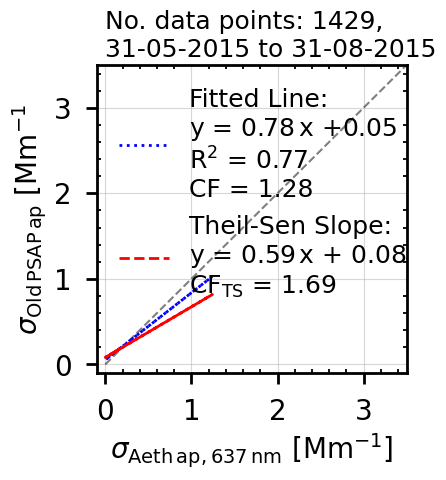

              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  1.122066  1.080818  0.89    0.93  0.53   1209
2013-02-28  1.232087  1.380259  0.81    0.72  0.39   1959
2013-05-31   2.23487    2.0189  0.45    0.50  0.07   1829
2013-08-31  1.114921  1.511541  0.90    0.66  0.70   1208
2013-11-30  0.931945  1.000682  1.07    1.00  0.80   1342
2014-02-28  0.990788  1.025641  1.01    0.97  0.91   1090
2014-05-31  2.528571  2.914358  0.40    0.34  0.05    344
2014-08-31  1.155085  1.154063  0.87    0.87  0.15    560
2015-02-28  1.444875  1.322662  0.69    0.76  0.49    272
2015-05-31   1.27695       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  1.122066  1.080818  0.89    0.93  0.53   1209
2013-02-28  1.232087  1.380259  0.81    0.72  0.39   1959
2013-05-31   2.23487    2.0189  0.45    0.50  0.07   1829
2013-08-31  1.114921  1.511541  0.90    0.66  0.70   1208
2013-11-30  0.931945  1.000682  1.07    1.00  0.80   1342
2014-02-28  0.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


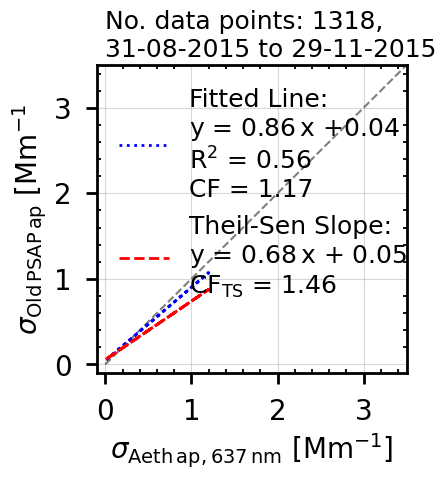

              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  1.122066  1.080818  0.89    0.93  0.53   1209
2013-02-28  1.232087  1.380259  0.81    0.72  0.39   1959
2013-05-31   2.23487    2.0189  0.45    0.50  0.07   1829
2013-08-31  1.114921  1.511541  0.90    0.66  0.70   1208
2013-11-30  0.931945  1.000682  1.07    1.00  0.80   1342
2014-02-28  0.990788  1.025641  1.01    0.97  0.91   1090
2014-05-31  2.528571  2.914358  0.40    0.34  0.05    344
2014-08-31  1.155085  1.154063  0.87    0.87  0.15    560
2015-02-28  1.444875  1.322662  0.69    0.76  0.49    272
2015-05-31   1.27695   1.68978  0.78    0.59  0.77   1429
2015-08-31  1.165995       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  1.122066  1.080818  0.89    0.93  0.53   1209
2013-02-28  1.232087  1.380259  0.81    0.72  0.39   1959
2013-05-31   2.23487    2.0189  0.45    0.50  0.07   1829
2013-08-31  1.114921  1.511541  0.90    0.66  0.70   1208
2013-11-30  0.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


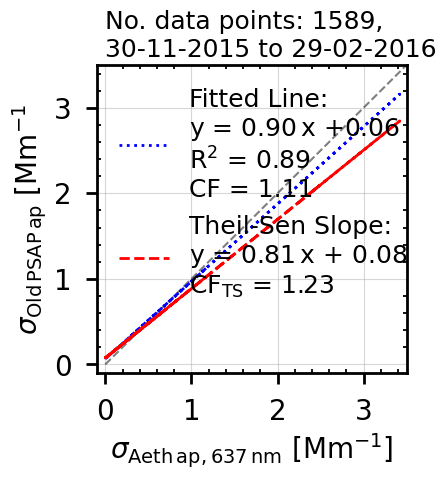

              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  1.122066  1.080818  0.89    0.93  0.53   1209
2013-02-28  1.232087  1.380259  0.81    0.72  0.39   1959
2013-05-31   2.23487    2.0189  0.45    0.50  0.07   1829
2013-08-31  1.114921  1.511541  0.90    0.66  0.70   1208
2013-11-30  0.931945  1.000682  1.07    1.00  0.80   1342
2014-02-28  0.990788  1.025641  1.01    0.97  0.91   1090
2014-05-31  2.528571  2.914358  0.40    0.34  0.05    344
2014-08-31  1.155085  1.154063  0.87    0.87  0.15    560
2015-02-28  1.444875  1.322662  0.69    0.76  0.49    272
2015-05-31   1.27695   1.68978  0.78    0.59  0.77   1429
2015-08-31  1.165995  1.462146  0.86    0.68  0.56   1318
2015-11-30  1.105139       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  1.122066  1.080818  0.89    0.93  0.53   1209
2013-02-28  1.232087  1.380259  0.81    0.72  0.39   1959
2013-05-31   2.23487    2.0189  0.45    0.50  0.07   1829
2013-08-31  1.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


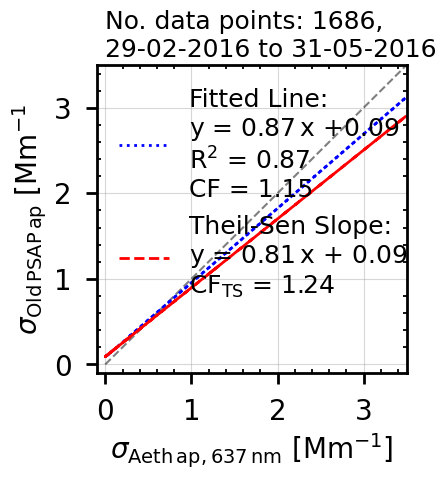

              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  1.122066  1.080818  0.89    0.93  0.53   1209
2013-02-28  1.232087  1.380259  0.81    0.72  0.39   1959
2013-05-31   2.23487    2.0189  0.45    0.50  0.07   1829
2013-08-31  1.114921  1.511541  0.90    0.66  0.70   1208
2013-11-30  0.931945  1.000682  1.07    1.00  0.80   1342
2014-02-28  0.990788  1.025641  1.01    0.97  0.91   1090
2014-05-31  2.528571  2.914358  0.40    0.34  0.05    344
2014-08-31  1.155085  1.154063  0.87    0.87  0.15    560
2015-02-28  1.444875  1.322662  0.69    0.76  0.49    272
2015-05-31   1.27695   1.68978  0.78    0.59  0.77   1429
2015-08-31  1.165995  1.462146  0.86    0.68  0.56   1318
2015-11-30  1.105139   1.23494  0.90    0.81  0.89   1589
2016-02-29  1.150799       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  1.122066  1.080818  0.89    0.93  0.53   1209
2013-02-28  1.232087  1.380259  0.81    0.72  0.39   1959
2013-05-31   2

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


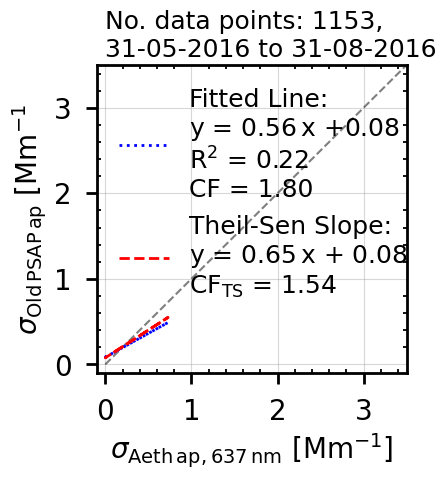

              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  1.122066  1.080818  0.89    0.93  0.53   1209
2013-02-28  1.232087  1.380259  0.81    0.72  0.39   1959
2013-05-31   2.23487    2.0189  0.45    0.50  0.07   1829
2013-08-31  1.114921  1.511541  0.90    0.66  0.70   1208
2013-11-30  0.931945  1.000682  1.07    1.00  0.80   1342
2014-02-28  0.990788  1.025641  1.01    0.97  0.91   1090
2014-05-31  2.528571  2.914358  0.40    0.34  0.05    344
2014-08-31  1.155085  1.154063  0.87    0.87  0.15    560
2015-02-28  1.444875  1.322662  0.69    0.76  0.49    272
2015-05-31   1.27695   1.68978  0.78    0.59  0.77   1429
2015-08-31  1.165995  1.462146  0.86    0.68  0.56   1318
2015-11-30  1.105139   1.23494  0.90    0.81  0.89   1589
2016-02-29  1.150799  1.241788  0.87    0.81  0.87   1686
2016-05-31  1.797368       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  1.122066  1.080818  0.89    0.93  0.53   1209
2013-02-28  1.

In [33]:
df_stats_table_aeth_newpsap = produce_table(df_merged_newpsapaeth, x_var='aeth637', y_var='abs637 mean')

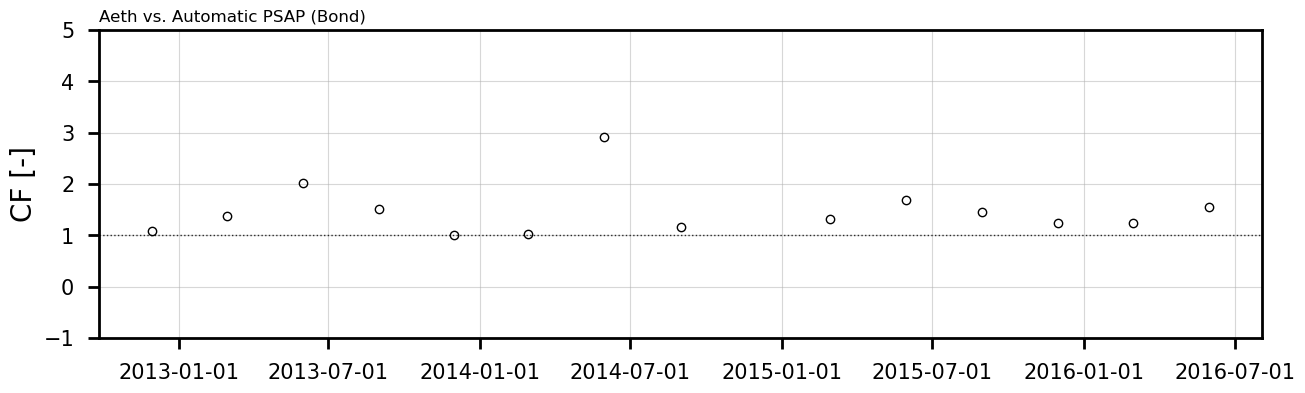

In [34]:
fig = quick_plot(df_stats_table_aeth_newpsap, 'Aeth vs. Automatic PSAP (Bond)')

## maap vs. aeth: 

In [35]:
df_merged_maapaeth = fu_cf_abs.mergedfs(df_aeth_hourly, df_MAAP) #merge 
x_var='aeth637'
y_var='absorption'
df_merged_maapaeth = df_merged_maapaeth[[x_var, y_var]].astype({x_var: 'float16', y_var: 'float16'})
array_maapaeth = produce_density_array(df_merged_maapaeth, x_var=x_var, y_var=y_var, value_limit=3.5, 
                                          step = 0.05)

aeth637
absorption
2014-11-30 00:00:00
2151
2015-02-28 00:00:00
2130
2015-05-31 00:00:00
2091
2015-08-31 00:00:00
1848
2015-11-30 00:00:00
2158
2016-02-29 00:00:00
2061
2016-05-31 00:00:00
2113
2016-08-31 00:00:00
2089
2016-11-30 00:00:00
2075
2017-02-28 00:00:00
1868
2017-05-31 00:00:00
2074
2017-08-31 00:00:00
1964
2017-11-30 00:00:00
2135
2018-02-28 00:00:00
1978
2018-05-31 00:00:00
1897
2018-08-31 00:00:00
1859
2018-11-30 00:00:00
1436
2019-02-28 00:00:00
2095
2019-05-31 00:00:00
1623
2019-08-31 00:00:00
1957


C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


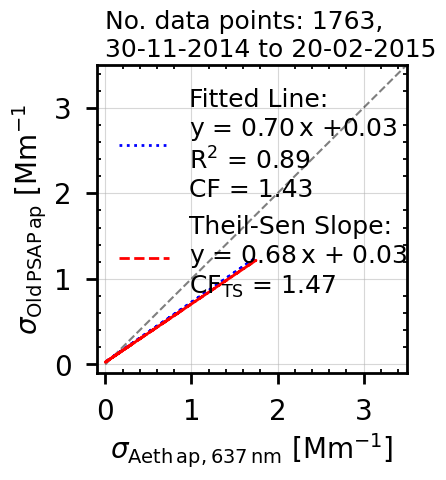

              cf_LMS cf_TS coef coef_ts   R2 length
2014-11-30  1.433177   NaN  NaN     NaN  NaN    NaN
              cf_LMS     cf_TS coef coef_ts   R2 length
2014-11-30  1.433177  1.469212  NaN     NaN  NaN    NaN
              cf_LMS     cf_TS  coef coef_ts   R2 length
2014-11-30  1.433177  1.469212  0.70     NaN  NaN    NaN
              cf_LMS     cf_TS  coef coef_ts   R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763


C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


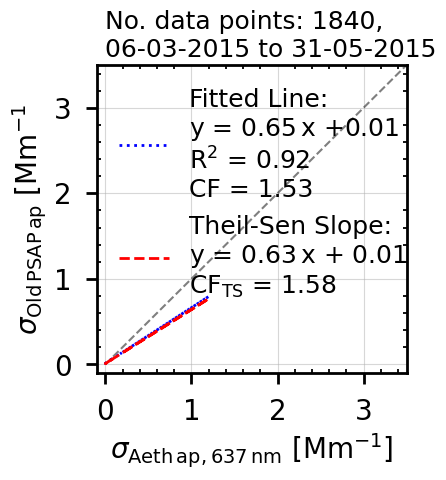

              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.534084       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.534084  1.584084   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.534084  1.584084  0.65     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.534084  1.584084  0.65    0.63   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.534084  1.584084  0.65    0.63  0.92    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


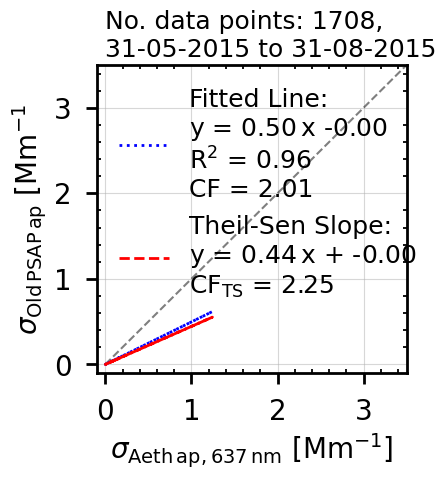

              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.534084  1.584084  0.65    0.63  0.92   1840
2015-05-31  2.012768       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.534084  1.584084  0.65    0.63  0.92   1840
2015-05-31  2.012768  2.250534   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.534084  1.584084  0.65    0.63  0.92   1840
2015-05-31  2.012768  2.250534  0.50     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.534084  1.584084  0.65    0.63  0.92   1840
2015-05-31  2.012768  2.250534  0.50    0.44   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


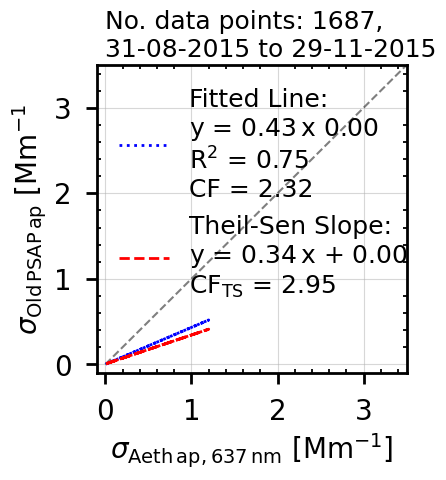

              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.534084  1.584084  0.65    0.63  0.92   1840
2015-05-31  2.012768  2.250534  0.50    0.44  0.96   1708
2015-08-31  2.319054       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.534084  1.584084  0.65    0.63  0.92   1840
2015-05-31  2.012768  2.250534  0.50    0.44  0.96   1708
2015-08-31  2.319054  2.952941   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.534084  1.584084  0.65    0.63  0.92   1840
2015-05-31  2.012768  2.250534  0.50    0.44  0.96   1708
2015-08-31  2.319054  2.952941  0.43     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


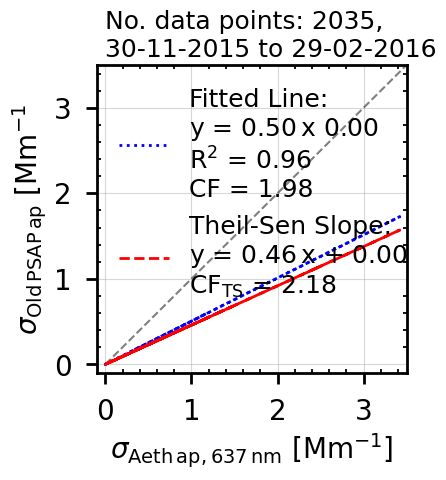

              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.534084  1.584084  0.65    0.63  0.92   1840
2015-05-31  2.012768  2.250534  0.50    0.44  0.96   1708
2015-08-31  2.319054  2.952941  0.43    0.34  0.75   1687
2015-11-30  1.980609       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.534084  1.584084  0.65    0.63  0.92   1840
2015-05-31  2.012768  2.250534  0.50    0.44  0.96   1708
2015-08-31  2.319054  2.952941  0.43    0.34  0.75   1687
2015-11-30  1.980609  2.180314   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.534084  1.584084  0.65    0.63  0.92   1840
2015-05-31  2.012768  2.250534  0.50    0.44  0.96   1708
2015-08-31  2.319054  2.952941  0.43    0.34  0.75   1687
2015-11-30  1.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


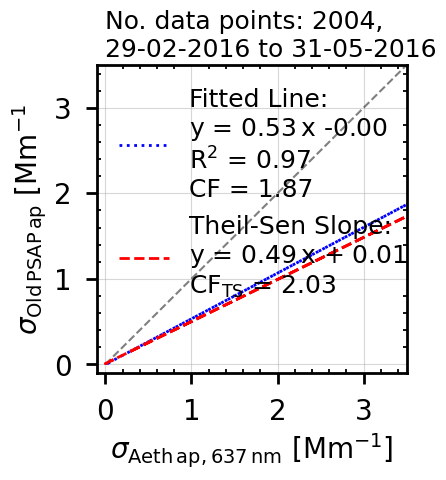

              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.534084  1.584084  0.65    0.63  0.92   1840
2015-05-31  2.012768  2.250534  0.50    0.44  0.96   1708
2015-08-31  2.319054  2.952941  0.43    0.34  0.75   1687
2015-11-30  1.980609  2.180314  0.50    0.46  0.96   2035
2016-02-29  1.870486       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.534084  1.584084  0.65    0.63  0.92   1840
2015-05-31  2.012768  2.250534  0.50    0.44  0.96   1708
2015-08-31  2.319054  2.952941  0.43    0.34  0.75   1687
2015-11-30  1.980609  2.180314  0.50    0.46  0.96   2035
2016-02-29  1.870486  2.032641   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.534084  1.584084  0.65    0.63  0.92   1840
2015-05-31  2.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


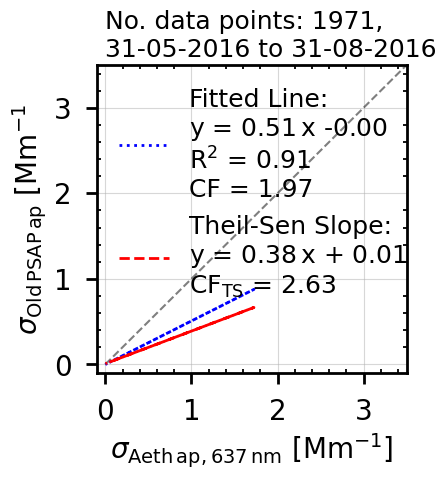

              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.534084  1.584084  0.65    0.63  0.92   1840
2015-05-31  2.012768  2.250534  0.50    0.44  0.96   1708
2015-08-31  2.319054  2.952941  0.43    0.34  0.75   1687
2015-11-30  1.980609  2.180314  0.50    0.46  0.96   2035
2016-02-29  1.870486  2.032641  0.53    0.49  0.97   2004
2016-05-31   1.96632       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.534084  1.584084  0.65    0.63  0.92   1840
2015-05-31  2.012768  2.250534  0.50    0.44  0.96   1708
2015-08-31  2.319054  2.952941  0.43    0.34  0.75   1687
2015-11-30  1.980609  2.180314  0.50    0.46  0.96   2035
2016-02-29  1.870486  2.032641  0.53    0.49  0.97   2004
2016-05-31   1.96632  2.627535   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


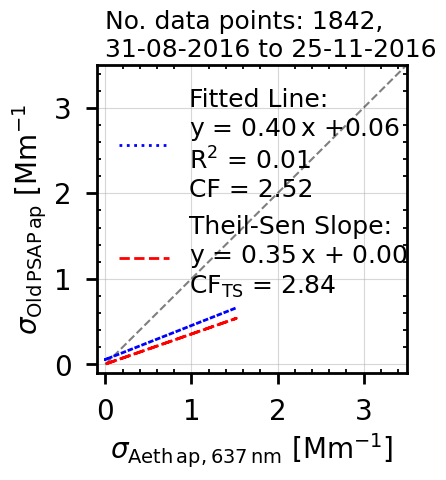

              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.534084  1.584084  0.65    0.63  0.92   1840
2015-05-31  2.012768  2.250534  0.50    0.44  0.96   1708
2015-08-31  2.319054  2.952941  0.43    0.34  0.75   1687
2015-11-30  1.980609  2.180314  0.50    0.46  0.96   2035
2016-02-29  1.870486  2.032641  0.53    0.49  0.97   2004
2016-05-31   1.96632  2.627535  0.51    0.38  0.91   1971
2016-08-31  2.517012       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.534084  1.584084  0.65    0.63  0.92   1840
2015-05-31  2.012768  2.250534  0.50    0.44  0.96   1708
2015-08-31  2.319054  2.952941  0.43    0.34  0.75   1687
2015-11-30  1.980609  2.180314  0.50    0.46  0.96   2035
2016-02-29  1.870486  2.032641  0.53    0.49  0.97   2004
2016-05-31   1.96632  2.627535  0.51    0.38  0.91   1971
2016-08-31  2.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


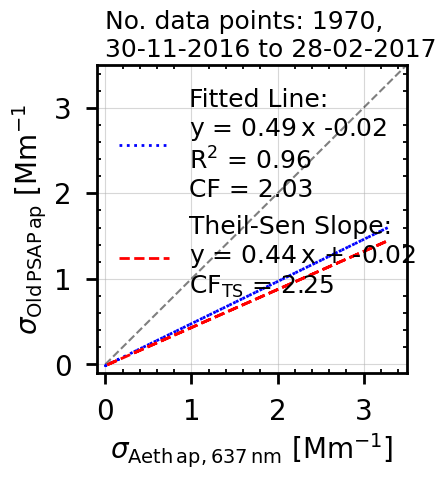

              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.534084  1.584084  0.65    0.63  0.92   1840
2015-05-31  2.012768  2.250534  0.50    0.44  0.96   1708
2015-08-31  2.319054  2.952941  0.43    0.34  0.75   1687
2015-11-30  1.980609  2.180314  0.50    0.46  0.96   2035
2016-02-29  1.870486  2.032641  0.53    0.49  0.97   2004
2016-05-31   1.96632  2.627535  0.51    0.38  0.91   1971
2016-08-31  2.517012  2.843931  0.40    0.35  0.01   1842
2016-11-30  2.030955       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.534084  1.584084  0.65    0.63  0.92   1840
2015-05-31  2.012768  2.250534  0.50    0.44  0.96   1708
2015-08-31  2.319054  2.952941  0.43    0.34  0.75   1687
2015-11-30  1.980609  2.180314  0.50    0.46  0.96   2035
2016-02-29  1.870486  2.032641  0.53    0.49  0.97   2004
2016-05-31   1

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


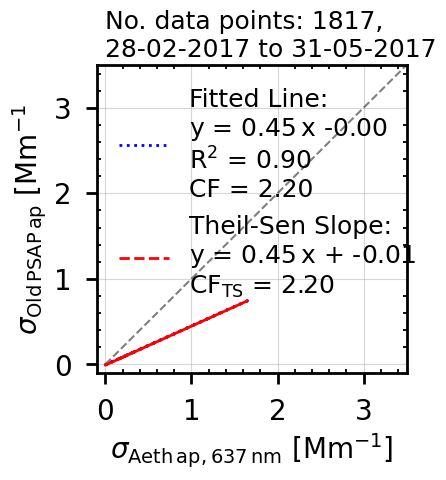

              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.534084  1.584084  0.65    0.63  0.92   1840
2015-05-31  2.012768  2.250534  0.50    0.44  0.96   1708
2015-08-31  2.319054  2.952941  0.43    0.34  0.75   1687
2015-11-30  1.980609  2.180314  0.50    0.46  0.96   2035
2016-02-29  1.870486  2.032641  0.53    0.49  0.97   2004
2016-05-31   1.96632  2.627535  0.51    0.38  0.91   1971
2016-08-31  2.517012  2.843931  0.40    0.35  0.01   1842
2016-11-30  2.030955  2.248294  0.49    0.44  0.96   1970
2017-02-28  2.204863       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.534084  1.584084  0.65    0.63  0.92   1840
2015-05-31  2.012768  2.250534  0.50    0.44  0.96   1708
2015-08-31  2.319054  2.952941  0.43    0.34  0.75   1687
2015-11-30  1.980609  2.180314  0.50    0.46  0.96   2035
2016-02-29  1.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


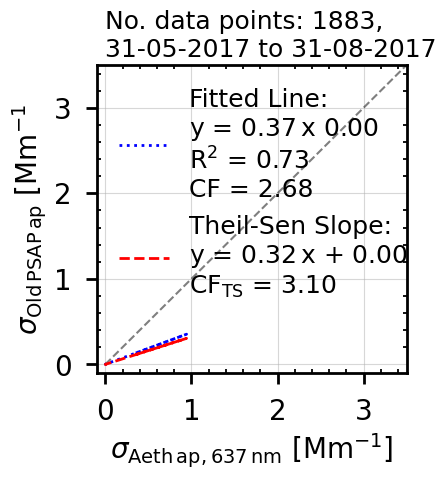

              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.534084  1.584084  0.65    0.63  0.92   1840
2015-05-31  2.012768  2.250534  0.50    0.44  0.96   1708
2015-08-31  2.319054  2.952941  0.43    0.34  0.75   1687
2015-11-30  1.980609  2.180314  0.50    0.46  0.96   2035
2016-02-29  1.870486  2.032641  0.53    0.49  0.97   2004
2016-05-31   1.96632  2.627535  0.51    0.38  0.91   1971
2016-08-31  2.517012  2.843931  0.40    0.35  0.01   1842
2016-11-30  2.030955  2.248294  0.49    0.44  0.96   1970
2017-02-28  2.204863  2.197811  0.45    0.45  0.90   1817
2017-05-31  2.681728       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.534084  1.584084  0.65    0.63  0.92   1840
2015-05-31  2.012768  2.250534  0.50    0.44  0.96   1708
2015-08-31  2.319054  2.952941  0.43    0.34  0.75   1687
2015-11-30  1.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


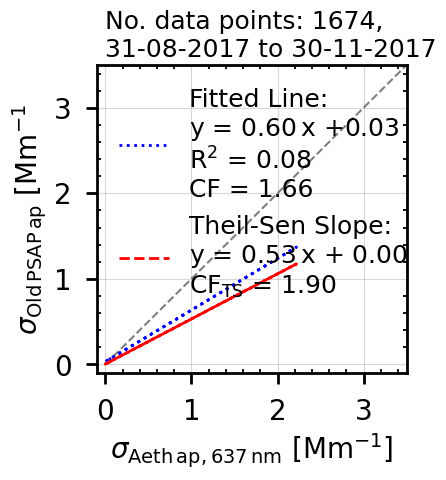

              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.534084  1.584084  0.65    0.63  0.92   1840
2015-05-31  2.012768  2.250534  0.50    0.44  0.96   1708
2015-08-31  2.319054  2.952941  0.43    0.34  0.75   1687
2015-11-30  1.980609  2.180314  0.50    0.46  0.96   2035
2016-02-29  1.870486  2.032641  0.53    0.49  0.97   2004
2016-05-31   1.96632  2.627535  0.51    0.38  0.91   1971
2016-08-31  2.517012  2.843931  0.40    0.35  0.01   1842
2016-11-30  2.030955  2.248294  0.49    0.44  0.96   1970
2017-02-28  2.204863  2.197811  0.45    0.45  0.90   1817
2017-05-31  2.681728  3.103887  0.37    0.32  0.73   1883
2017-08-31  1.656546       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.534084  1.584084  0.65    0.63  0.92   1840
2015-05-31  2.012768  2.250534  0.50    0.44  0.96   1708
2015-08-31  2.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


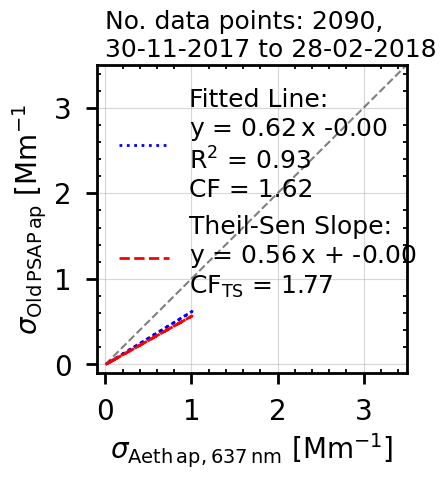

              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.534084  1.584084  0.65    0.63  0.92   1840
2015-05-31  2.012768  2.250534  0.50    0.44  0.96   1708
2015-08-31  2.319054  2.952941  0.43    0.34  0.75   1687
2015-11-30  1.980609  2.180314  0.50    0.46  0.96   2035
2016-02-29  1.870486  2.032641  0.53    0.49  0.97   2004
2016-05-31   1.96632  2.627535  0.51    0.38  0.91   1971
2016-08-31  2.517012  2.843931  0.40    0.35  0.01   1842
2016-11-30  2.030955  2.248294  0.49    0.44  0.96   1970
2017-02-28  2.204863  2.197811  0.45    0.45  0.90   1817
2017-05-31  2.681728  3.103887  0.37    0.32  0.73   1883
2017-08-31  1.656546  1.895609  0.60    0.53  0.08   1674
2017-11-30  1.619007       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.534084  1.584084  0.65    0.63  0.92   1840
2015-05-31  2.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


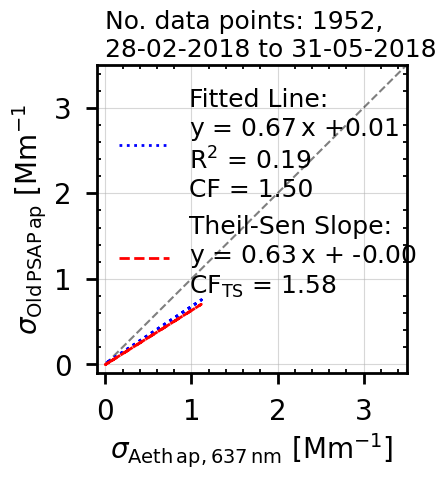

              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.534084  1.584084  0.65    0.63  0.92   1840
2015-05-31  2.012768  2.250534  0.50    0.44  0.96   1708
2015-08-31  2.319054  2.952941  0.43    0.34  0.75   1687
2015-11-30  1.980609  2.180314  0.50    0.46  0.96   2035
2016-02-29  1.870486  2.032641  0.53    0.49  0.97   2004
2016-05-31   1.96632  2.627535  0.51    0.38  0.91   1971
2016-08-31  2.517012  2.843931  0.40    0.35  0.01   1842
2016-11-30  2.030955  2.248294  0.49    0.44  0.96   1970
2017-02-28  2.204863  2.197811  0.45    0.45  0.90   1817
2017-05-31  2.681728  3.103887  0.37    0.32  0.73   1883
2017-08-31  1.656546  1.895609  0.60    0.53  0.08   1674
2017-11-30  1.619007  1.770781  0.62    0.56  0.93   2090
2018-02-28  1.496794       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


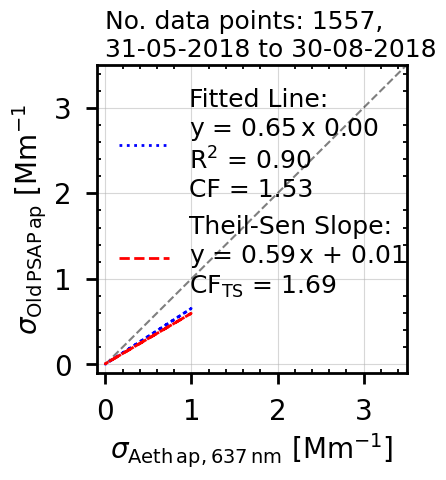

              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.534084  1.584084  0.65    0.63  0.92   1840
2015-05-31  2.012768  2.250534  0.50    0.44  0.96   1708
2015-08-31  2.319054  2.952941  0.43    0.34  0.75   1687
2015-11-30  1.980609  2.180314  0.50    0.46  0.96   2035
2016-02-29  1.870486  2.032641  0.53    0.49  0.97   2004
2016-05-31   1.96632  2.627535  0.51    0.38  0.91   1971
2016-08-31  2.517012  2.843931  0.40    0.35  0.01   1842
2016-11-30  2.030955  2.248294  0.49    0.44  0.96   1970
2017-02-28  2.204863  2.197811  0.45    0.45  0.90   1817
2017-05-31  2.681728  3.103887  0.37    0.32  0.73   1883
2017-08-31  1.656546  1.895609  0.60    0.53  0.08   1674
2017-11-30  1.619007  1.770781  0.62    0.56  0.93   2090
2018-02-28  1.496794   1.58021  0.67    0.63  0.19   1952
2018-05-31  1.533141       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


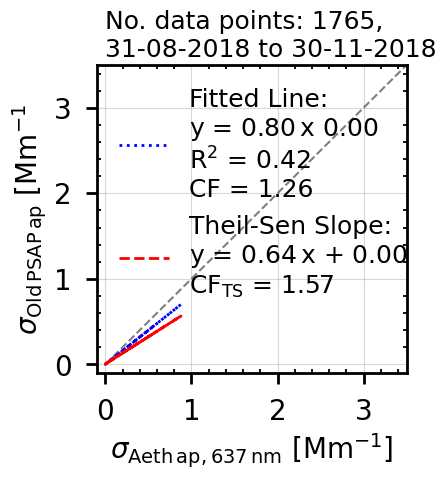

              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.534084  1.584084  0.65    0.63  0.92   1840
2015-05-31  2.012768  2.250534  0.50    0.44  0.96   1708
2015-08-31  2.319054  2.952941  0.43    0.34  0.75   1687
2015-11-30  1.980609  2.180314  0.50    0.46  0.96   2035
2016-02-29  1.870486  2.032641  0.53    0.49  0.97   2004
2016-05-31   1.96632  2.627535  0.51    0.38  0.91   1971
2016-08-31  2.517012  2.843931  0.40    0.35  0.01   1842
2016-11-30  2.030955  2.248294  0.49    0.44  0.96   1970
2017-02-28  2.204863  2.197811  0.45    0.45  0.90   1817
2017-05-31  2.681728  3.103887  0.37    0.32  0.73   1883
2017-08-31  1.656546  1.895609  0.60    0.53  0.08   1674
2017-11-30  1.619007  1.770781  0.62    0.56  0.93   2090
2018-02-28  1.496794   1.58021  0.67    0.63  0.19   1952
2018-05-31  1.533141  1.692771  0.65    0.59  0.90   1557
2018-08-31  1.255404       NaN   NaN     NaN   NaN    NaN
              

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


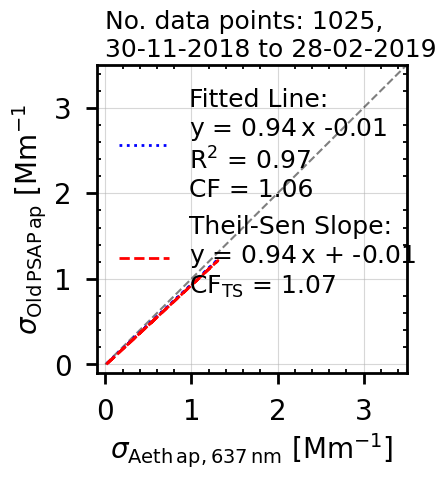

              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.534084  1.584084  0.65    0.63  0.92   1840
2015-05-31  2.012768  2.250534  0.50    0.44  0.96   1708
2015-08-31  2.319054  2.952941  0.43    0.34  0.75   1687
2015-11-30  1.980609  2.180314  0.50    0.46  0.96   2035
2016-02-29  1.870486  2.032641  0.53    0.49  0.97   2004
2016-05-31   1.96632  2.627535  0.51    0.38  0.91   1971
2016-08-31  2.517012  2.843931  0.40    0.35  0.01   1842
2016-11-30  2.030955  2.248294  0.49    0.44  0.96   1970
2017-02-28  2.204863  2.197811  0.45    0.45  0.90   1817
2017-05-31  2.681728  3.103887  0.37    0.32  0.73   1883
2017-08-31  1.656546  1.895609  0.60    0.53  0.08   1674
2017-11-30  1.619007  1.770781  0.62    0.56  0.93   2090
2018-02-28  1.496794   1.58021  0.67    0.63  0.19   1952
2018-05-31  1.533141  1.692771  0.65    0.59  0.90   1557
2018-08-31  1.255404  1.565702  0.80    0.64  0.42   1765
2018-11-30  1.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


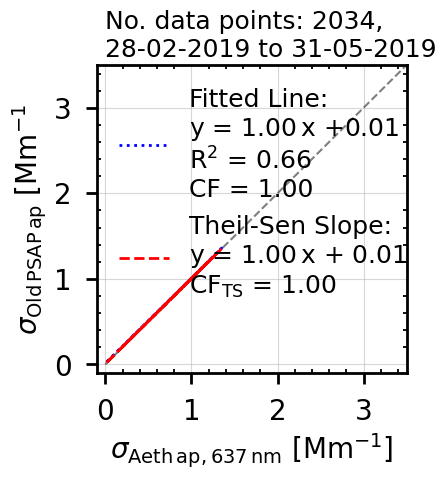

              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.534084  1.584084  0.65    0.63  0.92   1840
2015-05-31  2.012768  2.250534  0.50    0.44  0.96   1708
2015-08-31  2.319054  2.952941  0.43    0.34  0.75   1687
2015-11-30  1.980609  2.180314  0.50    0.46  0.96   2035
2016-02-29  1.870486  2.032641  0.53    0.49  0.97   2004
2016-05-31   1.96632  2.627535  0.51    0.38  0.91   1971
2016-08-31  2.517012  2.843931  0.40    0.35  0.01   1842
2016-11-30  2.030955  2.248294  0.49    0.44  0.96   1970
2017-02-28  2.204863  2.197811  0.45    0.45  0.90   1817
2017-05-31  2.681728  3.103887  0.37    0.32  0.73   1883
2017-08-31  1.656546  1.895609  0.60    0.53  0.08   1674
2017-11-30  1.619007  1.770781  0.62    0.56  0.93   2090
2018-02-28  1.496794   1.58021  0.67    0.63  0.19   1952
2018-05-31  1.533141  1.692771  0.65    0.59  0.90   1557
2018-08-31  1.255404  1.565702  0.80    0.64  0.42   1765
2018-11-30  1.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


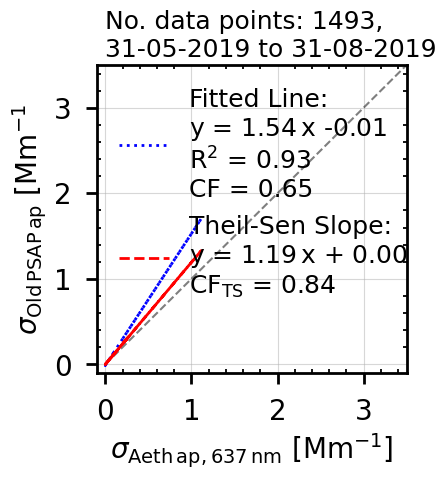

              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.534084  1.584084  0.65    0.63  0.92   1840
2015-05-31  2.012768  2.250534  0.50    0.44  0.96   1708
2015-08-31  2.319054  2.952941  0.43    0.34  0.75   1687
2015-11-30  1.980609  2.180314  0.50    0.46  0.96   2035
2016-02-29  1.870486  2.032641  0.53    0.49  0.97   2004
2016-05-31   1.96632  2.627535  0.51    0.38  0.91   1971
2016-08-31  2.517012  2.843931  0.40    0.35  0.01   1842
2016-11-30  2.030955  2.248294  0.49    0.44  0.96   1970
2017-02-28  2.204863  2.197811  0.45    0.45  0.90   1817
2017-05-31  2.681728  3.103887  0.37    0.32  0.73   1883
2017-08-31  1.656546  1.895609  0.60    0.53  0.08   1674
2017-11-30  1.619007  1.770781  0.62    0.56  0.93   2090
2018-02-28  1.496794   1.58021  0.67    0.63  0.19   1952
2018-05-31  1.533141  1.692771  0.65    0.59  0.90   1557
2018-08-31  1.255404  1.565702  0.80    0.64  0.42   1765
2018-11-30  1.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


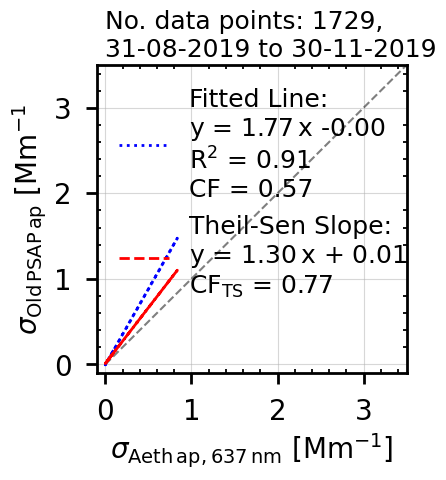

              cf_LMS     cf_TS  coef coef_ts    R2 length
2014-11-30  1.433177  1.469212  0.70    0.68  0.89   1763
2015-02-28  1.534084  1.584084  0.65    0.63  0.92   1840
2015-05-31  2.012768  2.250534  0.50    0.44  0.96   1708
2015-08-31  2.319054  2.952941  0.43    0.34  0.75   1687
2015-11-30  1.980609  2.180314  0.50    0.46  0.96   2035
2016-02-29  1.870486  2.032641  0.53    0.49  0.97   2004
2016-05-31   1.96632  2.627535  0.51    0.38  0.91   1971
2016-08-31  2.517012  2.843931  0.40    0.35  0.01   1842
2016-11-30  2.030955  2.248294  0.49    0.44  0.96   1970
2017-02-28  2.204863  2.197811  0.45    0.45  0.90   1817
2017-05-31  2.681728  3.103887  0.37    0.32  0.73   1883
2017-08-31  1.656546  1.895609  0.60    0.53  0.08   1674
2017-11-30  1.619007  1.770781  0.62    0.56  0.93   2090
2018-02-28  1.496794   1.58021  0.67    0.63  0.19   1952
2018-05-31  1.533141  1.692771  0.65    0.59  0.90   1557
2018-08-31  1.255404  1.565702  0.80    0.64  0.42   1765
2018-11-30  1.

In [36]:
df_stats_table_aeth_maap = produce_table(df_merged_maapaeth, x_var='aeth637', y_var='absorption')

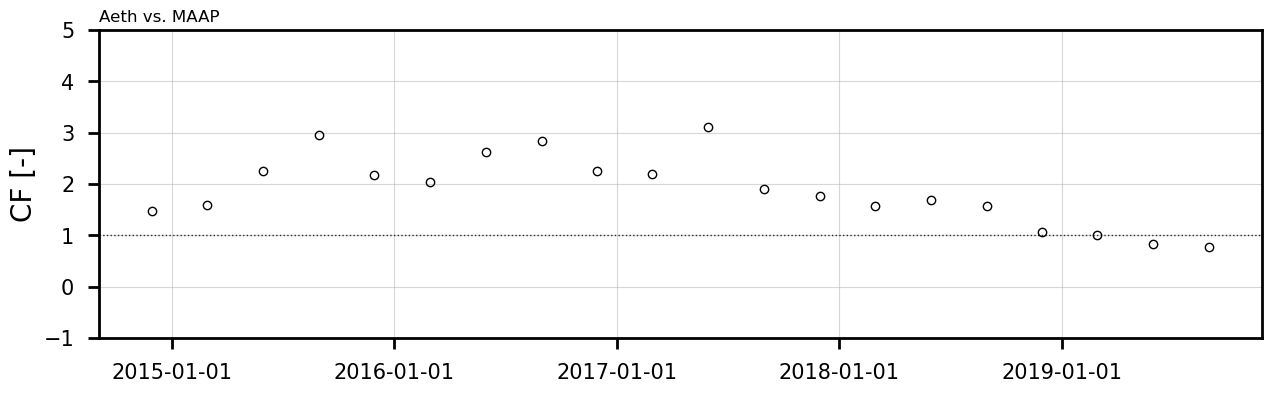

In [37]:
fig = quick_plot(df_stats_table_aeth_maap, 'Aeth vs. MAAP')

In [38]:
name='aeth_comparison'
if use_corrected_values == True:
    name='aeth_comparison_CF'

# Concat: 

In [39]:
def generate_list01(digit1=0, digit2=1, length = 7):
    import math
    # initializing the length and list    
    result = [None] * length
    _1s_count = math.ceil(length / 2)
    _2s_count = length - _1s_count
    # adding 0s and 1s
    result[::2] = [digit1] * _1s_count
    result[1::2] = [digit2] * _2s_count
    return result

In [40]:
ylist = generate_list01(digit1=0, digit2=1, length = 7)
print(ylist)

[0, 1, 0, 1, 0, 1, 0]


In [41]:
df_stats_table_aeth_EBAS['data'] = 'EBAS'
df_stats_table_aeth_oldpsap['data'] = 'Manual_PSAP'
df_stats_table_aeth_newpsap['data'] = 'Automatic_PSAP'
df_stats_table_aeth_maap['data'] = 'MAAP'

frames = [df_stats_table_aeth_EBAS, df_stats_table_aeth_oldpsap, df_stats_table_aeth_newpsap, df_stats_table_aeth_maap]
df_stats = pd.concat(frames)

In [42]:
df_stats_table_aeth_newpsap.head(2)

cf_LMS     cf_TS  coef coef_ts    R2 length            data
2012-11-30  1.122066  1.080818  0.89    0.93  0.53   1209  Automatic_PSAP
2013-02-28  1.232087  1.380259  0.81    0.72  0.39   1959  Automatic_PSAP

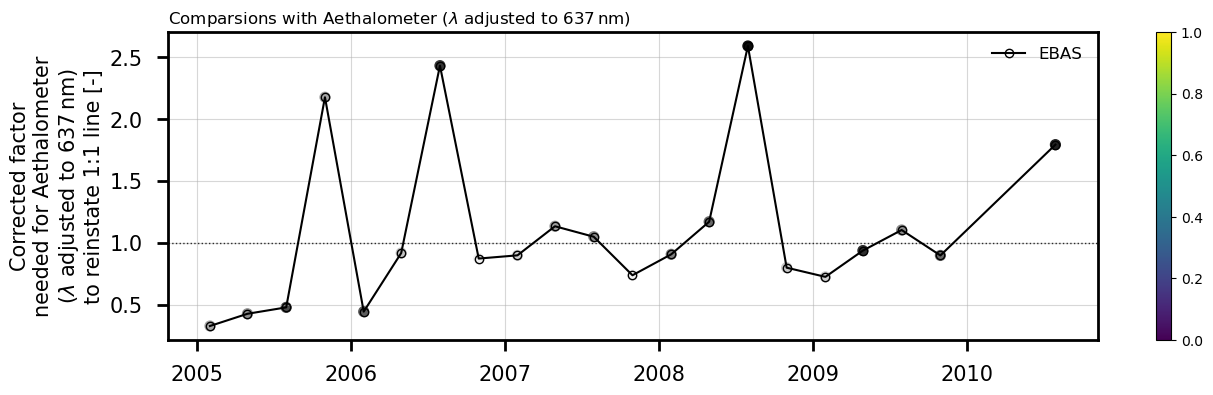

In [43]:
fig, ax = plt.subplots(figsize=(15, 4))

df_stats = df_stats[df_stats['length'] > 50]
dict_df_to_colors = {'EBAS':'k', 'Manual_PSAP':'b', 'Automatic_PSAP':'r', 'MAAP':'g'}

for df_stats_table in frames[:1]:
    data = df_stats_table['data'].values[0]
    df_stats_table.index = pd.to_datetime(df_stats_table.index)
    
    scat = ax.scatter(x=df_stats_table.index, y=df_stats_table['cf_TS'], c=df_stats_table['R2'], 
                      cmap=plt.get_cmap('gray_r'), vmin=float(df_stats_table['R2'].min()), 
                      vmax=float(df_stats_table['R2'].max()), s=50)
    
    ax.plot(df_stats_table.index, df_stats_table['cf_TS'], 'o', mec=dict_df_to_colors[data], 
        mfc='none', label=str(data).replace('_',' '), ls='-', c=dict_df_to_colors[data], 
        )
    
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())  
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y')) 
    ax.axhline(y=1, ls=':', c='k', alpha=.8, lw=1)
    ax.set_ylabel('Corrected factor\nneeded for Aethalometer\n($\lambda$ adjusted to 637$\,$nm)\nto reinstate 1:1 line [-]', fontsize=15)   
    ax.set_title('',loc='left')
    fancy(ax, fontsize=15)
    #ax.set_ylim(-1,3.2)
    ax.legend(frameon=False, fontsize=12, loc=1)
    
for df_stats_table in frames:
    data = df_stats_table['data'].values[0]
    if data == 'EBAS':
        ymax = 3.5; ymin = -2
    if data == 'Manual_PSAP':
        ymax = 6; ymin = -3.5
    if data == 'Automatic_PSAP':
        ymax = 3; ymin = -2
    if data == 'MAAP':
        ymax = 5; ymin = -3.5
        
    y = generate_list01(digit1=0, digit2=-0.25, length = len(df_stats_table['cf_TS'].values)) #len(df_stats['cf_TS'].values)*[0]
    z = df_stats_table.index
    n = df_stats_table['length'].values
    a = np.empty((len(y),))
    a[::2] = ymax
    a[1::2] = ymin
    for i, txt in enumerate(n):
        ax.annotate(txt, (z[i], a[i]), fontsize=7, ha='center', color=dict_df_to_colors[data])
        
plt.colorbar(scat)
plt.title('Comparsions with Aethalometer ($\lambda$ adjusted to 637$\,$nm)', loc='left')
plt.show()

# Figure S3: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


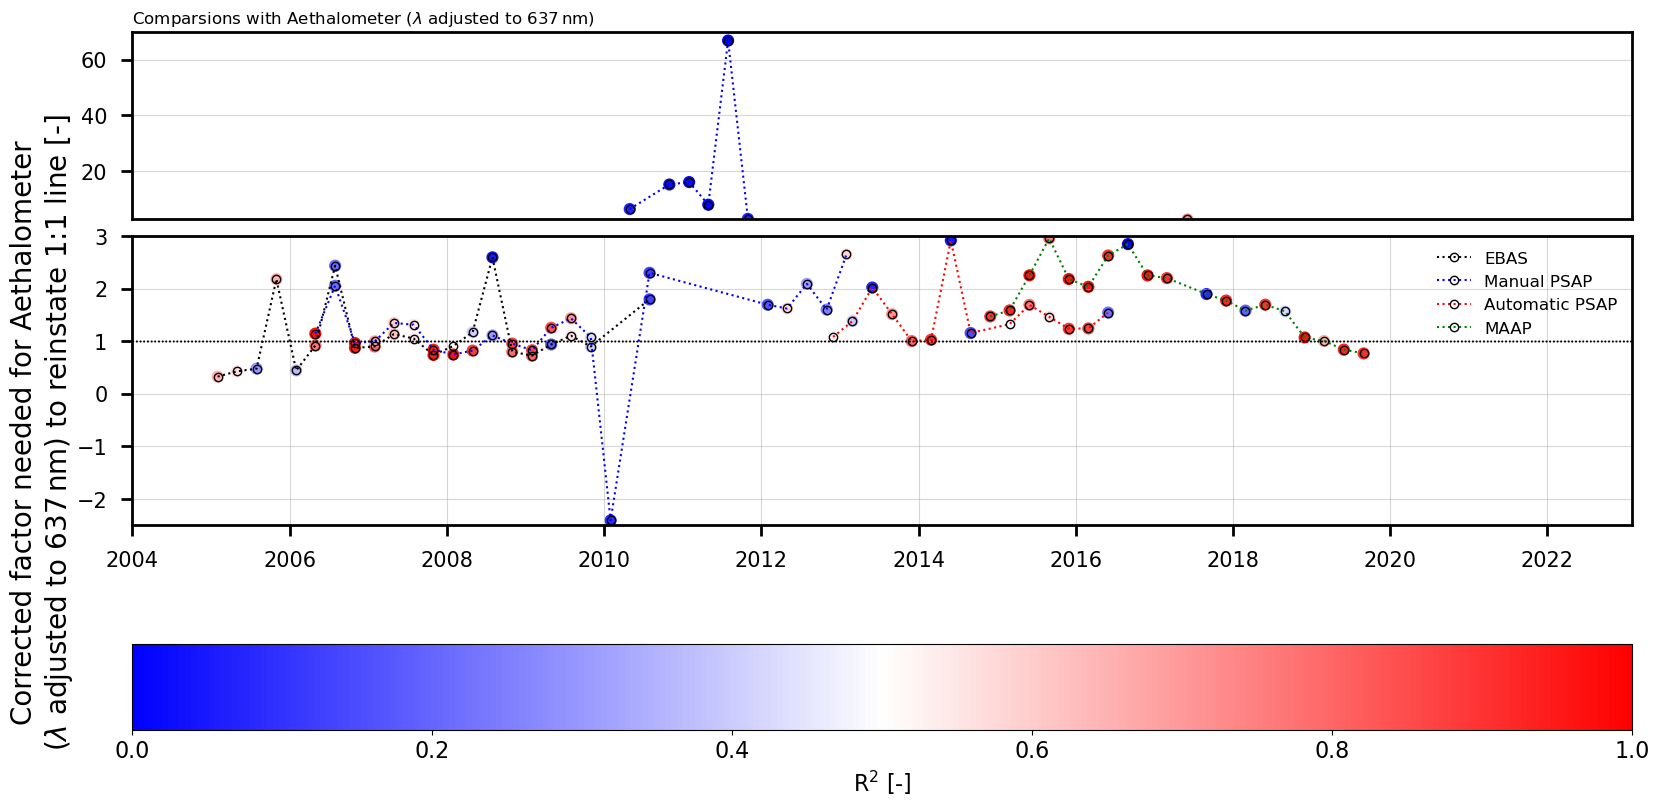

make folder
saved as: C:\Users\DominicHeslinRees\Documents\ACP_2023\plots\\FigureS3.png


In [44]:
def plot_ax(df_stats_table, cmap='Reds', ymin=None, ymax=None, display_label=True, ax=None):
    data = df_stats_table['data'].values[0]
    df_stats_table.index = pd.to_datetime(df_stats_table.index)   

    c=df_stats_table['R2'].values
    c=[float(x) for x in c]

    label=''
    if display_label == True:
        label=str(data).replace('_',' ')
    
    ax.plot(df_stats_table.index, df_stats_table['cf_TS'], 'o', mec='k', 
    mfc='none', label=label, ls=':', c=dict_df_to_colors[data], 
    )  

    scat = ax.scatter(x=df_stats_table.index, y=df_stats_table['cf_TS'], c=c, 
                      cmap=plt.get_cmap(cmap), vmin=0, 
                      vmax=1, s=60)  

    ax.xaxis.set_major_locator(mdates.AutoDateLocator())  
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y')) 
    ax.axhline(y=1, ls=':', c='k', alpha=.8, lw=1)
       
    ax.set_title('',loc='left')
    fancy(ax, fontsize=15)
    ax.set_ylim(ymin,ymax)
    ax.legend(frameon=False, fontsize=12, loc=1)
    ax.set_xlim(pd.to_datetime('2004-01-01 00:00:00'), pd.to_datetime('2023-01-31 00:00:00'))
    return scat


def annotate_plot(frames, ax=None):
    for df_stats_table in frames:
        df_stats_table = df_stats_table[df_stats_table['cf_TS'] < threshold].copy()
        data = df_stats_table['data'].values[0]
        if data == 'EBAS':
            ymax = 3.5; ymin = -2
        if data == 'Manual_PSAP':
            ymax = 6; ymin = -3.5
        if data == 'Automatic_PSAP':
            ymax = 3; ymin = -2
        if data == 'MAAP':
            ymax = 5; ymin = -3.5

        y = generate_list01(digit1=0, digit2=-0.25, length = len(df_stats_table['cf_TS'].values)) #len(df_stats['cf_TS'].values)*[0]
        z = df_stats_table.index
        n = df_stats_table['length'].values
        a = np.empty((len(y),))
        a[::2] = ymax
        a[1::2] = ymin
        for i, txt in enumerate(n):
            ax.annotate(txt, (z[i], a[i]), fontsize=7, ha='center', color=dict_df_to_colors[data])
  

fig = plt.figure(figsize=(15, 8))

dict_df_to_colors = {'EBAS':'k', 'Manual_PSAP':'b', 'Automatic_PSAP':'r', 'MAAP':'g'}

gs = gridspec.GridSpec(ncols=1, nrows=8, hspace = 0.2, wspace = 0.2, top = 1,
                               bottom = 0, left = 0, right = 1)

ax1 = fig.add_subplot(gs[0:2, 0])
df_stats = df_stats[df_stats['length'] > 50]

threshold = 3

if len(frames[0][frames[0]['cf_TS'] > threshold]) > 0:
    scat1 = plot_ax(frames[0][frames[0]['cf_TS'] > threshold], cmap='bwr', ymin=threshold, ymax=70,
                    display_label=False, ax=ax1)
if len(frames[1][frames[1]['cf_TS'] > threshold]) > 0:
    scat2 = plot_ax(frames[1][frames[1]['cf_TS'] > threshold], cmap='bwr', ymin=threshold, ymax=70, 
                    display_label=False, ax=ax1)
if len(frames[2][frames[2]['cf_TS'] > threshold]) > 0:
    scat3 = plot_ax(frames[2][frames[2]['cf_TS'] > threshold], cmap='bwr', ymin=threshold, ymax=70, 
                    display_label=False, ax=ax1)
if len(frames[3][frames[3]['cf_TS'] > threshold]) > 0:
    scat3 = plot_ax(frames[3][frames[3]['cf_TS'] > threshold], cmap='bwr', ymin=threshold, ymax=70, 
                    display_label=False, ax=ax1)
ax1.set_xticks([])
    
ax2 = fig.add_subplot(gs[2:5, 0])

scat1 = plot_ax(frames[0][frames[0]['cf_TS'] < threshold], cmap='bwr', ymin=-2.5, ymax=threshold, 
                ax=ax2)
scat2 = plot_ax(frames[1][frames[1]['cf_TS'] < threshold], cmap='bwr', ymin=-2.5, ymax=threshold, 
                ax=ax2)
scat3 = plot_ax(frames[2][frames[2]['cf_TS'] < threshold], cmap='bwr', ymin=-2.5, ymax=threshold, 
                ax=ax2)
scat3 = plot_ax(frames[3][frames[3]['cf_TS'] < threshold], cmap='bwr', ymin=-2.5, ymax=threshold, 
                ax=ax2)

cax = fig.add_subplot(gs[6:7, 0])
cbar = fig.colorbar(scat3, cax=cax, orientation="horizontal", fraction=0.7)
cbar.set_label(r'R$^{2}$ [-]', fontsize=16)
cbar.ax.tick_params(labelsize=16)

ax1.set_title('Comparsions with Aethalometer ($\lambda$ adjusted to 637$\,$nm)', loc='left')

ylabel = 'Corrected factor needed for Aethalometer\n($\lambda$ adjusted to 637$\,$nm) to reinstate 1:1 line [-]'
fig.text(-0.06, 0.5, ylabel, ha='center', va='center', rotation='vertical', fontsize=20)


plt.show()

fu_cf_abs.save_plot(fig, path=savepathplots, name='FigureS3', formate='.png', dpi=300)

# Our Zeppelin data:

In [45]:
df_merged_newpsap_maap = fu_cf_abs.mergedfs(df_MAAP, df_newpsap637_hourly) #merge 

absorption
abs637 mean
2014-11-30 00:00:00
2151
2015-02-28 00:00:00
2130
2015-05-31 00:00:00
2091
2015-08-31 00:00:00
1848
2015-11-30 00:00:00
2158
2016-02-29 00:00:00
2061
2016-05-31 00:00:00
2113
2014-11-30 00:00:00


C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


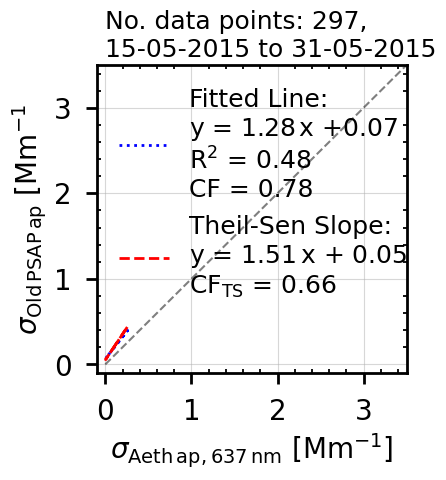

              cf_LMS cf_TS coef coef_ts   R2 length
2015-02-28  0.781311   NaN  NaN     NaN  NaN    NaN
              cf_LMS     cf_TS coef coef_ts   R2 length
2015-02-28  0.781311  0.661963  NaN     NaN  NaN    NaN
              cf_LMS     cf_TS  coef coef_ts   R2 length
2015-02-28  0.781311  0.661963  1.28     NaN  NaN    NaN
              cf_LMS     cf_TS  coef coef_ts   R2 length
2015-02-28  0.781311  0.661963  1.28    1.51  NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2015-02-28  0.781311  0.661963  1.28    1.51  0.48    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2015-02-28  0.781311  0.661963  1.28    1.51  0.48    297


C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


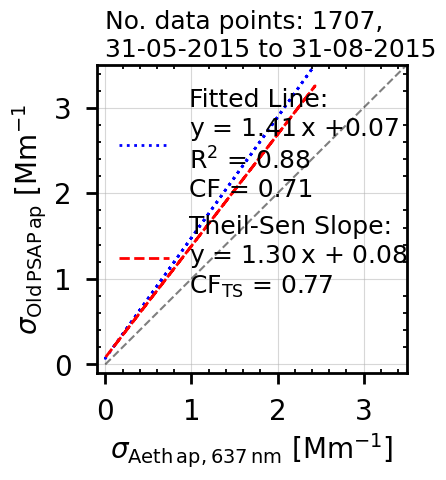

              cf_LMS     cf_TS  coef coef_ts    R2 length
2015-02-28  0.781311  0.661963  1.28    1.51  0.48    297
2015-05-31   0.70908       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2015-02-28  0.781311  0.661963  1.28    1.51  0.48    297
2015-05-31   0.70908  0.767123   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2015-02-28  0.781311  0.661963  1.28    1.51  0.48    297
2015-05-31   0.70908  0.767123  1.41     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2015-02-28  0.781311  0.661963  1.28    1.51  0.48    297
2015-05-31   0.70908  0.767123  1.41    1.30   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2015-02-28  0.781311  0.661963  1.28    1.51  0.48    297
2015-05-31   0.70908  0.767123  1.41    1.30  0.88    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2015-02-28  0.781311  0.661963  1.28    1.51  0.48    297
2015-05-31   0

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


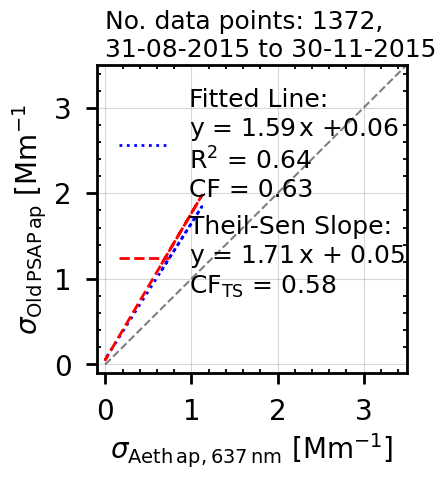

              cf_LMS     cf_TS  coef coef_ts    R2 length
2015-02-28  0.781311  0.661963  1.28    1.51  0.48    297
2015-05-31   0.70908  0.767123  1.41    1.30  0.88   1707
2015-08-31  0.629386       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2015-02-28  0.781311  0.661963  1.28    1.51  0.48    297
2015-05-31   0.70908  0.767123  1.41    1.30  0.88   1707
2015-08-31  0.629386  0.583446   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2015-02-28  0.781311  0.661963  1.28    1.51  0.48    297
2015-05-31   0.70908  0.767123  1.41    1.30  0.88   1707
2015-08-31  0.629386  0.583446  1.59     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2015-02-28  0.781311  0.661963  1.28    1.51  0.48    297
2015-05-31   0.70908  0.767123  1.41    1.30  0.88   1707
2015-08-31  0.629386  0.583446  1.59    1.71   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2015-02-28  0.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


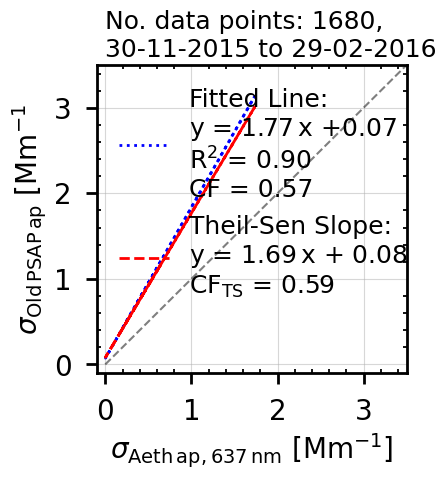

              cf_LMS     cf_TS  coef coef_ts    R2 length
2015-02-28  0.781311  0.661963  1.28    1.51  0.48    297
2015-05-31   0.70908  0.767123  1.41    1.30  0.88   1707
2015-08-31  0.629386  0.583446  1.59    1.71  0.64   1372
2015-11-30  0.566313       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2015-02-28  0.781311  0.661963  1.28    1.51  0.48    297
2015-05-31   0.70908  0.767123  1.41    1.30  0.88   1707
2015-08-31  0.629386  0.583446  1.59    1.71  0.64   1372
2015-11-30  0.566313  0.592291   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2015-02-28  0.781311  0.661963  1.28    1.51  0.48    297
2015-05-31   0.70908  0.767123  1.41    1.30  0.88   1707
2015-08-31  0.629386  0.583446  1.59    1.71  0.64   1372
2015-11-30  0.566313  0.592291  1.77     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2015-02-28  0.781311  0.661963  1.28    1.51  0.48    297
2015-05-31   0

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


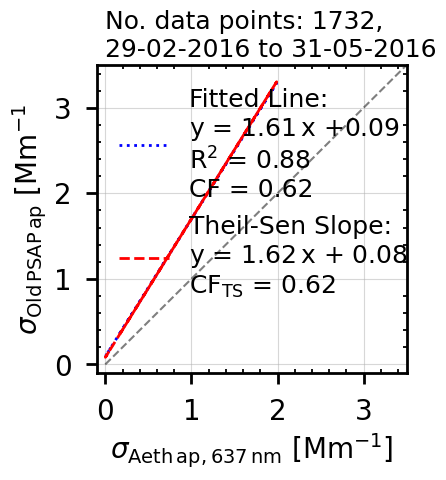

              cf_LMS     cf_TS  coef coef_ts    R2 length
2015-02-28  0.781311  0.661963  1.28    1.51  0.48    297
2015-05-31   0.70908  0.767123  1.41    1.30  0.88   1707
2015-08-31  0.629386  0.583446  1.59    1.71  0.64   1372
2015-11-30  0.566313  0.592291  1.77    1.69  0.90   1680
2016-02-29  0.622564       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2015-02-28  0.781311  0.661963  1.28    1.51  0.48    297
2015-05-31   0.70908  0.767123  1.41    1.30  0.88   1707
2015-08-31  0.629386  0.583446  1.59    1.71  0.64   1372
2015-11-30  0.566313  0.592291  1.77    1.69  0.90   1680
2016-02-29  0.622564  0.617536   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2015-02-28  0.781311  0.661963  1.28    1.51  0.48    297
2015-05-31   0.70908  0.767123  1.41    1.30  0.88   1707
2015-08-31  0.629386  0.583446  1.59    1.71  0.64   1372
2015-11-30  0.566313  0.592291  1.77    1.69  0.90   1680
2016-02-29  0.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


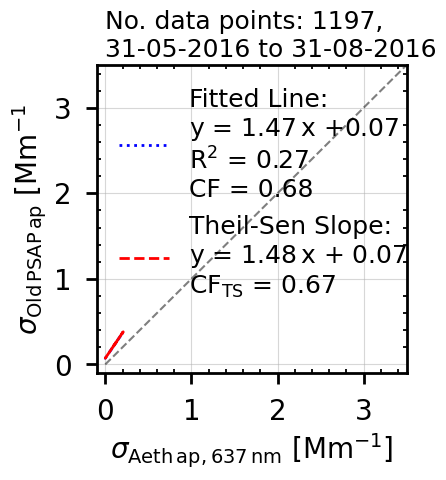

              cf_LMS     cf_TS  coef coef_ts    R2 length
2015-02-28  0.781311  0.661963  1.28    1.51  0.48    297
2015-05-31   0.70908  0.767123  1.41    1.30  0.88   1707
2015-08-31  0.629386  0.583446  1.59    1.71  0.64   1372
2015-11-30  0.566313  0.592291  1.77    1.69  0.90   1680
2016-02-29  0.622564  0.617536  1.61    1.62  0.88   1732
2016-05-31  0.678783       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2015-02-28  0.781311  0.661963  1.28    1.51  0.48    297
2015-05-31   0.70908  0.767123  1.41    1.30  0.88   1707
2015-08-31  0.629386  0.583446  1.59    1.71  0.64   1372
2015-11-30  0.566313  0.592291  1.77    1.69  0.90   1680
2016-02-29  0.622564  0.617536  1.61    1.62  0.88   1732
2016-05-31  0.678783  0.673906   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2015-02-28  0.781311  0.661963  1.28    1.51  0.48    297
2015-05-31   0.70908  0.767123  1.41    1.30  0.88   1707
2015-08-31  0.

In [46]:
df_stats_table_newpsap_maap = produce_table(df_merged_newpsap_maap, x_var='absorption', y_var='abs637 mean')

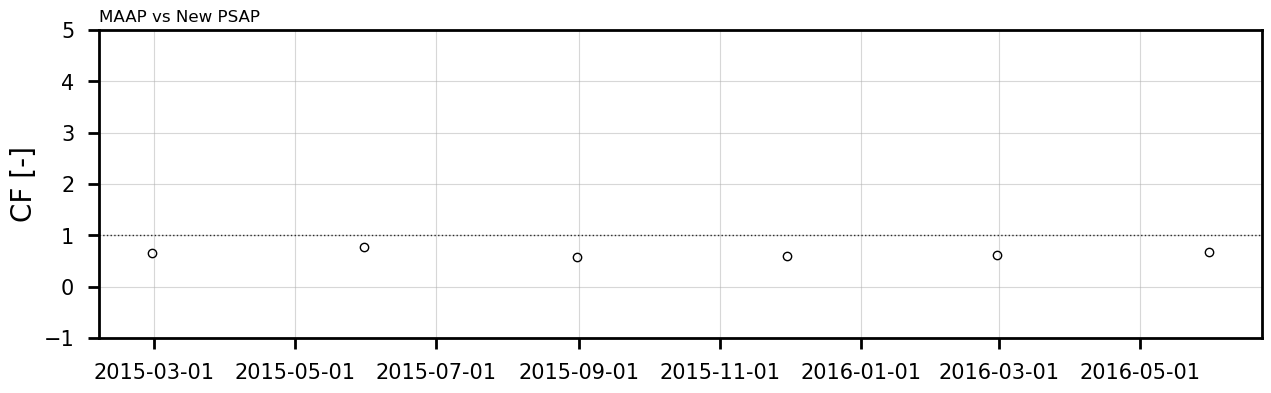

In [47]:
fig = quick_plot(df_stats_table_newpsap_maap, 'MAAP vs New PSAP')

## old vs new: 

In [48]:
df_merged_newpsap_oldpsap = fu_cf_abs.mergedfs(df_newpsap637_hourly, df_oldpsap637_hourly)

In [49]:
df_merged_newpsap_oldpsap.head(2)

abs637 mean_x  abs637 median_x  abs637 std_x  \
2012-11-19 16:00:00       0.145224         0.126133      0.053759   
2012-11-19 17:00:00       0.145256         0.147447      0.013402   

                     abs637 var_x  abs637 mean_y  abs637 median_y  \
2012-11-19 16:00:00       0.00289        0.11845         0.073753   
2012-11-19 17:00:00       0.00018        0.09355         0.092184   

                     abs637 std_y  abs637 var_y  
2012-11-19 16:00:00      0.263173      0.069260  
2012-11-19 17:00:00      0.042162      0.001778

abs637 mean_x
abs637 mean_y
2012-11-30 00:00:00
2161
2013-02-28 00:00:00
2209
2013-05-31 00:00:00
2209


C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


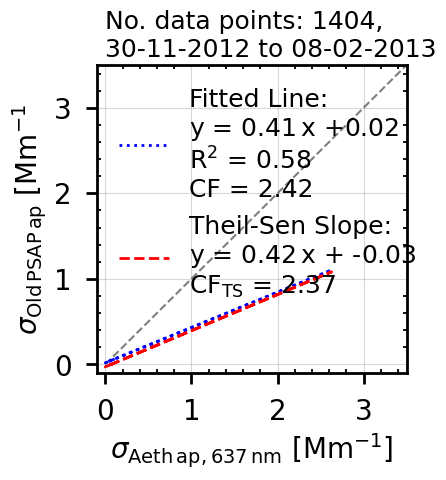

           cf_LMS cf_TS coef coef_ts   R2 length
2012-11-30  2.421   NaN  NaN     NaN  NaN    NaN
           cf_LMS     cf_TS coef coef_ts   R2 length
2012-11-30  2.421  2.365841  NaN     NaN  NaN    NaN
           cf_LMS     cf_TS  coef coef_ts   R2 length
2012-11-30  2.421  2.365841  0.41     NaN  NaN    NaN
           cf_LMS     cf_TS  coef coef_ts   R2 length
2012-11-30  2.421  2.365841  0.41    0.42  NaN    NaN
           cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  2.421  2.365841  0.41    0.42  0.58    NaN
           cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30  2.421  2.365841  0.41    0.42  0.58   1404


C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


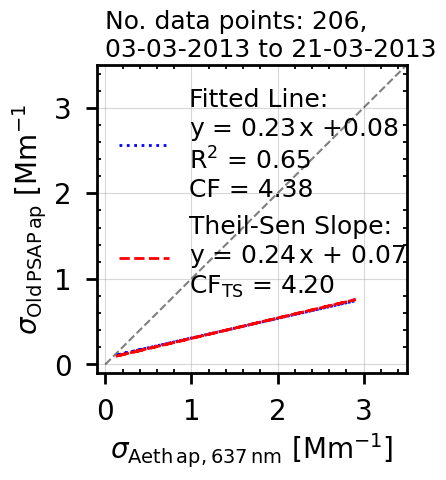

              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30     2.421  2.365841  0.41    0.42  0.58   1404
2013-02-28  4.378146       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30     2.421  2.365841  0.41    0.42  0.58   1404
2013-02-28  4.378146  4.203693   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30     2.421  2.365841  0.41    0.42  0.58   1404
2013-02-28  4.378146  4.203693  0.23     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30     2.421  2.365841  0.41    0.42  0.58   1404
2013-02-28  4.378146  4.203693  0.23    0.24   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30     2.421  2.365841  0.41    0.42  0.58   1404
2013-02-28  4.378146  4.203693  0.23    0.24  0.65    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2012-11-30     2.421  2.365841  0.41    0.42  0.58   1404
2013-02-28  4.

In [50]:
df_stats_table_newpsap_oldpsap = produce_table(df_merged_newpsap_oldpsap, x_var='abs637 mean_x', y_var='abs637 mean_y')

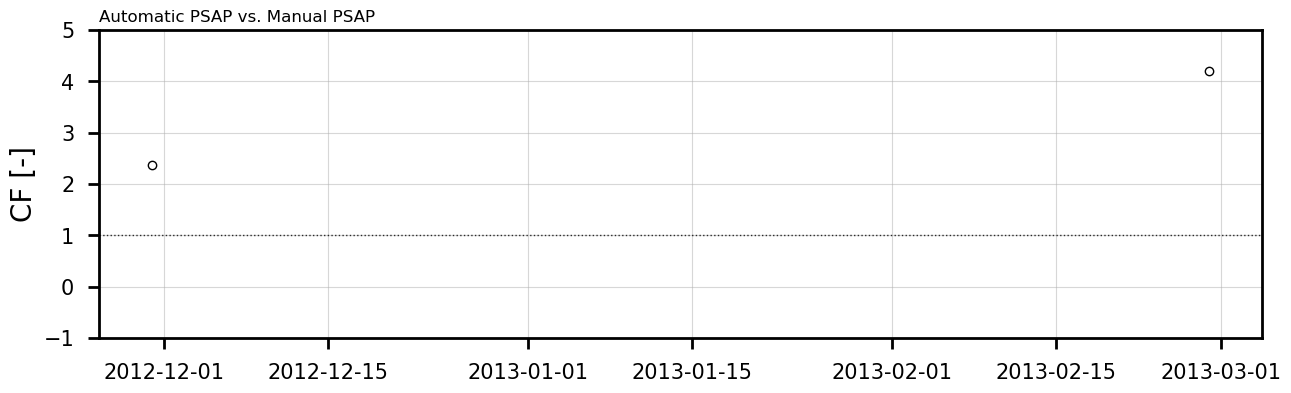

In [51]:
fig = quick_plot(df_stats_table_newpsap_oldpsap, 'Automatic PSAP vs. Manual PSAP')

In [52]:
df_merged_oldpsap_ebas = fu_cf_abs.mergedfs(df_oldpsap637_hourly, df_oldpsapEBAS637_hourly)

abs637 mean_x
abs637 mean_y
2006-04-30 00:00:00
2209
2006-07-31 00:00:00
2209
2006-10-31 00:00:00
2209
2007-01-31 00:00:00
2137
2007-04-30 00:00:00
2209
2007-07-31 00:00:00
2209
2007-10-31 00:00:00
2209
2008-01-31 00:00:00
2161
2008-04-30 00:00:00
2209
2008-07-31 00:00:00
2209
2008-10-31 00:00:00
2209
2009-01-31 00:00:00
2137
2009-04-30 00:00:00
2209
2009-07-31 00:00:00
2209
2009-10-31 00:00:00
2209
2010-01-31 00:00:00
2137
2010-04-30 00:00:00
2209
2010-07-31 00:00:00
2209


C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


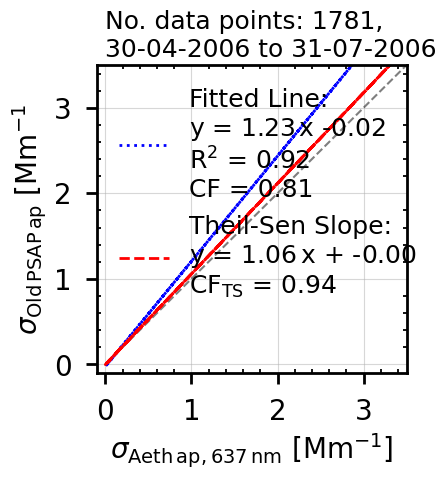

              cf_LMS cf_TS coef coef_ts   R2 length
2006-04-30  0.813108   NaN  NaN     NaN  NaN    NaN
              cf_LMS    cf_TS coef coef_ts   R2 length
2006-04-30  0.813108  0.94386  NaN     NaN  NaN    NaN
              cf_LMS    cf_TS  coef coef_ts   R2 length
2006-04-30  0.813108  0.94386  1.23     NaN  NaN    NaN
              cf_LMS    cf_TS  coef coef_ts   R2 length
2006-04-30  0.813108  0.94386  1.23    1.06  NaN    NaN
              cf_LMS    cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108  0.94386  1.23    1.06  0.92    NaN
              cf_LMS    cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108  0.94386  1.23    1.06  0.92   1781


C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


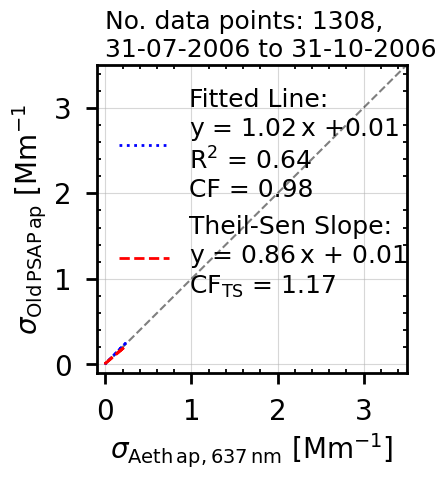

              cf_LMS    cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108  0.94386  1.23    1.06  0.92   1781
2006-07-31  0.983061      NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108   0.94386  1.23    1.06  0.92   1781
2006-07-31  0.983061  1.166042   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108   0.94386  1.23    1.06  0.92   1781
2006-07-31  0.983061  1.166042  1.02     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108   0.94386  1.23    1.06  0.92   1781
2006-07-31  0.983061  1.166042  1.02    0.86   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108   0.94386  1.23    1.06  0.92   1781
2006-07-31  0.983061  1.166042  1.02    0.86  0.64    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108   0.94386  1.23    1.06  0.92   1781
2006-07-31  0.983

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


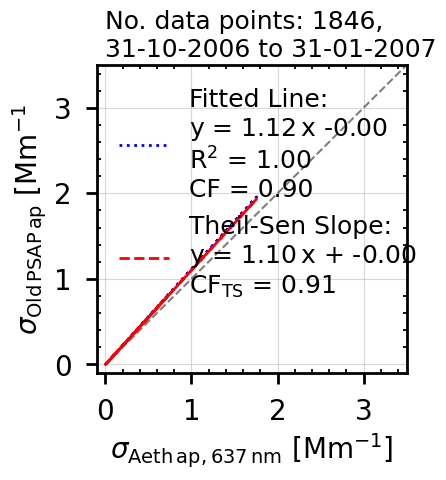

              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108   0.94386  1.23    1.06  0.92   1781
2006-07-31  0.983061  1.166042  1.02    0.86  0.64   1308
2006-10-31  0.895782       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108   0.94386  1.23    1.06  0.92   1781
2006-07-31  0.983061  1.166042  1.02    0.86  0.64   1308
2006-10-31  0.895782  0.906664   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108   0.94386  1.23    1.06  0.92   1781
2006-07-31  0.983061  1.166042  1.02    0.86  0.64   1308
2006-10-31  0.895782  0.906664  1.12     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108   0.94386  1.23    1.06  0.92   1781
2006-07-31  0.983061  1.166042  1.02    0.86  0.64   1308
2006-10-31  0.895782  0.906664  1.12    1.10   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


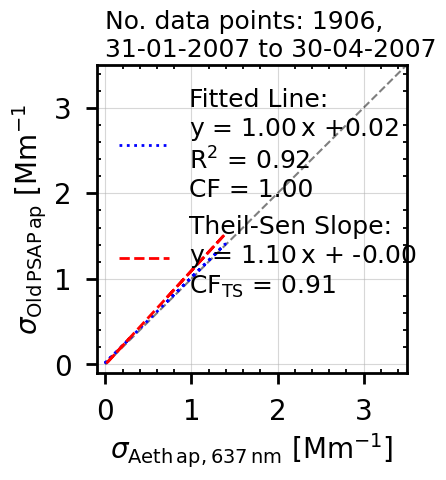

              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108   0.94386  1.23    1.06  0.92   1781
2006-07-31  0.983061  1.166042  1.02    0.86  0.64   1308
2006-10-31  0.895782  0.906664  1.12    1.10  1.00   1846
2007-01-31   1.00462       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108   0.94386  1.23    1.06  0.92   1781
2006-07-31  0.983061  1.166042  1.02    0.86  0.64   1308
2006-10-31  0.895782  0.906664  1.12    1.10  1.00   1846
2007-01-31   1.00462  0.912313   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108   0.94386  1.23    1.06  0.92   1781
2006-07-31  0.983061  1.166042  1.02    0.86  0.64   1308
2006-10-31  0.895782  0.906664  1.12    1.10  1.00   1846
2007-01-31   1.00462  0.912313  1.00     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108   0.94386  1.23    1.06  0.92   1781
2006-07-31  0.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


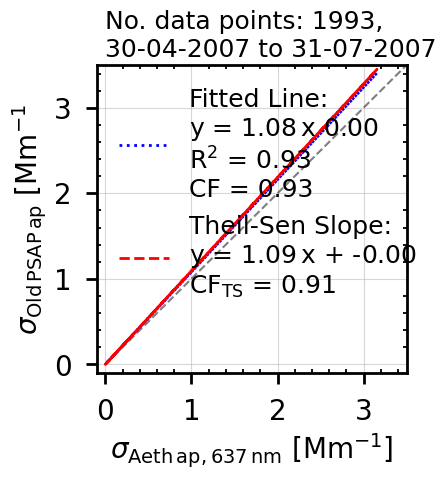

              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108   0.94386  1.23    1.06  0.92   1781
2006-07-31  0.983061  1.166042  1.02    0.86  0.64   1308
2006-10-31  0.895782  0.906664  1.12    1.10  1.00   1846
2007-01-31   1.00462  0.912313  1.00    1.10  0.92   1906
2007-04-30  0.926387       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108   0.94386  1.23    1.06  0.92   1781
2006-07-31  0.983061  1.166042  1.02    0.86  0.64   1308
2006-10-31  0.895782  0.906664  1.12    1.10  1.00   1846
2007-01-31   1.00462  0.912313  1.00    1.10  0.92   1906
2007-04-30  0.926387   0.91459   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108   0.94386  1.23    1.06  0.92   1781
2006-07-31  0.983061  1.166042  1.02    0.86  0.64   1308
2006-10-31  0.895782  0.906664  1.12    1.10  1.00   1846
2007-01-31   1.00462  0.912313  1.00    1.10  0.92   1906
2007-04-30  0.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


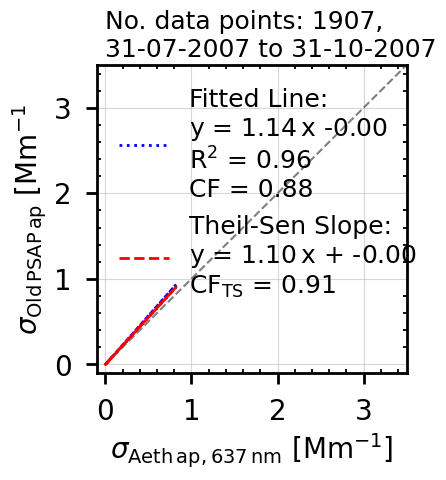

              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108   0.94386  1.23    1.06  0.92   1781
2006-07-31  0.983061  1.166042  1.02    0.86  0.64   1308
2006-10-31  0.895782  0.906664  1.12    1.10  1.00   1846
2007-01-31   1.00462  0.912313  1.00    1.10  0.92   1906
2007-04-30  0.926387   0.91459  1.08    1.09  0.93   1993
2007-07-31  0.877816       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108   0.94386  1.23    1.06  0.92   1781
2006-07-31  0.983061  1.166042  1.02    0.86  0.64   1308
2006-10-31  0.895782  0.906664  1.12    1.10  1.00   1846
2007-01-31   1.00462  0.912313  1.00    1.10  0.92   1906
2007-04-30  0.926387   0.91459  1.08    1.09  0.93   1993
2007-07-31  0.877816  0.906664   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108   0.94386  1.23    1.06  0.92   1781
2006-07-31  0.983061  1.166042  1.02    0.86  0.64   1308
2006-10-31  0.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


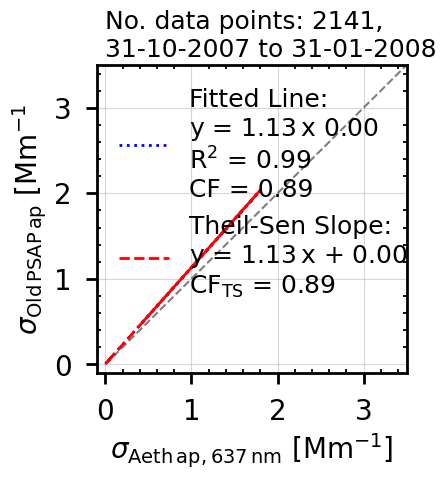

              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108   0.94386  1.23    1.06  0.92   1781
2006-07-31  0.983061  1.166042  1.02    0.86  0.64   1308
2006-10-31  0.895782  0.906664  1.12    1.10  1.00   1846
2007-01-31   1.00462  0.912313  1.00    1.10  0.92   1906
2007-04-30  0.926387   0.91459  1.08    1.09  0.93   1993
2007-07-31  0.877816  0.906664  1.14    1.10  0.96   1907
2007-10-31  0.888537       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108   0.94386  1.23    1.06  0.92   1781
2006-07-31  0.983061  1.166042  1.02    0.86  0.64   1308
2006-10-31  0.895782  0.906664  1.12    1.10  1.00   1846
2007-01-31   1.00462  0.912313  1.00    1.10  0.92   1906
2007-04-30  0.926387   0.91459  1.08    1.09  0.93   1993
2007-07-31  0.877816  0.906664  1.14    1.10  0.96   1907
2007-10-31  0.888537   0.88593   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


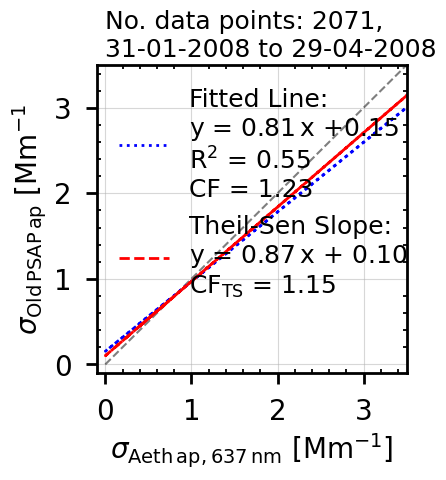

              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108   0.94386  1.23    1.06  0.92   1781
2006-07-31  0.983061  1.166042  1.02    0.86  0.64   1308
2006-10-31  0.895782  0.906664  1.12    1.10  1.00   1846
2007-01-31   1.00462  0.912313  1.00    1.10  0.92   1906
2007-04-30  0.926387   0.91459  1.08    1.09  0.93   1993
2007-07-31  0.877816  0.906664  1.14    1.10  0.96   1907
2007-10-31  0.888537   0.88593  1.13    1.13  0.99   2141
2008-01-31  1.227736       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108   0.94386  1.23    1.06  0.92   1781
2006-07-31  0.983061  1.166042  1.02    0.86  0.64   1308
2006-10-31  0.895782  0.906664  1.12    1.10  1.00   1846
2007-01-31   1.00462  0.912313  1.00    1.10  0.92   1906
2007-04-30  0.926387   0.91459  1.08    1.09  0.93   1993
2007-07-31  0.877816  0.906664  1.14    1.10  0.96   1907
2007-10-31  0.888537   0.88593  1.13    1.13  0.99   2141
2008-01-31  1.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


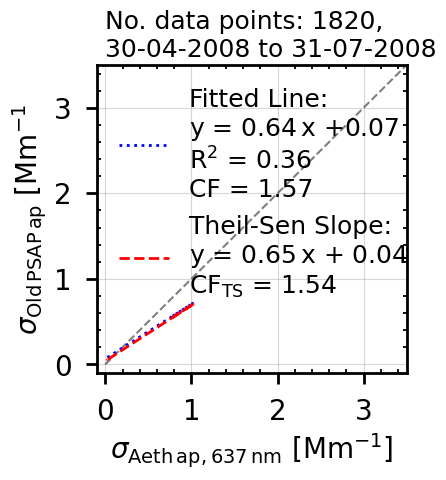

              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108   0.94386  1.23    1.06  0.92   1781
2006-07-31  0.983061  1.166042  1.02    0.86  0.64   1308
2006-10-31  0.895782  0.906664  1.12    1.10  1.00   1846
2007-01-31   1.00462  0.912313  1.00    1.10  0.92   1906
2007-04-30  0.926387   0.91459  1.08    1.09  0.93   1993
2007-07-31  0.877816  0.906664  1.14    1.10  0.96   1907
2007-10-31  0.888537   0.88593  1.13    1.13  0.99   2141
2008-01-31  1.227736   1.15051  0.81    0.87  0.55   2071
2008-04-30  1.568462       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108   0.94386  1.23    1.06  0.92   1781
2006-07-31  0.983061  1.166042  1.02    0.86  0.64   1308
2006-10-31  0.895782  0.906664  1.12    1.10  1.00   1846
2007-01-31   1.00462  0.912313  1.00    1.10  0.92   1906
2007-04-30  0.926387   0.91459  1.08    1.09  0.93   1993
2007-07-31  0.877816  0.906664  1.14    1.10  0.96   1907
2007-10-31  0.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


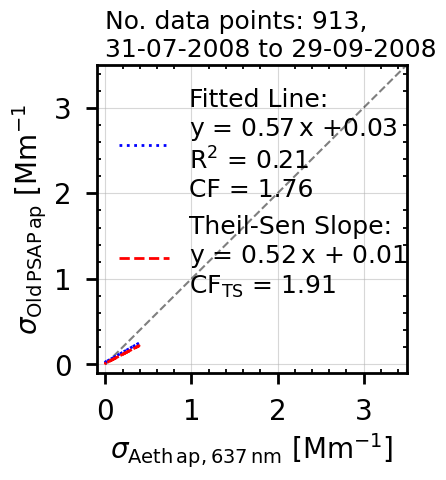

              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108   0.94386  1.23    1.06  0.92   1781
2006-07-31  0.983061  1.166042  1.02    0.86  0.64   1308
2006-10-31  0.895782  0.906664  1.12    1.10  1.00   1846
2007-01-31   1.00462  0.912313  1.00    1.10  0.92   1906
2007-04-30  0.926387   0.91459  1.08    1.09  0.93   1993
2007-07-31  0.877816  0.906664  1.14    1.10  0.96   1907
2007-10-31  0.888537   0.88593  1.13    1.13  0.99   2141
2008-01-31  1.227736   1.15051  0.81    0.87  0.55   2071
2008-04-30  1.568462  1.535504  0.64    0.65  0.36   1820
2008-07-31  1.756997       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108   0.94386  1.23    1.06  0.92   1781
2006-07-31  0.983061  1.166042  1.02    0.86  0.64   1308
2006-10-31  0.895782  0.906664  1.12    1.10  1.00   1846
2007-01-31   1.00462  0.912313  1.00    1.10  0.92   1906
2007-04-30  0.926387   0.91459  1.08    1.09  0.93   1993
2007-07-31  0.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


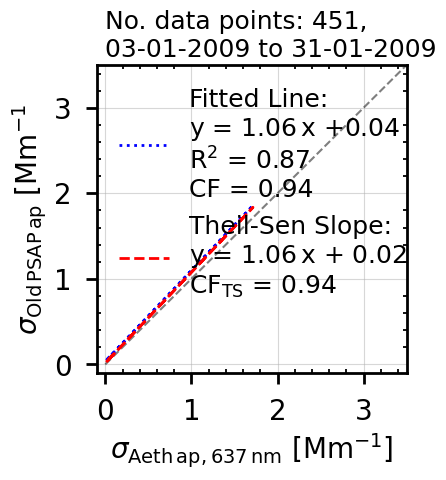

              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108   0.94386  1.23    1.06  0.92   1781
2006-07-31  0.983061  1.166042  1.02    0.86  0.64   1308
2006-10-31  0.895782  0.906664  1.12    1.10  1.00   1846
2007-01-31   1.00462  0.912313  1.00    1.10  0.92   1906
2007-04-30  0.926387   0.91459  1.08    1.09  0.93   1993
2007-07-31  0.877816  0.906664  1.14    1.10  0.96   1907
2007-10-31  0.888537   0.88593  1.13    1.13  0.99   2141
2008-01-31  1.227736   1.15051  0.81    0.87  0.55   2071
2008-04-30  1.568462  1.535504  0.64    0.65  0.36   1820
2008-07-31  1.756997  1.905624  0.57    0.52  0.21    913
2008-10-31  0.941535       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108   0.94386  1.23    1.06  0.92   1781
2006-07-31  0.983061  1.166042  1.02    0.86  0.64   1308
2006-10-31  0.895782  0.906664  1.12    1.10  1.00   1846
2007-01-31   1.00462  0.912313  1.00    1.10  0.92   1906
2007-04-30  0.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


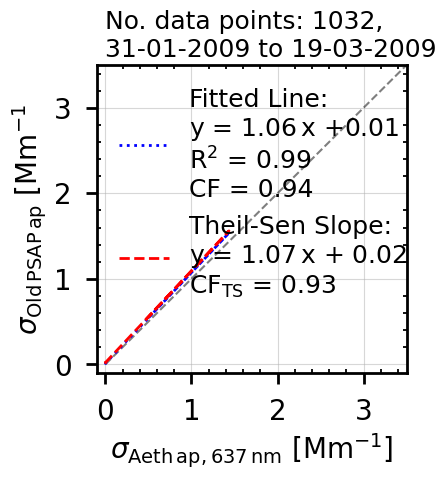

              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108   0.94386  1.23    1.06  0.92   1781
2006-07-31  0.983061  1.166042  1.02    0.86  0.64   1308
2006-10-31  0.895782  0.906664  1.12    1.10  1.00   1846
2007-01-31   1.00462  0.912313  1.00    1.10  0.92   1906
2007-04-30  0.926387   0.91459  1.08    1.09  0.93   1993
2007-07-31  0.877816  0.906664  1.14    1.10  0.96   1907
2007-10-31  0.888537   0.88593  1.13    1.13  0.99   2141
2008-01-31  1.227736   1.15051  0.81    0.87  0.55   2071
2008-04-30  1.568462  1.535504  0.64    0.65  0.36   1820
2008-07-31  1.756997  1.905624  0.57    0.52  0.21    913
2008-10-31  0.941535  0.941974  1.06    1.06  0.87    451
2009-01-31  0.941524       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108   0.94386  1.23    1.06  0.92   1781
2006-07-31  0.983061  1.166042  1.02    0.86  0.64   1308
2006-10-31  0.895782  0.906664  1.12    1.10  1.00   1846
2007-01-31   1

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


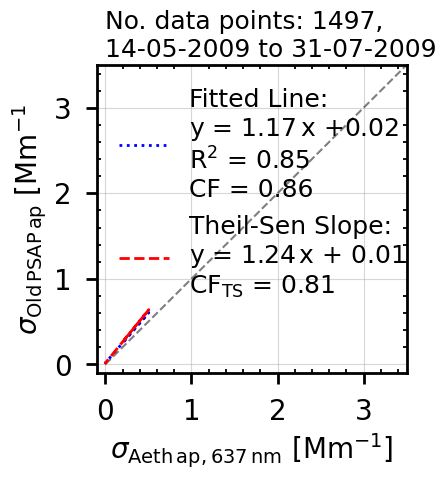

              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108   0.94386  1.23    1.06  0.92   1781
2006-07-31  0.983061  1.166042  1.02    0.86  0.64   1308
2006-10-31  0.895782  0.906664  1.12    1.10  1.00   1846
2007-01-31   1.00462  0.912313  1.00    1.10  0.92   1906
2007-04-30  0.926387   0.91459  1.08    1.09  0.93   1993
2007-07-31  0.877816  0.906664  1.14    1.10  0.96   1907
2007-10-31  0.888537   0.88593  1.13    1.13  0.99   2141
2008-01-31  1.227736   1.15051  0.81    0.87  0.55   2071
2008-04-30  1.568462  1.535504  0.64    0.65  0.36   1820
2008-07-31  1.756997  1.905624  0.57    0.52  0.21    913
2008-10-31  0.941535  0.941974  1.06    1.06  0.87    451
2009-01-31  0.941524  0.932091  1.06    1.07  0.99   1032
2009-04-30  0.856465       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108   0.94386  1.23    1.06  0.92   1781
2006-07-31  0.983061  1.166042  1.02    0.86  0.64   1308
2006-10-31  0.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


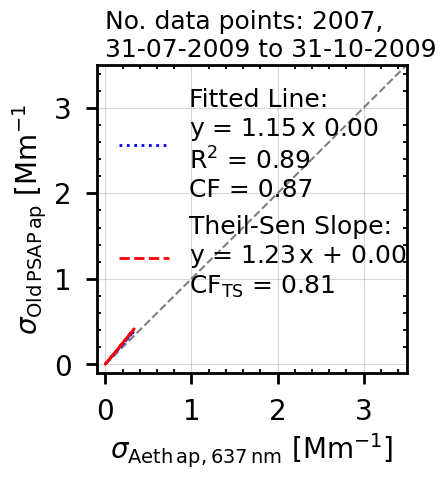

              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108   0.94386  1.23    1.06  0.92   1781
2006-07-31  0.983061  1.166042  1.02    0.86  0.64   1308
2006-10-31  0.895782  0.906664  1.12    1.10  1.00   1846
2007-01-31   1.00462  0.912313  1.00    1.10  0.92   1906
2007-04-30  0.926387   0.91459  1.08    1.09  0.93   1993
2007-07-31  0.877816  0.906664  1.14    1.10  0.96   1907
2007-10-31  0.888537   0.88593  1.13    1.13  0.99   2141
2008-01-31  1.227736   1.15051  0.81    0.87  0.55   2071
2008-04-30  1.568462  1.535504  0.64    0.65  0.36   1820
2008-07-31  1.756997  1.905624  0.57    0.52  0.21    913
2008-10-31  0.941535  0.941974  1.06    1.06  0.87    451
2009-01-31  0.941524  0.932091  1.06    1.07  0.99   1032
2009-04-30  0.856465   0.80932  1.17    1.24  0.85   1497
2009-07-31  0.867782       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108   0.94386  1.23    1.06  0.92   1781
2006-07-31  0.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


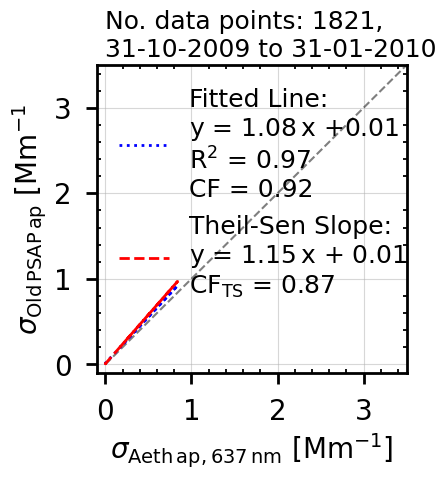

              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108   0.94386  1.23    1.06  0.92   1781
2006-07-31  0.983061  1.166042  1.02    0.86  0.64   1308
2006-10-31  0.895782  0.906664  1.12    1.10  1.00   1846
2007-01-31   1.00462  0.912313  1.00    1.10  0.92   1906
2007-04-30  0.926387   0.91459  1.08    1.09  0.93   1993
2007-07-31  0.877816  0.906664  1.14    1.10  0.96   1907
2007-10-31  0.888537   0.88593  1.13    1.13  0.99   2141
2008-01-31  1.227736   1.15051  0.81    0.87  0.55   2071
2008-04-30  1.568462  1.535504  0.64    0.65  0.36   1820
2008-07-31  1.756997  1.905624  0.57    0.52  0.21    913
2008-10-31  0.941535  0.941974  1.06    1.06  0.87    451
2009-01-31  0.941524  0.932091  1.06    1.07  0.99   1032
2009-04-30  0.856465   0.80932  1.17    1.24  0.85   1497
2009-07-31  0.867782  0.812114  1.15    1.23  0.89   2007
2009-10-31  0.924081       NaN   NaN     NaN   NaN    NaN
              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


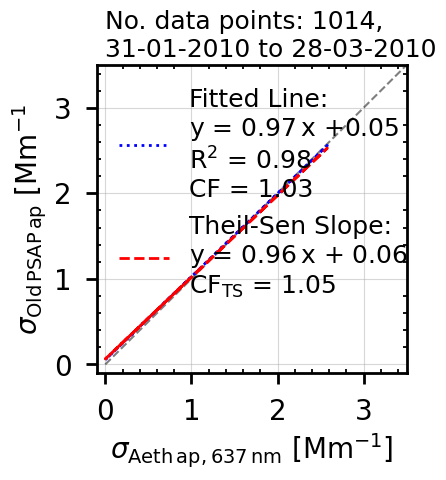

              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108   0.94386  1.23    1.06  0.92   1781
2006-07-31  0.983061  1.166042  1.02    0.86  0.64   1308
2006-10-31  0.895782  0.906664  1.12    1.10  1.00   1846
2007-01-31   1.00462  0.912313  1.00    1.10  0.92   1906
2007-04-30  0.926387   0.91459  1.08    1.09  0.93   1993
2007-07-31  0.877816  0.906664  1.14    1.10  0.96   1907
2007-10-31  0.888537   0.88593  1.13    1.13  0.99   2141
2008-01-31  1.227736   1.15051  0.81    0.87  0.55   2071
2008-04-30  1.568462  1.535504  0.64    0.65  0.36   1820
2008-07-31  1.756997  1.905624  0.57    0.52  0.21    913
2008-10-31  0.941535  0.941974  1.06    1.06  0.87    451
2009-01-31  0.941524  0.932091  1.06    1.07  0.99   1032
2009-04-30  0.856465   0.80932  1.17    1.24  0.85   1497
2009-07-31  0.867782  0.812114  1.15    1.23  0.89   2007
2009-10-31  0.924081  0.871547  1.08    1.15  0.97   1821
2010-01-31  1.029176       NaN   NaN     NaN   NaN    NaN
              

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


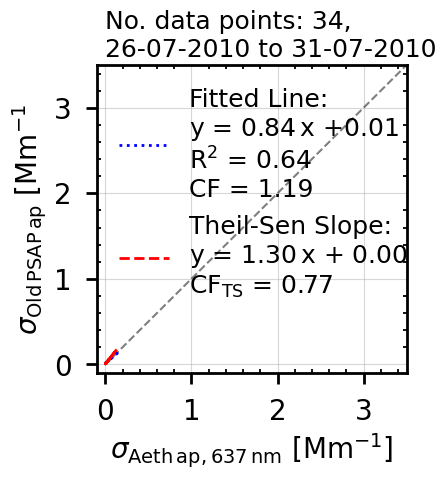

              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108   0.94386  1.23    1.06  0.92   1781
2006-07-31  0.983061  1.166042  1.02    0.86  0.64   1308
2006-10-31  0.895782  0.906664  1.12    1.10  1.00   1846
2007-01-31   1.00462  0.912313  1.00    1.10  0.92   1906
2007-04-30  0.926387   0.91459  1.08    1.09  0.93   1993
2007-07-31  0.877816  0.906664  1.14    1.10  0.96   1907
2007-10-31  0.888537   0.88593  1.13    1.13  0.99   2141
2008-01-31  1.227736   1.15051  0.81    0.87  0.55   2071
2008-04-30  1.568462  1.535504  0.64    0.65  0.36   1820
2008-07-31  1.756997  1.905624  0.57    0.52  0.21    913
2008-10-31  0.941535  0.941974  1.06    1.06  0.87    451
2009-01-31  0.941524  0.932091  1.06    1.07  0.99   1032
2009-04-30  0.856465   0.80932  1.17    1.24  0.85   1497
2009-07-31  0.867782  0.812114  1.15    1.23  0.89   2007
2009-10-31  0.924081  0.871547  1.08    1.15  0.97   1821
2010-01-31  1.029176  1.045975  0.97    0.96  0.98   1014
2010-04-30  1.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


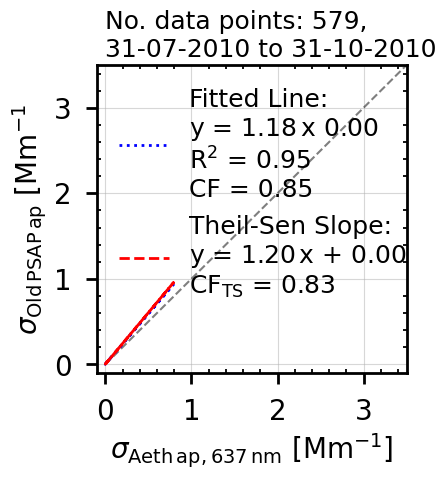

              cf_LMS     cf_TS  coef coef_ts    R2 length
2006-04-30  0.813108   0.94386  1.23    1.06  0.92   1781
2006-07-31  0.983061  1.166042  1.02    0.86  0.64   1308
2006-10-31  0.895782  0.906664  1.12    1.10  1.00   1846
2007-01-31   1.00462  0.912313  1.00    1.10  0.92   1906
2007-04-30  0.926387   0.91459  1.08    1.09  0.93   1993
2007-07-31  0.877816  0.906664  1.14    1.10  0.96   1907
2007-10-31  0.888537   0.88593  1.13    1.13  0.99   2141
2008-01-31  1.227736   1.15051  0.81    0.87  0.55   2071
2008-04-30  1.568462  1.535504  0.64    0.65  0.36   1820
2008-07-31  1.756997  1.905624  0.57    0.52  0.21    913
2008-10-31  0.941535  0.941974  1.06    1.06  0.87    451
2009-01-31  0.941524  0.932091  1.06    1.07  0.99   1032
2009-04-30  0.856465   0.80932  1.17    1.24  0.85   1497
2009-07-31  0.867782  0.812114  1.15    1.23  0.89   2007
2009-10-31  0.924081  0.871547  1.08    1.15  0.97   1821
2010-01-31  1.029176  1.045975  0.97    0.96  0.98   1014
2010-04-30  1.

In [53]:
df_stats_table_oldpsap_ebas = produce_table(df_merged_oldpsap_ebas, x_var='abs637 mean_x', y_var='abs637 mean_y')

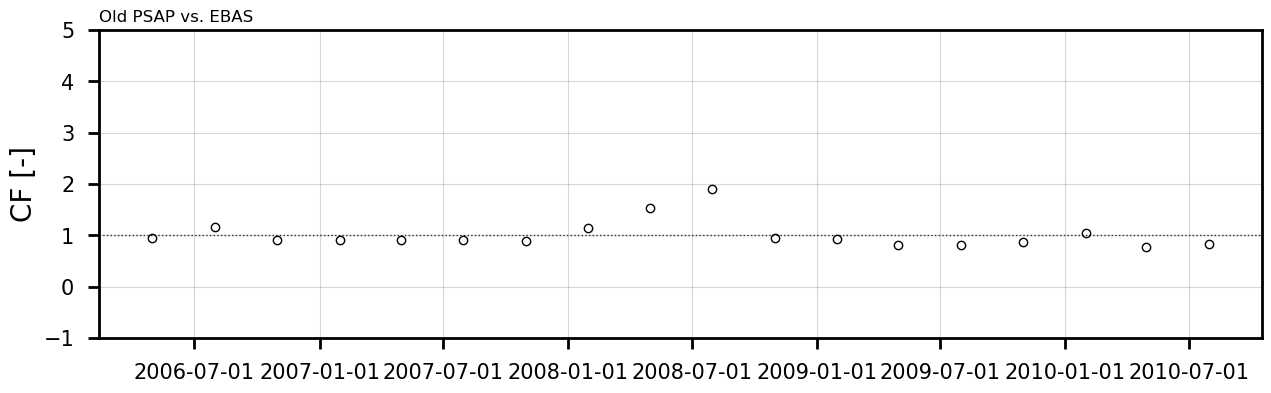

In [54]:
fig = quick_plot(df_stats_table_oldpsap_ebas, 'Old PSAP vs. EBAS')

In [55]:
df_stats_table_oldpsap_ebas['data'] = 'manual_PSAP_vs_EBAS'
df_stats_table_newpsap_oldpsap['data'] = 'automatic_PSAP_vs_manual_PSAP'
df_stats_table_newpsap_maap['data'] = 'MAAP_vs_automatic_PSAP'

frames = [df_stats_table_oldpsap_ebas, df_stats_table_newpsap_oldpsap, df_stats_table_newpsap_maap]
df_stats = pd.concat(frames)

In [56]:
df_stats_table_newpsap_maap

cf_LMS     cf_TS  coef coef_ts    R2 length  \
2015-02-28  0.781311  0.661963  1.28    1.51  0.48    297   
2015-05-31   0.70908  0.767123  1.41    1.30  0.88   1707   
2015-08-31  0.629386  0.583446  1.59    1.71  0.64   1372   
2015-11-30  0.566313  0.592291  1.77    1.69  0.90   1680   
2016-02-29  0.622564  0.617536  1.61    1.62  0.88   1732   
2016-05-31  0.678783  0.673906  1.47    1.48  0.27   1197   

                              data  
2015-02-28  MAAP_vs_automatic_PSAP  
2015-05-31  MAAP_vs_automatic_PSAP  
2015-08-31  MAAP_vs_automatic_PSAP  
2015-11-30  MAAP_vs_automatic_PSAP  
2016-02-29  MAAP_vs_automatic_PSAP  
2016-05-31  MAAP_vs_automatic_PSAP

In [57]:
df_stats = df_stats.sort_index()

In [58]:
df_stats = df_stats[df_stats['length'] > 50]

In [59]:
df_stats

cf_LMS     cf_TS  coef coef_ts    R2 length  \
2006-04-30  0.813108   0.94386  1.23    1.06  0.92   1781   
2006-07-31  0.983061  1.166042  1.02    0.86  0.64   1308   
2006-10-31  0.895782  0.906664  1.12    1.10  1.00   1846   
2007-01-31   1.00462  0.912313  1.00    1.10  0.92   1906   
2007-04-30  0.926387   0.91459  1.08    1.09  0.93   1993   
2007-07-31  0.877816  0.906664  1.14    1.10  0.96   1907   
2007-10-31  0.888537   0.88593  1.13    1.13  0.99   2141   
2008-01-31  1.227736   1.15051  0.81    0.87  0.55   2071   
2008-04-30  1.568462  1.535504  0.64    0.65  0.36   1820   
2008-07-31  1.756997  1.905624  0.57    0.52  0.21    913   
2008-10-31  0.941535  0.941974  1.06    1.06  0.87    451   
2009-01-31  0.941524  0.932091  1.06    1.07  0.99   1032   
2009-04-30  0.856465   0.80932  1.17    1.24  0.85   1497   
2009-07-31  0.867782  0.812114  1.15    1.23  0.89   2007   
2009-10-31  0.924081  0.871547  1.08    1.15  0.97   1821   
2010-01-31  1.029176  1.045975  0.97    0.96  0.98   1014   
2010-07-31  0.850442   0.83036  1.18    1.20  0.95    579   
2012-11-30     2.421  2.365841  0.41    0.42  0.58   1404   
2013-02-28  4.378146  4.203693  0.23    0.24  0.65    206   
2015-02-28  0.781311  0.661963  1.28    1.51  0.48    297   
2015-05-31   0.70908  0.767123  1.41    1.30  0.88   1707   
2015-08-31  0.629386  0.583446  1.59    1.71  0.64   1372   
2015-11-30  0.566313  0.592291  1.77    1.69  0.90   1680   
2016-02-29  0.622564  0.617536  1.61    1.62  0.88   1732   
2016-05-31  0.678783  0.673906  1.47    1.48  0.27   1197   

                                     data  
2006-04-30            manual_PSAP_vs_EBAS  
2006-07-31            manual_PSAP_vs_EBAS  
2006-10-31            manual_PSAP_vs_EBAS  
2007-01-31            manual_PSAP_vs_EBAS  
2007-04-30            manual_PSAP_vs_EBAS  
2007-07-31            manual_PSAP_vs_EBAS  
2007-10-31            manual_PSAP_vs_EBAS  
2008-01-31            manual_PSAP_vs_EBAS  
2008-04-30            manual_PSAP_vs_EBAS  
2008-07-31            manual_PSAP_vs_EBAS  
2008-10-31            manual_PSAP_vs_EBAS  
2009-01-31            manual_PSAP_vs_EBAS  
2009-04-30            manual_PSAP_vs_EBAS  
2009-07-31            manual_PSAP_vs_EBAS  
2009-10-31            manual_PSAP_vs_EBAS  
2010-01-31            manual_PSAP_vs_EBAS  
2010-07-31            manual_PSAP_vs_EBAS  
2012-11-30  automatic_PSAP_vs_manual_PSAP  
2013-02-28  automatic_PSAP_vs_manual_PSAP  
2015-02-28         MAAP_vs_automatic_PSAP  
2015-05-31         MAAP_vs_automatic_PSAP  
2015-08-31         MAAP_vs_automatic_PSAP  
2015-11-30         MAAP_vs_automatic_PSAP  
2016-02-29         MAAP_vs_automatic_PSAP  
2016-05-31         MAAP_vs_automatic_PSAP

# Figure S2: 

DatetimeIndex(['2006-04-30', '2006-07-31', '2006-10-31', '2007-01-31',
               '2007-04-30', '2007-07-31', '2007-10-31', '2008-01-31',
               '2008-04-30', '2008-07-31', '2008-10-31', '2009-01-31',
               '2009-04-30', '2009-07-31', '2009-10-31', '2010-01-31',
               '2010-07-31', '2012-11-30', '2013-02-28', '2015-02-28',
               '2015-05-31', '2015-08-31', '2015-11-30', '2016-02-29',
               '2016-05-31'],
              dtype='datetime64[ns]', freq=None)


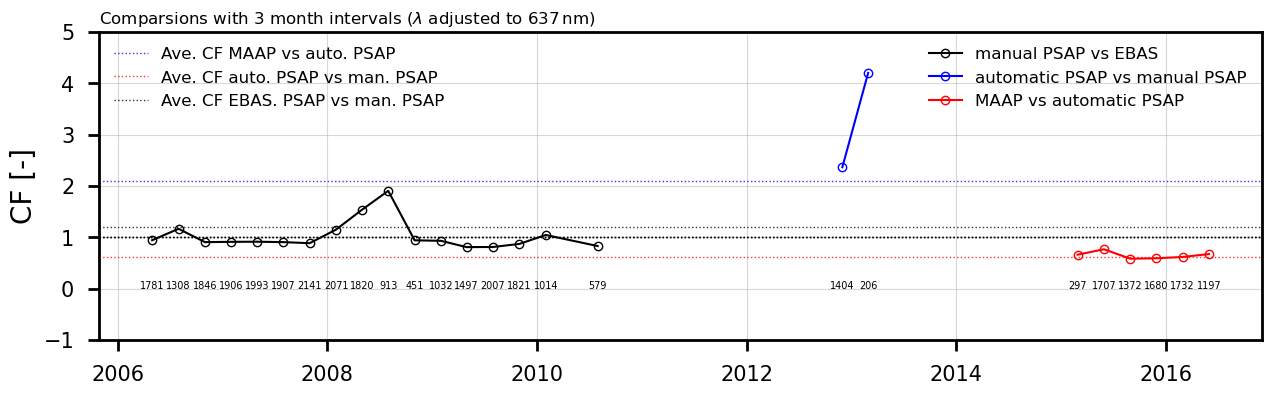

make folder
saved as: C:\Users\DominicHeslinRees\Documents\ACP_2023\plots\\FigureS2.png


In [60]:
fig, ax = plt.subplots(figsize=(15, 4))

dict_df_to_colors = {'manual_PSAP_vs_EBAS':'k', 'automatic_PSAP_vs_manual_PSAP':'b', 'MAAP_vs_automatic_PSAP':'r'}

for type_data in df_stats['data'].unique():
    df_stats_table = df_stats[df_stats['data'] == type_data].copy()
    data = df_stats_table['data'].values[0]
    df_stats_table.index = pd.to_datetime(df_stats_table.index)
    ax.plot(df_stats_table.index, df_stats_table['cf_TS'], 'o', mec=dict_df_to_colors[data], 
            mfc='none', label=str(data).replace('_',' '), ls='-', c=dict_df_to_colors[data], 
            )
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())  
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y')) 
    ax.axhline(y=1, ls=':', c='k', alpha=.8, lw=1)
    ax.set_ylabel('CF [-]', fontsize=20)   
    ax.set_title('',loc='left')
    fancy(ax, fontsize=15)
    ax.set_ylim(-1,5)
    ax.legend(frameon=False, fontsize=12, loc=1)
    
ax2 = ax.twiny()
ax2.set_xticks([])
ax2.axhline(y=2.1, ls=':', c='b', alpha=.8, lw=1, label='Ave. CF MAAP vs auto. PSAP')
ax2.axhline(y=0.62, ls=':', c='r', alpha=.8, lw=1, label='Ave. CF auto. PSAP vs man. PSAP')
ax2.axhline(y=1.2, ls=':', c='k', alpha=.8, lw=1, label='Ave. CF EBAS. PSAP vs man. PSAP')
ax2.legend(frameon=False, fontsize=12, loc=2)

y = len(df_stats['cf_TS'].values)*[0]
z = df_stats.index
print(z)
n = df_stats['length'].values

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]), fontsize=7, ha='center')

plt.title('Comparsions with 3 month intervals ($\lambda$ adjusted to 637$\,$nm)', loc='left')
plt.show()

fu_cf_abs.save_plot(fig, path=savepathplots, name='FigureS2', formate='.png', dpi=300)